In [1]:
from sklearn.decomposition import PCA
def pca(df_X, df_y):
    pca = PCA(n_components = 2)
    pca.fit(df_X)
    df_pca = pca.transform(df_X)
    df_pca = pd.DataFrame(df_pca, columns = ['comp. 0', 'comp. 1'])
    df_pca['target'] = df_y
    print('variance ratio:', pca.explained_variance_ratio_, 'sum:', sum(pca.explained_variance_ratio_))
    return df_pca

def concath(df_X, df_y):
    df = pd.concat([df_X, df_y])
    return df

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
from sklearn import metrics
import tensorflow as tf
import keras
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras import optimizers
import math


################################ MSE ################################
def MSE(y_true, y_pred):
    return tf.reduce_mean(tf.math.square(y_true - y_pred))

################################ BCE ################################
import tensorflow as tf
def BCE(y_true, y_pred):
    return -tf.reduce_mean(y_true*tf.math.log(y_pred)+(1-y_true)*tf.math.log(1-y_pred))

################################ Ours_Accu ################################
def Ours_Accu(y_true, y_pred):
    y_pred = 1/(1+tf.math.exp(-L*(y_pred-0.5)))
    yl = y_train.shape[0]
    accu = (yl-tf.reduce_sum(y_true)-tf.reduce_sum(y_pred)+2*tf.reduce_sum(y_true*y_pred)) / yl
    return 1-accu

################################ Ours_Fbeta ################################
def Ours_Fbeta(y_true, y_pred):
#     beta = 1 
    y_pred = 1/(1+tf.math.exp(-L*(y_pred-0.5)))
    numerator = (1+beta**2)*tf.reduce_sum(y_true*y_pred)
    denominator = (beta**2)*tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    return 1-(numerator/denominator)

################################ Ours_Gmean ################################
def Ours_Gmean(y_true, y_pred):
    y_pred = 1/(1+tf.math.exp(-L*(y_pred-0.5)))
    syhy = tf.reduce_sum(y_true*y_pred)
    sy = tf.reduce_sum(y_true)
    yl = (y_train.shape[0])
#     gmean = syhy*(yl-tf.reduce_sum(y_pred)-sy+syhy)/(sy*(yl-sy))
    gmean = tf.sqrt(syhy*(yl-tf.reduce_sum(y_pred)-sy+syhy)/(sy*(yl-sy)))
    return 1-gmean

################################ Ours_BAccu ################################
def Ours_BAccu(y_true, y_pred):
    y_pred = 1/(1+tf.math.exp(-L*(y_pred-0.5)))
    syhy = tf.reduce_sum(y_true*y_pred)
    sy = tf.reduce_sum(y_true)
    yl = y_train.shape[0]
    baccu = (yl*(syhy+sy)-sy*(tf.reduce_sum(y_pred)+sy)) / (2*sy*(yl-sy))
    return 1-baccu


# 1. My own data(2d / 10,000)

In [4]:
from sklearn import datasets
import numpy as np
import pandas as pd
Init_X, Init_y = datasets.make_classification(n_samples=10000, n_classes=2, weights=[0.9, 0.1], class_sep=1.2,
                                    n_features=5, n_informative=3, n_redundant=1, n_clusters_per_class=1, random_state=0)
X = np.array(Init_X)
y = np.array(Init_y)
# # change 0 -> -1
# y = [-1 if x==0 else x for x in y]

df_pca = pca(X, y)
df_pca

variance ratio: [0.42833444 0.25307059] sum: 0.6814050304383226


comp. 0   comp. 1  target
0     1.695416  1.809229       0
1     0.982001 -1.214855       0
2    -0.817025  0.504334       0
3    -0.235227 -0.039080       0
4    -0.534662 -2.206977       0
...        ...       ...     ...
9995 -1.686589  1.869398       1
9996 -0.455202  0.290077       0
9997 -0.970592 -1.940881       0
9998 -2.826011  0.173755       0
9999 -0.775642 -0.661648       0

[10000 rows x 3 columns]

In [5]:
res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])

In [6]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)

X = df_pca.iloc[:, :2]
y = df_pca.iloc[:, 2]

In [7]:
L = 73
hidden_node = 2
# momentum=0.9
activation = 'sigmoid'  
kernel_initializer=keras.initializers.he_normal(seed=100)
epochs=100
threshold = 0.5

batch_size:  450
################################################## 1th CV ##################################################


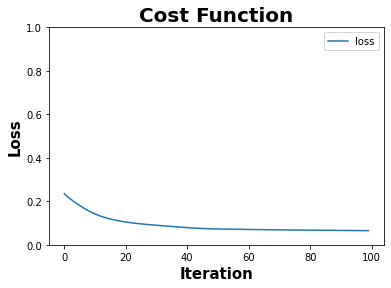

32/32 [==============================] - 0s 599us/step
TN, FP, FN, TP: 895 1 93 11
Accuracy = 0.906
Precesion = 0.9166666666666666
Recall = 0.10576923076923077
F1 = 0.1896551724137931
F0.5 = 0.36184210526315785
F2 = 0.12850467289719625
Gmean = 0.3250402817386597
Balanced Accu. = 0.5523265796703297
################################################## 2th CV ##################################################


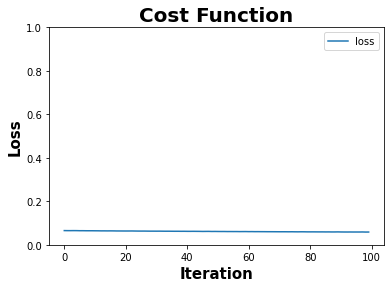

32/32 [==============================] - 0s 539us/step
TN, FP, FN, TP: 879 17 65 39
Accuracy = 0.918
Precesion = 0.6964285714285714
Recall = 0.375
F1 = 0.4875
F0.5 = 0.5945121951219513
F2 = 0.41313559322033894
Gmean = 0.6065352789762992
Balanced Accu. = 0.6780133928571428
################################################## 3th CV ##################################################


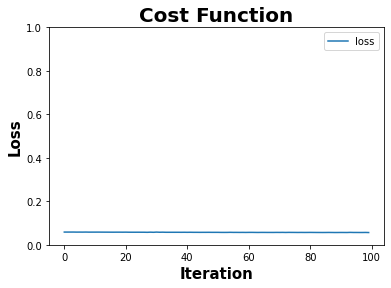

32/32 [==============================] - 0s 536us/step
TN, FP, FN, TP: 874 22 53 51
Accuracy = 0.925
Precesion = 0.6986301369863014
Recall = 0.49038461538461536
F1 = 0.576271186440678
F0.5 = 0.643939393939394
F2 = 0.5214723926380368
Gmean = 0.691624118798135
Balanced Accu. = 0.732915521978022
################################################## 4th CV ##################################################


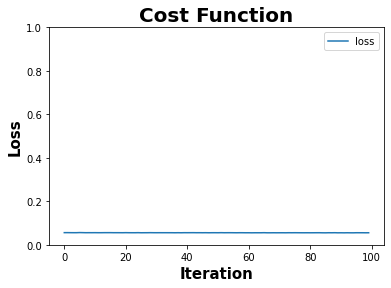

32/32 [==============================] - 0s 484us/step
TN, FP, FN, TP: 872 23 62 43
Accuracy = 0.915
Precesion = 0.6515151515151515
Recall = 0.4095238095238095
F1 = 0.5029239766081871
F0.5 = 0.5826558265582655
F2 = 0.44238683127572015
Gmean = 0.6316642573169714
Balanced Accu. = 0.6919127427507316
################################################## 5th CV ##################################################


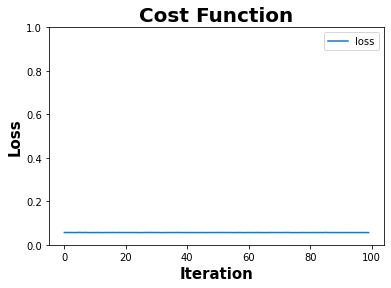

32/32 [==============================] - 0s 509us/step
TN, FP, FN, TP: 880 15 51 54
Accuracy = 0.934
Precesion = 0.782608695652174
Recall = 0.5142857142857142
F1 = 0.6206896551724138
F0.5 = 0.7086614173228346
F2 = 0.5521472392638036
Gmean = 0.7111022434491875
Balanced Accu. = 0.7487629688747006
################################################## 6th CV ##################################################


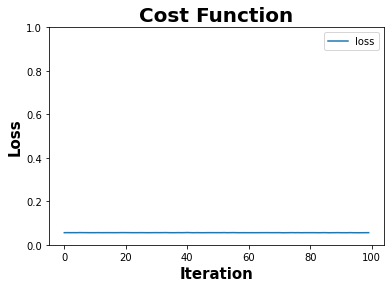

32/32 [==============================] - 0s 486us/step
TN, FP, FN, TP: 867 28 51 54
Accuracy = 0.921
Precesion = 0.6585365853658537
Recall = 0.5142857142857142
F1 = 0.5775401069518716
F0.5 = 0.6235565819861432
F2 = 0.5378486055776892
Gmean = 0.7058302407880056
Balanced Accu. = 0.7415003990422985
################################################## 7th CV ##################################################


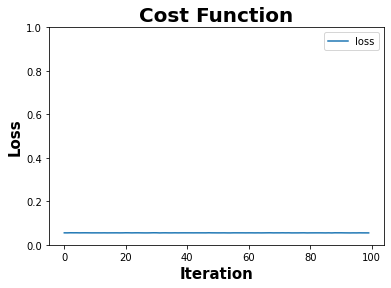

32/32 [==============================] - 0s 484us/step
TN, FP, FN, TP: 864 31 50 55
Accuracy = 0.919
Precesion = 0.6395348837209303
Recall = 0.5238095238095238
F1 = 0.5759162303664922
F0.5 = 0.6124721603563474
F2 = 0.5434782608695652
Gmean = 0.7111022434491876
Balanced Accu. = 0.744586326150572
################################################## 8th CV ##################################################


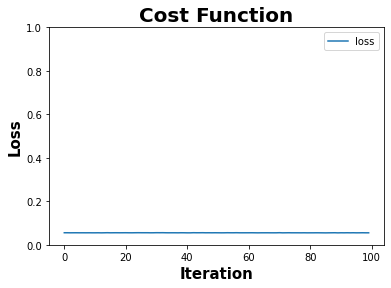

32/32 [==============================] - 0s 488us/step
TN, FP, FN, TP: 870 25 52 53
Accuracy = 0.923
Precesion = 0.6794871794871795
Recall = 0.5047619047619047
F1 = 0.5792349726775956
F0.5 = 0.6354916067146282
F2 = 0.532128514056225
Gmean = 0.7004729903540056
Balanced Accu. = 0.738414471934025
################################################## 9th CV ##################################################


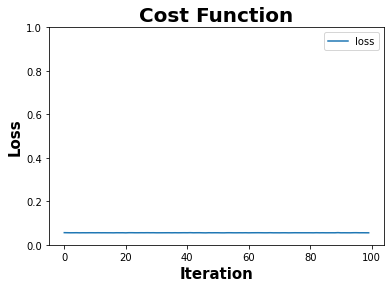

32/32 [==============================] - 0s 547us/step
TN, FP, FN, TP: 869 26 46 59
Accuracy = 0.928
Precesion = 0.6941176470588235
Recall = 0.5619047619047619
F1 = 0.6210526315789474
F0.5 = 0.6629213483146067
F2 = 0.5841584158415841
Gmean = 0.7386347349094755
Balanced Accu. = 0.7664272412875766
################################################## 10th CV ##################################################


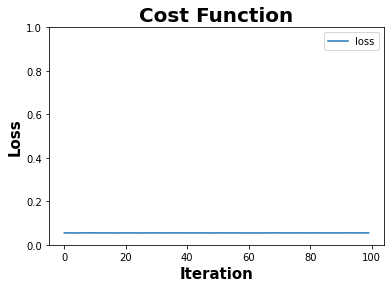

32/32 [==============================] - 0s 542us/step
TN, FP, FN, TP: 863 32 54 51
Accuracy = 0.914
Precesion = 0.6144578313253012
Recall = 0.4857142857142857
F1 = 0.5425531914893617
F0.5 = 0.5835240274599542
F2 = 0.5069582504970179
Gmean = 0.6843595289643286
Balanced Accu. = 0.7249800478850759


In [31]:
ada_acc = []
ada_f1 = []
ada_f5 = []
ada_f2 = []
ada_gmean = []
ada_bacc = []

n_iter=0

###################### MLP (sigmoid // MSE) ##############################
batch_size = int(X.shape[0]*0.9 * 0.05)  
print('batch_size: ', batch_size)
learning_rate = 0.001

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(df_pca, df_pca['target']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
        
    model.compile(loss=MSE, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()
    predicted = []
    result = model.predict(X_test)
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    ada_acc.append((TP+TN)/(TP+TN+FP+FN))
    ada_f1.append(TP / (TP + 0.5*(FP+FN)))
    ada_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    ada_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    ada_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    ada_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    

In [32]:
res['Delta'] = [np.mean(ada_acc), np.mean(ada_f1), np.mean(ada_f5), np.mean(ada_f2), np.mean(ada_gmean), np.mean(ada_bacc)]
res

Delta  BCE  AccAim  F1Aim  F.5Aim  F2Aim  GAim  BAim
Acc    0.920300    0       0      0       0      0     0     0
F1     0.527334    0       0      0       0      0     0     0
F.5    0.600958    0       0      0       0      0     0     0
F2     0.476222    0       0      0       0      0     0     0
Gmean  0.650637    0       0      0       0      0     0     0
B_Acc  0.711984    0       0      0       0      0     0     0

batch_size:  450
################################################## 1th CV ##################################################


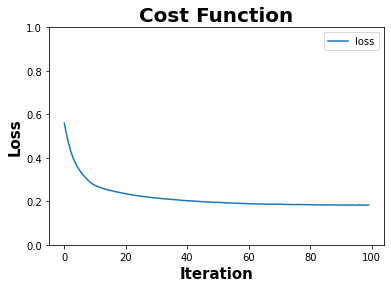

32/32 [==============================] - 0s 647us/step
TN, FP, FN, TP: 860 36 45 59
Accuracy = 0.919
Precesion = 0.6210526315789474
Recall = 0.5673076923076923
F1 = 0.592964824120603
F0.5 = 0.609504132231405
F2 = 0.5772994129158513
Gmean = 0.7379119728465786
Balanced Accu. = 0.7635645604395604
################################################## 2th CV ##################################################


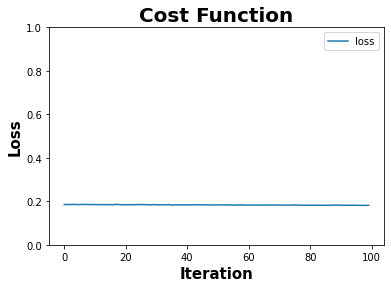

32/32 [==============================] - 0s 618us/step
TN, FP, FN, TP: 874 22 45 59
Accuracy = 0.933
Precesion = 0.7283950617283951
Recall = 0.5673076923076923
F1 = 0.6378378378378379
F0.5 = 0.6892523364485982
F2 = 0.5935613682092555
Gmean = 0.7438939859702035
Balanced Accu. = 0.7713770604395604
################################################## 3th CV ##################################################


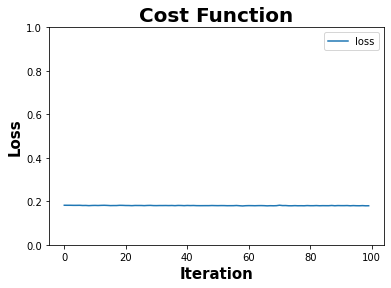

32/32 [==============================] - 0s 546us/step
TN, FP, FN, TP: 868 28 50 54
Accuracy = 0.922
Precesion = 0.6585365853658537
Recall = 0.5192307692307693
F1 = 0.5806451612903226
F0.5 = 0.625
F2 = 0.5421686746987953
Gmean = 0.7092283184506296
Balanced Accu. = 0.7439903846153846
################################################## 4th CV ##################################################


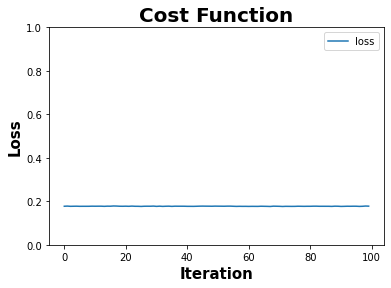

32/32 [==============================] - 0s 542us/step
TN, FP, FN, TP: 867 28 61 44
Accuracy = 0.911
Precesion = 0.6111111111111112
Recall = 0.41904761904761906
F1 = 0.4971751412429379
F0.5 = 0.559796437659033
F2 = 0.44715447154471544
Gmean = 0.6371324425905783
Balanced Accu. = 0.6938813514232509
################################################## 5th CV ##################################################


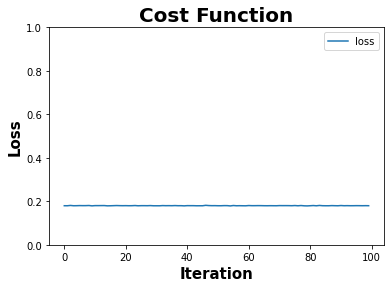

32/32 [==============================] - 0s 527us/step
TN, FP, FN, TP: 882 13 52 53
Accuracy = 0.935
Precesion = 0.803030303030303
Recall = 0.5047619047619047
F1 = 0.6198830409356725
F0.5 = 0.7181571815718157
F2 = 0.5452674897119342
Gmean = 0.7052872943685894
Balanced Accu. = 0.7451183825485501
################################################## 6th CV ##################################################


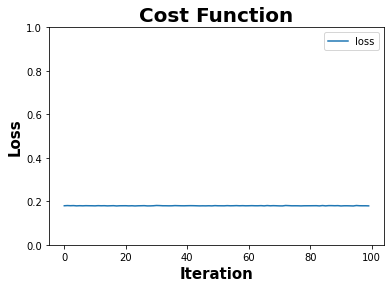

32/32 [==============================] - 0s 506us/step
TN, FP, FN, TP: 868 27 50 55
Accuracy = 0.923
Precesion = 0.6707317073170732
Recall = 0.5238095238095238
F1 = 0.5882352941176471
F0.5 = 0.6351039260969977
F2 = 0.547808764940239
Gmean = 0.7127464126809561
Balanced Accu. = 0.7468209630220803
################################################## 7th CV ##################################################


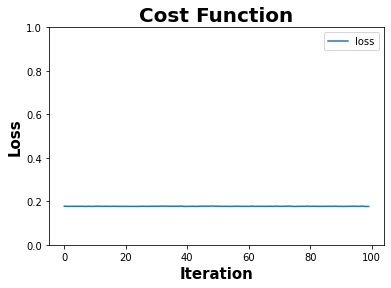

32/32 [==============================] - 0s 511us/step
TN, FP, FN, TP: 866 29 49 56
Accuracy = 0.922
Precesion = 0.6588235294117647
Recall = 0.5333333333333333
F1 = 0.5894736842105263
F0.5 = 0.6292134831460674
F2 = 0.5544554455445545
Gmean = 0.71836769242986
Balanced Accu. = 0.7504655493482308
################################################## 8th CV ##################################################


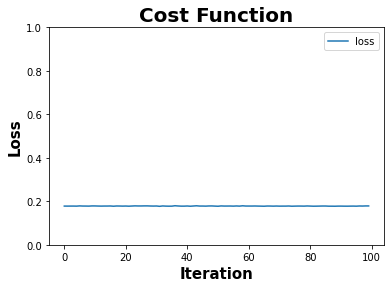

32/32 [==============================] - 0s 480us/step
TN, FP, FN, TP: 867 28 48 57
Accuracy = 0.924
Precesion = 0.6705882352941176
Recall = 0.5428571428571428
F1 = 0.6
F0.5 = 0.6404494382022472
F2 = 0.5643564356435643
Gmean = 0.7251716366720911
Balanced Accu. = 0.7557861133280128
################################################## 9th CV ##################################################


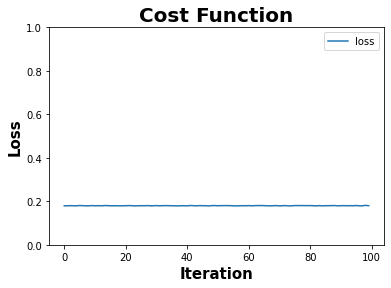

32/32 [==============================] - 0s 505us/step
TN, FP, FN, TP: 868 27 43 62
Accuracy = 0.93
Precesion = 0.6966292134831461
Recall = 0.5904761904761905
F1 = 0.6391752577319587
F0.5 = 0.6724511930585684
F2 = 0.6090373280943024
Gmean = 0.7567449651447182
Balanced Accu. = 0.7801542963554137
################################################## 10th CV ##################################################


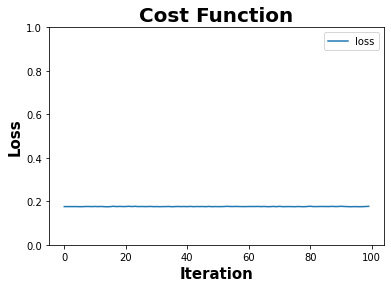

32/32 [==============================] - 0s 557us/step
TN, FP, FN, TP: 870 25 55 50
Accuracy = 0.92
Precesion = 0.6666666666666666
Recall = 0.47619047619047616
F1 = 0.5555555555555556
F0.5 = 0.6172839506172839
F2 = 0.5050505050505051
Gmean = 0.6803595124939619
Balanced Accu. = 0.7241287576483106


In [33]:
bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // BCE) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)  
print('batch_size: ', batch_size)
learning_rate=0.005

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(df_pca, df_pca['target']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=BCE, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = model.predict(X_test)
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    

In [34]:
res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res

Delta       BCE  AccAim  F1Aim  F.5Aim  F2Aim  GAim  BAim
Acc    0.920300  0.923900       0      0       0      0     0     0
F1     0.527334  0.590095       0      0       0      0     0     0
F.5    0.600958  0.639621       0      0       0      0     0     0
F2     0.476222  0.548616       0      0       0      0     0     0
Gmean  0.650637  0.712684       0      0       0      0     0     0
B_Acc  0.711984  0.747529       0      0       0      0     0     0

batch_size:  450
################################################## 1th CV ##################################################


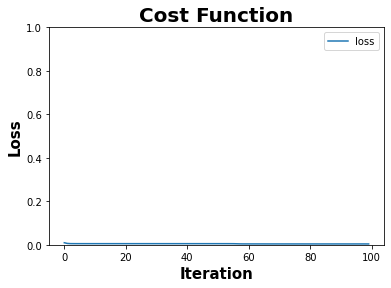

32/32 [==============================] - 0s 519us/step
TN, FP, FN, TP: 873 23 58 46
Accuracy = 0.919
Precesion = 0.6666666666666666
Recall = 0.4423076923076923
F1 = 0.5317919075144508
F0.5 = 0.6052631578947368
F2 = 0.4742268041237113
Gmean = 0.6564707242620852
Balanced Accu. = 0.7083190247252746
################################################## 2th CV ##################################################


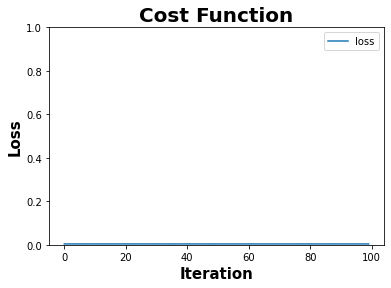

32/32 [==============================] - 0s 545us/step
TN, FP, FN, TP: 876 20 51 53
Accuracy = 0.929
Precesion = 0.726027397260274
Recall = 0.5096153846153846
F1 = 0.5988700564971752
F0.5 = 0.6691919191919191
F2 = 0.541922290388548
Gmean = 0.7058612053433672
Balanced Accu. = 0.743646978021978
################################################## 3th CV ##################################################


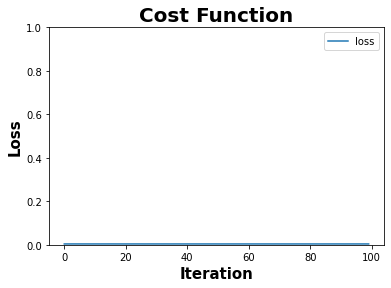

32/32 [==============================] - 0s 521us/step
TN, FP, FN, TP: 873 23 50 54
Accuracy = 0.927
Precesion = 0.7012987012987013
Recall = 0.5192307692307693
F1 = 0.5966850828729282
F0.5 = 0.6553398058252426
F2 = 0.5476673427991887
Gmean = 0.7112680934951151
Balanced Accu. = 0.7467805631868132
################################################## 4th CV ##################################################


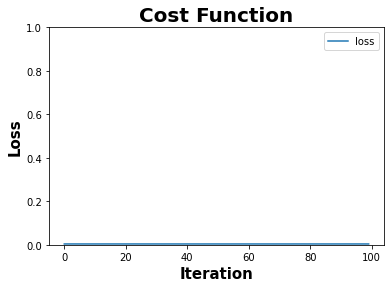

32/32 [==============================] - 0s 530us/step
TN, FP, FN, TP: 868 27 59 46
Accuracy = 0.914
Precesion = 0.6301369863013698
Recall = 0.4380952380952381
F1 = 0.5168539325842697
F0.5 = 0.5793450881612091
F2 = 0.4665314401622718
Gmean = 0.6518273982960979
Balanced Accu. = 0.7039638201649374
################################################## 5th CV ##################################################


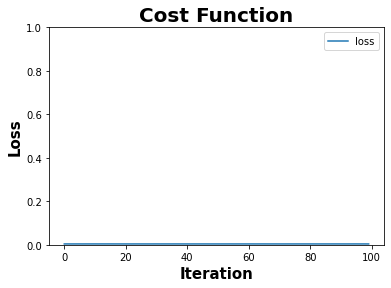

32/32 [==============================] - 0s 583us/step
TN, FP, FN, TP: 883 12 52 53
Accuracy = 0.936
Precesion = 0.8153846153846154
Recall = 0.5047619047619047
F1 = 0.6235294117647059
F0.5 = 0.726027397260274
F2 = 0.5463917525773195
Gmean = 0.705687003833585
Balanced Accu. = 0.7456770417664272
################################################## 6th CV ##################################################


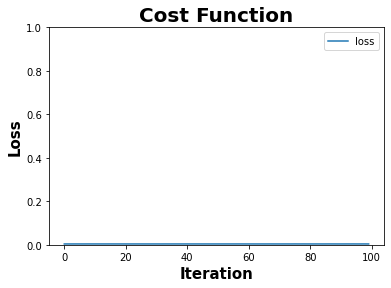

32/32 [==============================] - 0s 549us/step
TN, FP, FN, TP: 870 25 49 56
Accuracy = 0.926
Precesion = 0.691358024691358
Recall = 0.5333333333333333
F1 = 0.6021505376344086
F0.5 = 0.6526806526806527
F2 = 0.5588822355289421
Gmean = 0.7200248288704661
Balanced Accu. = 0.7527001862197393
################################################## 7th CV ##################################################


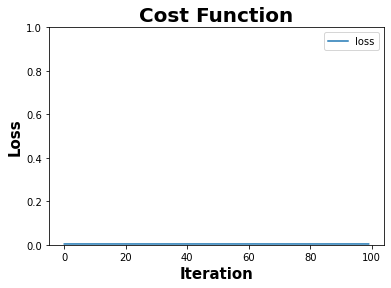

32/32 [==============================] - 0s 584us/step
TN, FP, FN, TP: 871 24 55 50
Accuracy = 0.921
Precesion = 0.6756756756756757
Recall = 0.47619047619047616
F1 = 0.5586592178770949
F0.5 = 0.6234413965087282
F2 = 0.5060728744939271
Gmean = 0.6807504114130227
Balanced Accu. = 0.7246874168661879
################################################## 8th CV ##################################################


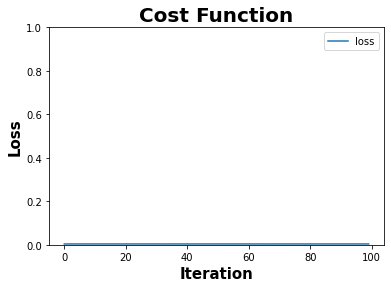

32/32 [==============================] - 0s 584us/step
TN, FP, FN, TP: 870 25 54 51
Accuracy = 0.921
Precesion = 0.6710526315789473
Recall = 0.4857142857142857
F1 = 0.56353591160221
F0.5 = 0.6234718826405868
F2 = 0.5141129032258064
Gmean = 0.6871294256294385
Balanced Accu. = 0.7288906624102155
################################################## 9th CV ##################################################


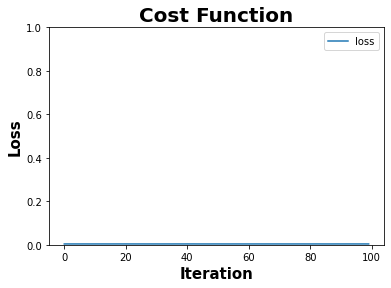

32/32 [==============================] - 0s 505us/step
TN, FP, FN, TP: 872 23 44 61
Accuracy = 0.933
Precesion = 0.7261904761904762
Recall = 0.580952380952381
F1 = 0.6455026455026455
F0.5 = 0.691609977324263
F2 = 0.6051587301587302
Gmean = 0.7523449198506713
Balanced Accu. = 0.7776270284650173
################################################## 10th CV ##################################################


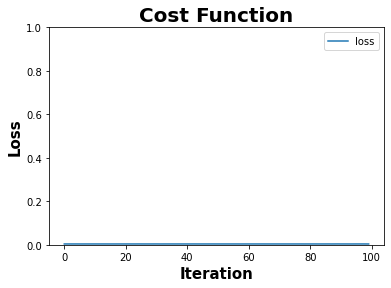

32/32 [==============================] - 0s 522us/step
TN, FP, FN, TP: 870 25 56 49
Accuracy = 0.919
Precesion = 0.6621621621621622
Recall = 0.4666666666666667
F1 = 0.547486033519553
F0.5 = 0.6109725685785536
F2 = 0.49595141700404854
Gmean = 0.6735215549009558
Balanced Accu. = 0.7193668528864059


In [54]:
acc_acc = []
acc_f1 = []
acc_f5 = []
acc_f2 = []
acc_gmean = []
acc_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // Accuracy) ##############################
batch_size = int(X.shape[0]*0.9 * 0.05)  # 0.05%0.004
print('batch_size: ', batch_size)
learning_rate = 0.004
model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(df_pca, df_pca['target']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=Ours_Accu, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    acc_acc.append((TP+TN)/(TP+TN+FP+FN))
    acc_f1.append(TP / (TP + 0.5*(FP+FN)))
    acc_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    acc_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    acc_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    acc_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [55]:
res['AccAim'] = [np.mean(acc_acc), np.mean(acc_f1), np.mean(acc_f5), np.mean(acc_f2), np.mean(acc_gmean), np.mean(acc_bacc)]
res

Delta       BCE    AccAim     F1Aim    F.5Aim     F2Aim      GAim  \
Acc    0.920300  0.923900  0.924500  0.916100  0.923400  0.877700  0.780200   
F1     0.527334  0.590095  0.578506  0.635805  0.568403  0.594422  0.519933   
F.5    0.600958  0.639621  0.643734  0.603039  0.637002  0.502921  0.418800   
F2     0.476222  0.548616  0.525692  0.673149  0.513917  0.727356  0.691215   
Gmean  0.650637  0.712684  0.694489  0.811532  0.685567  0.867475  0.817978   
B_Acc  0.711984  0.747529  0.735166  0.821188  0.729101  0.868011  0.841478   

           BAim  
Acc    0.891600  
F1     0.611445  
F.5    0.536060  
F2     0.714780  
Gmean  0.852827  
B_Acc  0.855210

batch_size:  450
################################################## 1th CV ##################################################


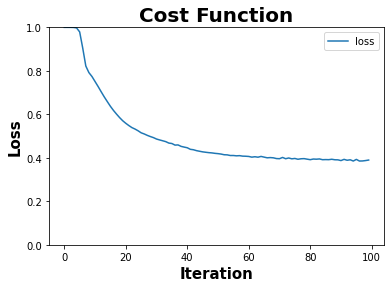

32/32 [==============================] - 0s 476us/step
TN, FP, FN, TP: 833 63 31 73
Accuracy = 0.906
Precesion = 0.5367647058823529
Recall = 0.7019230769230769
F1 = 0.6083333333333333
F0.5 = 0.5632716049382717
F2 = 0.6612318840579711
Gmean = 0.8078174983106785
Balanced Accu. = 0.8158052884615384
################################################## 2th CV ##################################################


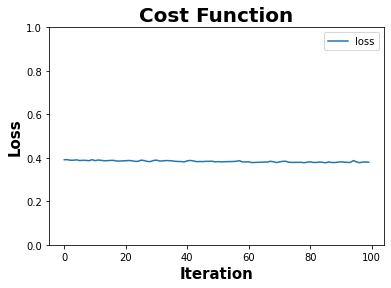

32/32 [==============================] - 0s 516us/step
TN, FP, FN, TP: 843 53 26 78
Accuracy = 0.921
Precesion = 0.5954198473282443
Recall = 0.75
F1 = 0.6638297872340425
F0.5 = 0.6210191082802548
F2 = 0.7129798903107861
Gmean = 0.8400215239589315
Balanced Accu. = 0.8454241071428572
################################################## 3th CV ##################################################


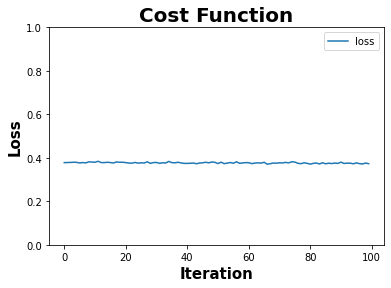

32/32 [==============================] - 0s 485us/step
TN, FP, FN, TP: 849 47 30 74
Accuracy = 0.923
Precesion = 0.6115702479338843
Recall = 0.7115384615384616
F1 = 0.6577777777777778
F0.5 = 0.6292517006802721
F2 = 0.6890130353817504
Gmean = 0.8211056310960134
Balanced Accu. = 0.8295415521978022
################################################## 4th CV ##################################################


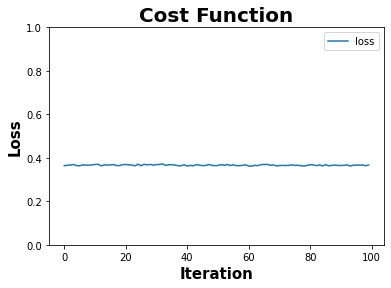

32/32 [==============================] - 0s 478us/step
TN, FP, FN, TP: 845 50 47 58
Accuracy = 0.903
Precesion = 0.5370370370370371
Recall = 0.5523809523809524
F1 = 0.5446009389671361
F0.5 = 0.5400372439478585
F2 = 0.5492424242424243
Gmean = 0.7221645804788668
Balanced Accu. = 0.7482575152966214
################################################## 5th CV ##################################################


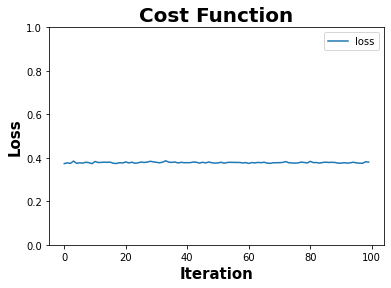

32/32 [==============================] - 0s 520us/step
TN, FP, FN, TP: 859 36 29 76
Accuracy = 0.935
Precesion = 0.6785714285714286
Recall = 0.7238095238095238
F1 = 0.7004608294930875
F0.5 = 0.6871609403254973
F2 = 0.7142857142857143
Gmean = 0.8334838916932693
Balanced Accu. = 0.8417930300611864
################################################## 6th CV ##################################################


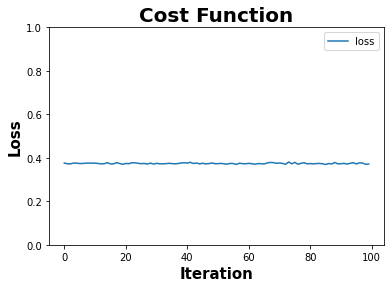

32/32 [==============================] - 0s 514us/step
TN, FP, FN, TP: 842 53 23 82
Accuracy = 0.924
Precesion = 0.6074074074074074
Recall = 0.780952380952381
F1 = 0.6833333333333333
F0.5 = 0.6356589147286822
F2 = 0.7387387387387387
Gmean = 0.8571499511988069
Balanced Accu. = 0.8608672519287044
################################################## 7th CV ##################################################


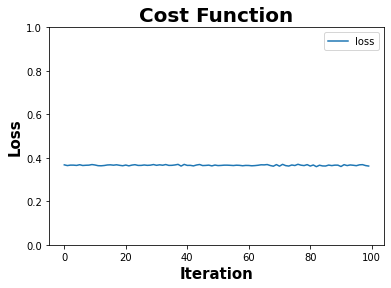

32/32 [==============================] - 0s 525us/step
TN, FP, FN, TP: 845 50 37 68
Accuracy = 0.913
Precesion = 0.576271186440678
Recall = 0.6476190476190476
F1 = 0.6098654708520179
F0.5 = 0.5892547660311959
F2 = 0.6319702602230484
Gmean = 0.7819457862003804
Balanced Accu. = 0.795876562915669
################################################## 8th CV ##################################################


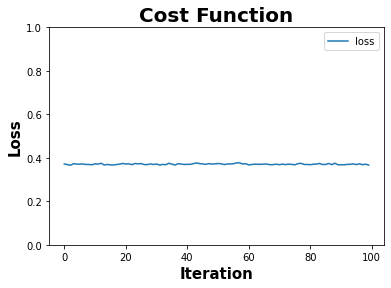

32/32 [==============================] - 0s 500us/step
TN, FP, FN, TP: 838 57 29 76
Accuracy = 0.914
Precesion = 0.5714285714285714
Recall = 0.7238095238095238
F1 = 0.6386554621848739
F0.5 = 0.5965463108320251
F2 = 0.6871609403254972
Gmean = 0.8232327480662402
Balanced Accu. = 0.8300611864857674
################################################## 9th CV ##################################################


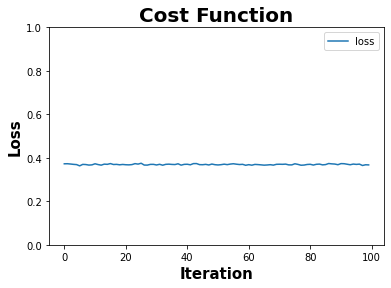

32/32 [==============================] - 0s 503us/step
TN, FP, FN, TP: 840 55 29 76
Accuracy = 0.916
Precesion = 0.5801526717557252
Recall = 0.7238095238095238
F1 = 0.6440677966101694
F0.5 = 0.604133545310016
F2 = 0.689655172413793
Gmean = 0.8242145406012609
Balanced Accu. = 0.8311785049215217
################################################## 10th CV ##################################################


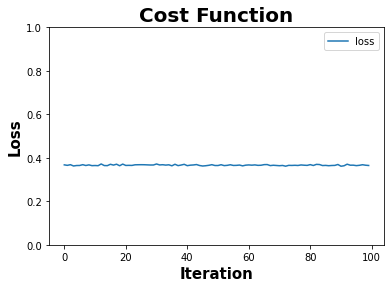

32/32 [==============================] - 0s 521us/step
TN, FP, FN, TP: 838 57 33 72
Accuracy = 0.91
Precesion = 0.5581395348837209
Recall = 0.6857142857142857
F1 = 0.6153846153846154
F0.5 = 0.5797101449275363
F2 = 0.6557377049180327
Gmean = 0.801275917876131
Balanced Accu. = 0.8110135674381485


In [10]:
f1_acc = []
f1_f1 = []
f1_f5 = []
f1_f2 = []
f1_gmean = []
f1_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // F1) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)   # 0.05&0.001
print('batch_size: ', batch_size)
learning_rate=0.001

beta = 1
model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(df_pca, df_pca['target']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)

    model.compile(loss=Ours_Fbeta, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    f1_acc.append((TP+TN)/(TP+TN+FP+FN))
    f1_f1.append(TP / (TP + 0.5*(FP+FN)))
    f1_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f1_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f1_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f1_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [11]:
res['F1Aim'] = [np.mean(f1_acc), np.mean(f1_f1), np.mean(f1_f5), np.mean(f1_f2), np.mean(f1_gmean), np.mean(f1_bacc)]
res

Delta  BCE  AccAim     F1Aim  F.5Aim  F2Aim  GAim  BAim
Acc        0    0       0  0.916500       0      0     0     0
F1         0    0       0  0.636631       0      0     0     0
F.5        0    0       0  0.604604       0      0     0     0
F2         0    0       0  0.673002       0      0     0     0
Gmean      0    0       0  0.811241       0      0     0     0
B_Acc      0    0       0  0.820982       0      0     0     0

batch_size:  450
################################################## 1th CV ##################################################


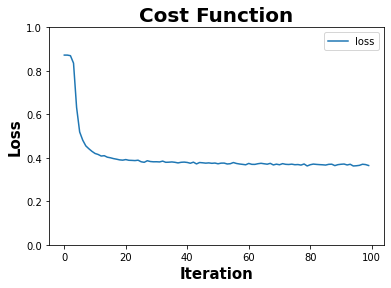

32/32 [==============================] - 0s 512us/step
TN, FP, FN, TP: 887 9 69 35
Accuracy = 0.922
Precesion = 0.7954545454545454
Recall = 0.33653846153846156
F1 = 0.47297297297297297
F0.5 = 0.625
F2 = 0.3804347826086957
Gmean = 0.5771984519076739
Balanced Accu. = 0.6632469093406593
################################################## 2th CV ##################################################


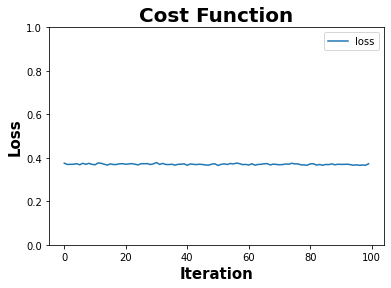

32/32 [==============================] - 0s 523us/step
TN, FP, FN, TP: 875 21 55 49
Accuracy = 0.924
Precesion = 0.7
Recall = 0.47115384615384615
F1 = 0.5632183908045977
F0.5 = 0.6380208333333334
F2 = 0.5041152263374485
Gmean = 0.6783149547847337
Balanced Accu. = 0.7238581730769231
################################################## 3th CV ##################################################


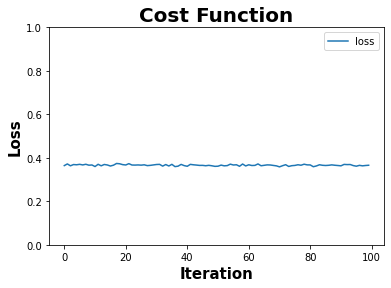

32/32 [==============================] - 0s 541us/step
TN, FP, FN, TP: 870 26 49 55
Accuracy = 0.925
Precesion = 0.6790123456790124
Recall = 0.5288461538461539
F1 = 0.5945945945945946
F0.5 = 0.6425233644859814
F2 = 0.5533199195171026
Gmean = 0.7165892628998126
Balanced Accu. = 0.7499141483516484
################################################## 4th CV ##################################################


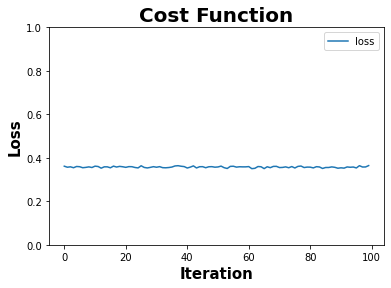

32/32 [==============================] - 0s 495us/step
TN, FP, FN, TP: 869 26 61 44
Accuracy = 0.913
Precesion = 0.6285714285714286
Recall = 0.41904761904761906
F1 = 0.5028571428571429
F0.5 = 0.5714285714285714
F2 = 0.4489795918367347
Gmean = 0.6378668894541228
Balanced Accu. = 0.694998669859005
################################################## 5th CV ##################################################


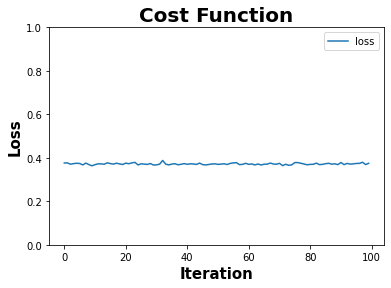

32/32 [==============================] - 0s 490us/step
TN, FP, FN, TP: 876 19 46 59
Accuracy = 0.935
Precesion = 0.7564102564102564
Recall = 0.5619047619047619
F1 = 0.644808743169399
F0.5 = 0.7074340527577937
F2 = 0.5923694779116466
Gmean = 0.7416037064781237
Balanced Accu. = 0.7703378558127161
################################################## 6th CV ##################################################


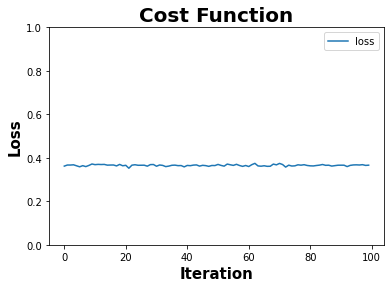

32/32 [==============================] - 0s 491us/step
TN, FP, FN, TP: 866 29 43 62
Accuracy = 0.928
Precesion = 0.6813186813186813
Recall = 0.5904761904761905
F1 = 0.6326530612244898
F0.5 = 0.6609808102345416
F2 = 0.6066536203522506
Gmean = 0.755872636364682
Balanced Accu. = 0.7790369779196595
################################################## 7th CV ##################################################


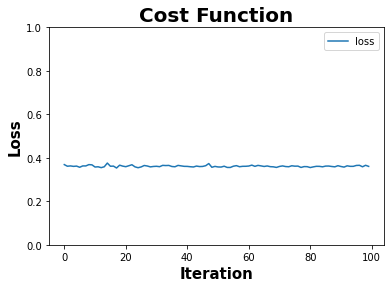

32/32 [==============================] - 0s 475us/step
TN, FP, FN, TP: 866 29 49 56
Accuracy = 0.922
Precesion = 0.6588235294117647
Recall = 0.5333333333333333
F1 = 0.5894736842105263
F0.5 = 0.6292134831460674
F2 = 0.5544554455445545
Gmean = 0.71836769242986
Balanced Accu. = 0.7504655493482308
################################################## 8th CV ##################################################


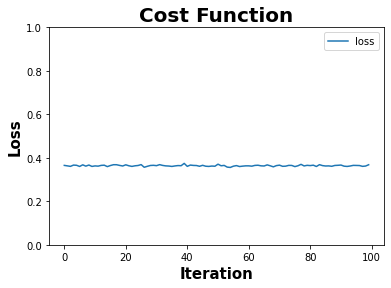

32/32 [==============================] - 0s 490us/step
TN, FP, FN, TP: 868 27 47 58
Accuracy = 0.926
Precesion = 0.6823529411764706
Recall = 0.5523809523809524
F1 = 0.6105263157894737
F0.5 = 0.651685393258427
F2 = 0.5742574257425742
Gmean = 0.7319268720277153
Balanced Accu. = 0.7611066773077946
################################################## 9th CV ##################################################


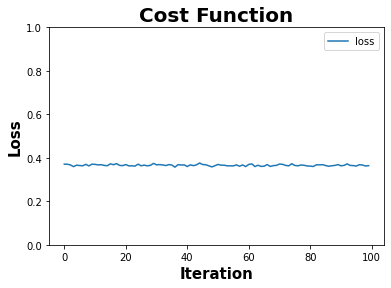

32/32 [==============================] - 0s 552us/step
TN, FP, FN, TP: 867 28 42 63
Accuracy = 0.93
Precesion = 0.6923076923076923
Recall = 0.6
F1 = 0.6428571428571429
F0.5 = 0.6716417910447761
F2 = 0.6164383561643836
Gmean = 0.7623837946069746
Balanced Accu. = 0.7843575418994413
################################################## 10th CV ##################################################


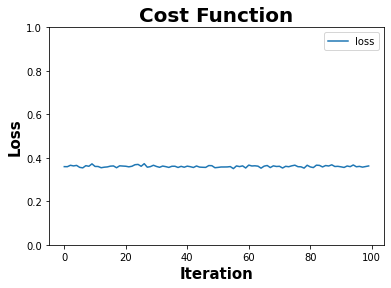

32/32 [==============================] - 0s 567us/step
TN, FP, FN, TP: 869 26 50 55
Accuracy = 0.924
Precesion = 0.6790123456790124
Recall = 0.5238095238095238
F1 = 0.5913978494623656
F0.5 = 0.6410256410256411
F2 = 0.5489021956087824
Gmean = 0.7131568627078811
Balanced Accu. = 0.7473796222399575


In [64]:
f05_acc = []
f05_f1 = []
f05_f5 = []
f05_f2 = []
f05_gmean = []
f05_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // F0.5) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)   #0.05&0.0005
print('batch_size: ', batch_size)
learning_rate=0.005

beta = 0.5
model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(df_pca, df_pca['target']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=Ours_Fbeta, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    f05_acc.append((TP+TN)/(TP+TN+FP+FN))
    f05_f1.append(TP / (TP + 0.5*(FP+FN)))
    f05_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f05_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f05_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f05_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [65]:
res['F.5Aim'] = [np.mean(f05_acc), np.mean(f05_f1), np.mean(f05_f5), np.mean(f05_f2), np.mean(f05_gmean), np.mean(f05_bacc)]
res

Delta       BCE    AccAim     F1Aim    F.5Aim     F2Aim      GAim  \
Acc    0.920300  0.923900  0.924500  0.915800  0.924900  0.877700  0.780200   
F1     0.527334  0.590095  0.578506  0.636050  0.584536  0.594422  0.519933   
F.5    0.600958  0.639621  0.643734  0.602161  0.643895  0.502921  0.418800   
F2     0.476222  0.548616  0.525692  0.674827  0.537993  0.727356  0.691215   
Gmean  0.650637  0.712684  0.694489  0.812893  0.703328  0.867475  0.817978   
B_Acc  0.711984  0.747529  0.735166  0.822290  0.742470  0.868011  0.841478   

           BAim  
Acc    0.891600  
F1     0.611445  
F.5    0.536060  
F2     0.714780  
Gmean  0.852827  
B_Acc  0.855210

batch_size:  450
################################################## 1th CV ##################################################


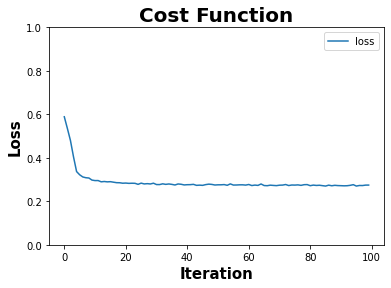

32/32 [==============================] - 0s 515us/step
TN, FP, FN, TP: 799 97 20 84
Accuracy = 0.883
Precesion = 0.46408839779005523
Recall = 0.8076923076923077
F1 = 0.5894736842105263
F0.5 = 0.5072463768115941
F2 = 0.7035175879396984
Gmean = 0.8486768547840537
Balanced Accu. = 0.8497166895604396
################################################## 2th CV ##################################################


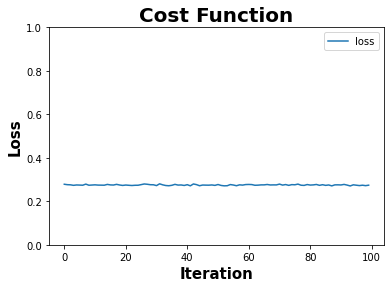

32/32 [==============================] - 0s 491us/step
TN, FP, FN, TP: 780 116 12 92
Accuracy = 0.872
Precesion = 0.4423076923076923
Recall = 0.8846153846153846
F1 = 0.5897435897435898
F0.5 = 0.49145299145299143
F2 = 0.7371794871794871
Gmean = 0.8775473125218296
Balanced Accu. = 0.8775755494505495
################################################## 3th CV ##################################################


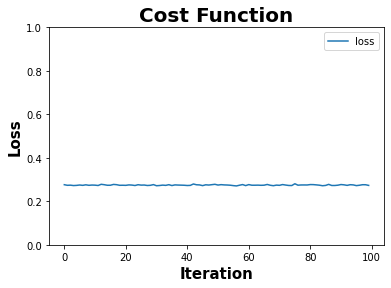

32/32 [==============================] - 0s 492us/step
TN, FP, FN, TP: 805 91 15 89
Accuracy = 0.894
Precesion = 0.49444444444444446
Recall = 0.8557692307692307
F1 = 0.6267605633802817
F0.5 = 0.5400485436893203
F2 = 0.7466442953020134
Gmean = 0.8768438676692851
Balanced Accu. = 0.8771033653846154
################################################## 4th CV ##################################################


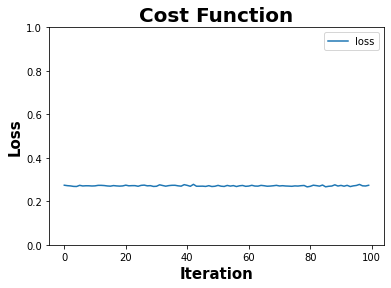

32/32 [==============================] - 0s 541us/step
TN, FP, FN, TP: 776 119 12 93
Accuracy = 0.869
Precesion = 0.4386792452830189
Recall = 0.8857142857142857
F1 = 0.5867507886435331
F0.5 = 0.4879328436516265
F2 = 0.735759493670886
Gmean = 0.87632694959461
Balanced Accu. = 0.8763766959297685
################################################## 5th CV ##################################################


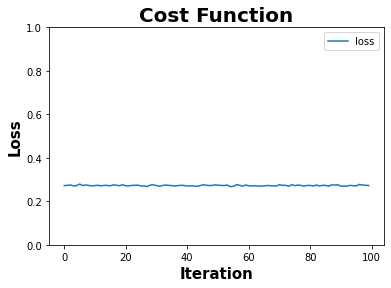

32/32 [==============================] - 0s 520us/step
TN, FP, FN, TP: 800 95 16 89
Accuracy = 0.889
Precesion = 0.483695652173913
Recall = 0.8476190476190476
F1 = 0.615916955017301
F0.5 = 0.5291319857312723
F2 = 0.7367549668874173
Gmean = 0.8704299573894136
Balanced Accu. = 0.8707368981111998
################################################## 6th CV ##################################################


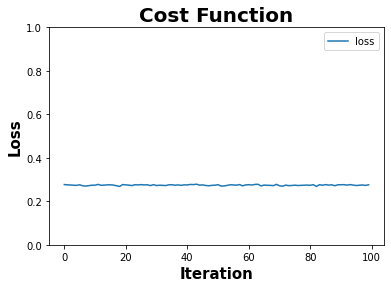

32/32 [==============================] - 0s 509us/step
TN, FP, FN, TP: 774 121 7 98
Accuracy = 0.872
Precesion = 0.4474885844748858
Recall = 0.9333333333333333
F1 = 0.6049382716049383
F0.5 = 0.49949031600407745
F2 = 0.7668231611893583
Gmean = 0.8984157378345655
Balanced Accu. = 0.8990689013035382
################################################## 7th CV ##################################################


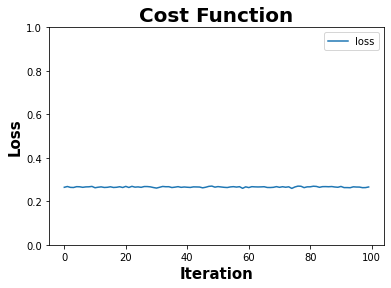

32/32 [==============================] - 0s 609us/step
TN, FP, FN, TP: 797 98 24 81
Accuracy = 0.878
Precesion = 0.45251396648044695
Recall = 0.7714285714285715
F1 = 0.5704225352112676
F0.5 = 0.49330085261875756
F2 = 0.676126878130217
Gmean = 0.8288300776911723
Balanced Accu. = 0.8309656823623304
################################################## 8th CV ##################################################


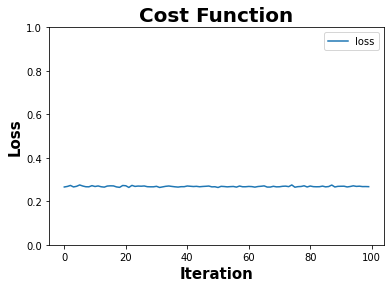

32/32 [==============================] - 0s 551us/step
TN, FP, FN, TP: 784 111 16 89
Accuracy = 0.873
Precesion = 0.445
Recall = 0.8476190476190476
F1 = 0.5836065573770491
F0.5 = 0.49171270718232046
F2 = 0.717741935483871
Gmean = 0.8616816955851607
Balanced Accu. = 0.8617983506251663
################################################## 9th CV ##################################################


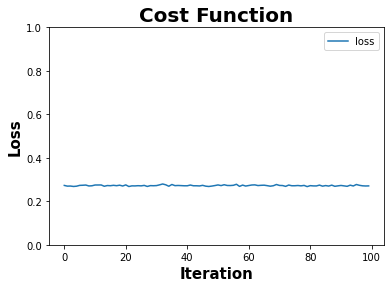

32/32 [==============================] - 0s 536us/step
TN, FP, FN, TP: 777 118 10 95
Accuracy = 0.872
Precesion = 0.4460093896713615
Recall = 0.9047619047619048
F1 = 0.5974842767295597
F0.5 = 0.49634273772204807
F2 = 0.7503949447077409
Gmean = 0.8862701960097696
Balanced Accu. = 0.8864591646714552
################################################## 10th CV ##################################################


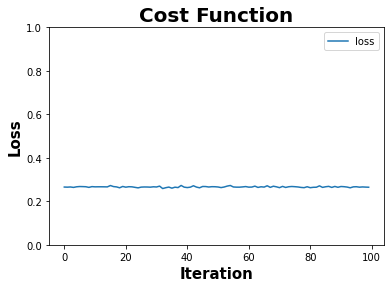

32/32 [==============================] - 0s 477us/step
TN, FP, FN, TP: 789 106 19 86
Accuracy = 0.875
Precesion = 0.4479166666666667
Recall = 0.819047619047619
F1 = 0.5791245791245792
F0.5 = 0.4925544100801832
F2 = 0.7026143790849673
Gmean = 0.8497311907704908
Balanced Accu. = 0.8503059324288375


In [41]:
f2_acc = []
f2_f1 = []
f2_f5 = []
f2_f2 = []
f2_gmean = []
f2_bacc = []

n_iter=0
    
###################### MLP (sigmoid // sigmoid // F2) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)   #0.05&0.005
print('batch_size: ', batch_size)
learning_rate=0.005

beta = 2
model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)
    
for train_index, test_index in skf.split(df_pca, df_pca['target']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=Ours_Fbeta, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    f2_acc.append((TP+TN)/(TP+TN+FP+FN))
    f2_f1.append(TP / (TP + 0.5*(FP+FN)))
    f2_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f2_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f2_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f2_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [42]:
res['F2Aim'] = [np.mean(f2_acc), np.mean(f2_f1), np.mean(f2_f5), np.mean(f2_f2), np.mean(f2_gmean), np.mean(f2_bacc)]
res

Delta       BCE  AccAim     F1Aim    F.5Aim     F2Aim  GAim  BAim
Acc    0.920300  0.923900  0.8953  0.916100  0.923400  0.877700     0     0
F1     0.527334  0.590095  0.0000  0.635805  0.568403  0.594422     0     0
F.5    0.600958  0.639621  0.0000  0.603039  0.637002  0.502921     0     0
F2     0.476222  0.548616  0.0000  0.673149  0.513917  0.727356     0     0
Gmean  0.650637  0.712684  0.0000  0.811532  0.685567  0.867475     0     0
B_Acc  0.711984  0.747529  0.5000  0.821188  0.729101  0.868011     0     0

batch_size:  4500
################################################## 1th CV ##################################################


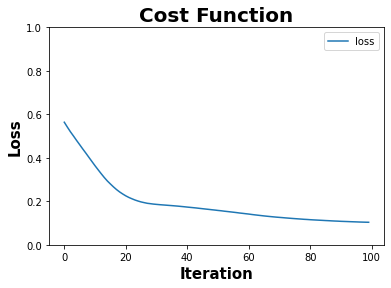

32/32 [==============================] - 0s 487us/step
TN, FP, FN, TP: 668 228 10 94
Accuracy = 0.762
Precesion = 0.2919254658385093
Recall = 0.9038461538461539
F1 = 0.4413145539906103
F0.5 = 0.33764367816091956
F2 = 0.6368563685636857
Gmean = 0.8208834191967139
Balanced Accu. = 0.8246909340659341
################################################## 2th CV ##################################################


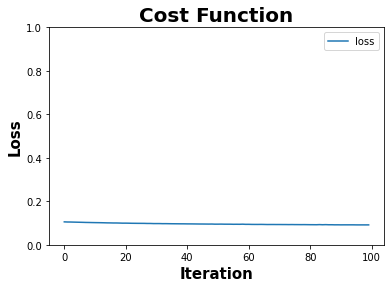

32/32 [==============================] - 0s 527us/step
TN, FP, FN, TP: 706 190 6 98
Accuracy = 0.804
Precesion = 0.3402777777777778
Recall = 0.9423076923076923
F1 = 0.5
F0.5 = 0.39012738853503187
F2 = 0.6960227272727272
Gmean = 0.8616774226874178
Balanced Accu. = 0.8651270604395604
################################################## 3th CV ##################################################


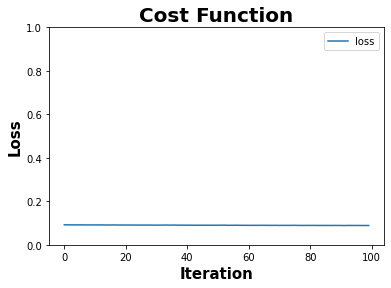

32/32 [==============================] - 0s 511us/step
TN, FP, FN, TP: 725 171 5 99
Accuracy = 0.824
Precesion = 0.36666666666666664
Recall = 0.9519230769230769
F1 = 0.5294117647058824
F0.5 = 0.4180743243243243
F2 = 0.7215743440233237
Gmean = 0.8776390246308245
Balanced Accu. = 0.8805374313186813
################################################## 4th CV ##################################################


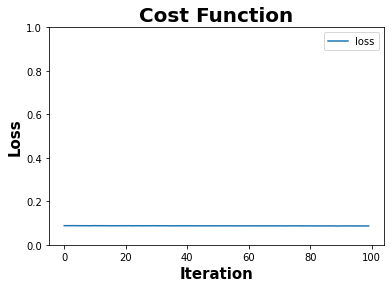

32/32 [==============================] - 0s 478us/step
TN, FP, FN, TP: 724 171 7 98
Accuracy = 0.822
Precesion = 0.3643122676579926
Recall = 0.9333333333333333
F1 = 0.5240641711229946
F0.5 = 0.41490262489415747
F2 = 0.7111756168359943
Gmean = 0.8689127177035474
Balanced Accu. = 0.8711359404096835
################################################## 5th CV ##################################################


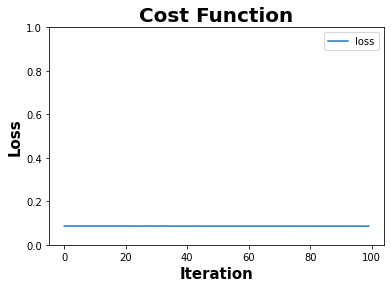

32/32 [==============================] - 0s 615us/step
TN, FP, FN, TP: 737 158 6 99
Accuracy = 0.836
Precesion = 0.3852140077821012
Recall = 0.9428571428571428
F1 = 0.5469613259668509
F0.5 = 0.4368932038834952
F2 = 0.7311669128508124
Gmean = 0.8811405218883349
Balanced Accu. = 0.8831604150039905
################################################## 6th CV ##################################################


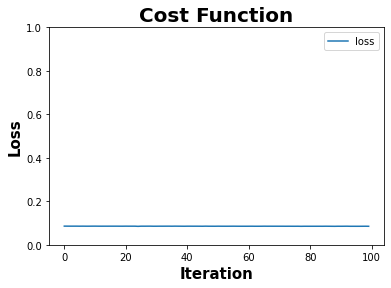

32/32 [==============================] - 0s 519us/step
TN, FP, FN, TP: 745 150 7 98
Accuracy = 0.843
Precesion = 0.3951612903225806
Recall = 0.9333333333333333
F1 = 0.5552407932011332
F0.5 = 0.44667274384685507
F2 = 0.7335329341317366
Gmean = 0.881424274868662
Balanced Accu. = 0.8828677839851025
################################################## 7th CV ##################################################


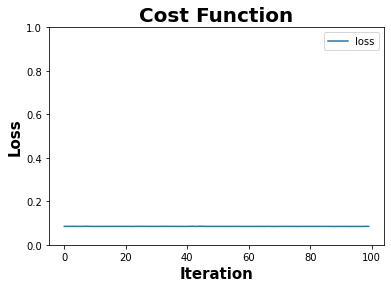

32/32 [==============================] - 0s 613us/step
TN, FP, FN, TP: 749 146 10 95
Accuracy = 0.844
Precesion = 0.3941908713692946
Recall = 0.9047619047619048
F1 = 0.5491329479768786
F0.5 = 0.4443405051449953
F2 = 0.7186081694402421
Gmean = 0.8701548482671093
Balanced Accu. = 0.8708167065708965
################################################## 8th CV ##################################################


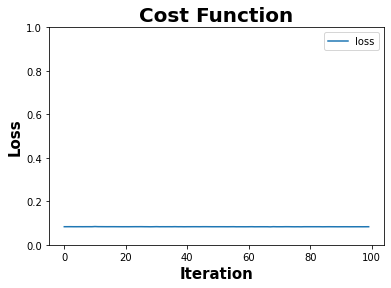

32/32 [==============================] - 0s 578us/step
TN, FP, FN, TP: 766 129 12 93
Accuracy = 0.859
Precesion = 0.4189189189189189
Recall = 0.8857142857142857
F1 = 0.5688073394495413
F0.5 = 0.46827794561933533
F2 = 0.7242990654205607
Gmean = 0.8706622040627466
Balanced Accu. = 0.8707901037509975
################################################## 9th CV ##################################################


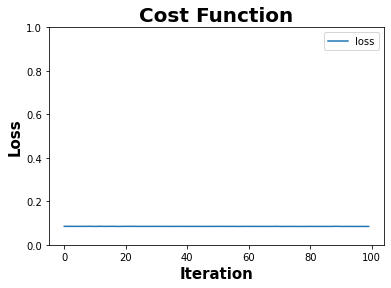

32/32 [==============================] - 0s 561us/step
TN, FP, FN, TP: 784 111 11 94
Accuracy = 0.878
Precesion = 0.4585365853658537
Recall = 0.8952380952380953
F1 = 0.6064516129032258
F0.5 = 0.5081081081081081
F2 = 0.752
Gmean = 0.8855555127195627
Balanced Accu. = 0.88560787443469
################################################## 10th CV ##################################################


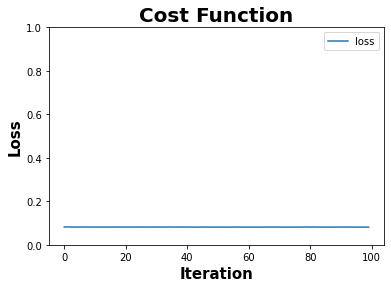

32/32 [==============================] - 0s 540us/step
TN, FP, FN, TP: 789 106 19 86
Accuracy = 0.875
Precesion = 0.4479166666666667
Recall = 0.819047619047619
F1 = 0.5791245791245792
F0.5 = 0.4925544100801832
F2 = 0.7026143790849673
Gmean = 0.8497311907704908
Balanced Accu. = 0.8503059324288375


In [66]:
gmean_acc = []
gmean_f1 = []
gmean_f5 = []
gmean_f2 = []
gmean_gmean = []
gmean_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // Gmean) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.5)   #0.5&0.005
print('batch_size: ', batch_size)
learning_rate=0.005

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(df_pca, df_pca['target']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
        
    model.compile(loss=Ours_Gmean, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    gmean_acc.append((TP+TN)/(TP+TN+FP+FN))
    gmean_f1.append(TP / (TP + 0.5*(FP+FN)))
    gmean_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    gmean_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    gmean_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    gmean_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [67]:
res['GAim'] = [np.mean(gmean_acc), np.mean(gmean_f1), np.mean(gmean_f5), np.mean(gmean_f2), np.mean(gmean_gmean), np.mean(gmean_bacc)]
res

Delta       BCE    AccAim     F1Aim    F.5Aim     F2Aim      GAim  \
Acc    0.920300  0.923900  0.924500  0.915800  0.924900  0.877700  0.834700   
F1     0.527334  0.590095  0.578506  0.636050  0.584536  0.594422  0.540051   
F.5    0.600958  0.639621  0.643734  0.602161  0.643895  0.502921  0.435759   
F2     0.476222  0.548616  0.525692  0.674827  0.537993  0.727356  0.712785   
Gmean  0.650637  0.712684  0.694489  0.812893  0.703328  0.867475  0.866778   
B_Acc  0.711984  0.747529  0.735166  0.822290  0.742470  0.868011  0.868504   

           BAim  
Acc    0.891600  
F1     0.611445  
F.5    0.536060  
F2     0.714780  
Gmean  0.852827  
B_Acc  0.855210

batch_size:  4500
################################################## 1th CV ##################################################


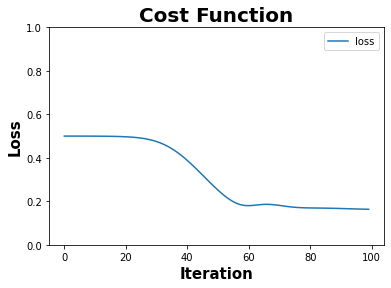

32/32 [==============================] - 0s 511us/step
TN, FP, FN, TP: 747 149 14 90
Accuracy = 0.837
Precesion = 0.37656903765690375
Recall = 0.8653846153846154
F1 = 0.5247813411078717
F0.5 = 0.42452830188679247
F2 = 0.6870229007633588
Gmean = 0.849397309764497
Balanced Accu. = 0.8495449862637363
################################################## 2th CV ##################################################


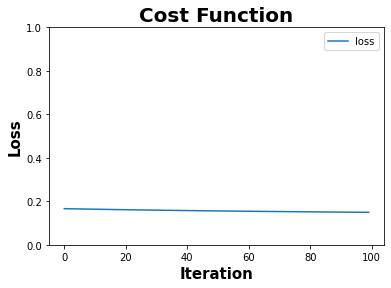

32/32 [==============================] - 0s 501us/step
TN, FP, FN, TP: 745 151 8 96
Accuracy = 0.841
Precesion = 0.38866396761133604
Recall = 0.9230769230769231
F1 = 0.5470085470085471
F0.5 = 0.43956043956043955
F2 = 0.7239819004524887
Gmean = 0.8760786130614857
Balanced Accu. = 0.8772750686813187
################################################## 3th CV ##################################################


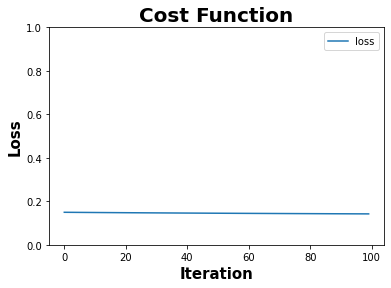

32/32 [==============================] - 0s 7ms/step
TN, FP, FN, TP: 763 133 7 97
Accuracy = 0.86
Precesion = 0.4217391304347826
Recall = 0.9326923076923077
F1 = 0.5808383233532934
F0.5 = 0.4736328125
F2 = 0.7507739938080497
Gmean = 0.8912046865166446
Balanced Accu. = 0.8921274038461539
################################################## 4th CV ##################################################


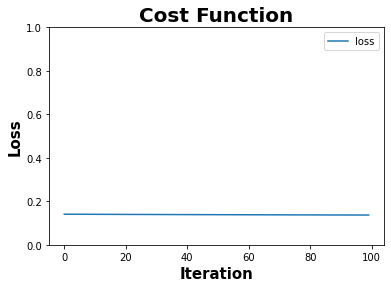

32/32 [==============================] - 0s 506us/step
TN, FP, FN, TP: 761 134 9 96
Accuracy = 0.857
Precesion = 0.41739130434782606
Recall = 0.9142857142857143
F1 = 0.573134328358209
F0.5 = 0.4682926829268293
F2 = 0.7384615384615385
Gmean = 0.881701902126726
Balanced Accu. = 0.8822825219473265
################################################## 5th CV ##################################################


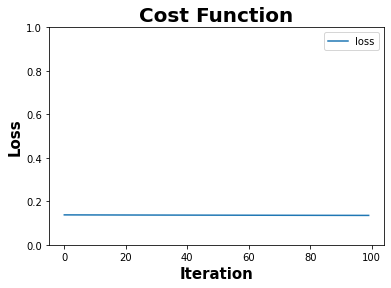

32/32 [==============================] - 0s 526us/step
TN, FP, FN, TP: 787 108 12 93
Accuracy = 0.88
Precesion = 0.4626865671641791
Recall = 0.8857142857142857
F1 = 0.6078431372549019
F0.5 = 0.5115511551155115
F2 = 0.7487922705314011
Gmean = 0.8825161734996293
Balanced Accu. = 0.8825219473264165
################################################## 6th CV ##################################################


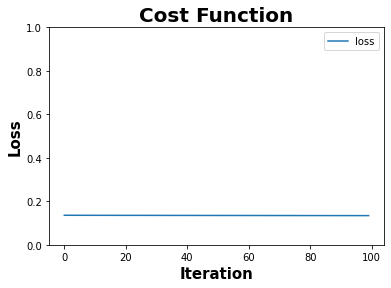

32/32 [==============================] - 0s 542us/step
TN, FP, FN, TP: 793 102 9 96
Accuracy = 0.889
Precesion = 0.48484848484848486
Recall = 0.9142857142857143
F1 = 0.6336633663366337
F0.5 = 0.5351170568561872
F2 = 0.7766990291262136
Gmean = 0.9000487705150574
Balanced Accu. = 0.9001596169193935
################################################## 7th CV ##################################################


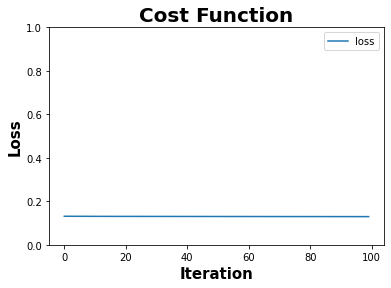

32/32 [==============================] - 0s 538us/step
TN, FP, FN, TP: 821 74 32 73
Accuracy = 0.894
Precesion = 0.4965986394557823
Recall = 0.6952380952380952
F1 = 0.5793650793650794
F0.5 = 0.5266955266955268
F2 = 0.6437389770723104
Gmean = 0.7985954683070347
Balanced Accu. = 0.8062782654961426
################################################## 8th CV ##################################################


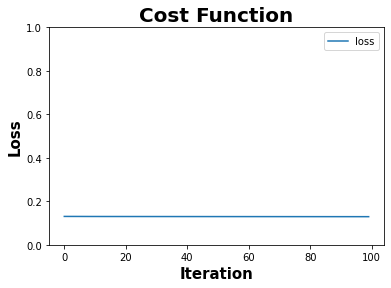

32/32 [==============================] - 0s 503us/step
TN, FP, FN, TP: 818 77 23 82
Accuracy = 0.9
Precesion = 0.5157232704402516
Recall = 0.780952380952381
F1 = 0.6212121212121212
F0.5 = 0.553306342780027
F2 = 0.7081174438687391
Gmean = 0.8448457249792388
Balanced Accu. = 0.8474594306996541
################################################## 9th CV ##################################################


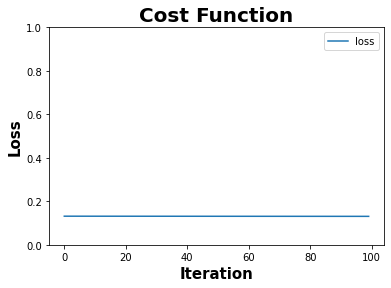

32/32 [==============================] - 0s 622us/step
TN, FP, FN, TP: 821 74 23 82
Accuracy = 0.903
Precesion = 0.5256410256410257
Recall = 0.780952380952381
F1 = 0.6283524904214559
F0.5 = 0.5624142661179699
F2 = 0.7118055555555556
Gmean = 0.8463935352386314
Balanced Accu. = 0.8491354083532854
################################################## 10th CV ##################################################


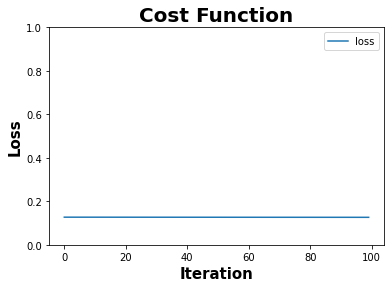

32/32 [==============================] - 0s 586us/step
TN, FP, FN, TP: 825 70 27 78
Accuracy = 0.903
Precesion = 0.527027027027027
Recall = 0.7428571428571429
F1 = 0.616600790513834
F0.5 = 0.5595408895265424
F2 = 0.6866197183098592
Gmean = 0.8275002019322563
Balanced Accu. = 0.8323224261771748


In [68]:
bacc_acc = []
bacc_f1 = []
bacc_f5 = []
bacc_f2 = []
bacc_gmean = []
bacc_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // Balanced Accuracy) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.5)   #0.5&0.005  866
print('batch_size: ', batch_size)
learning_rate=0.005

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(df_pca, df_pca['target']):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
     
    model.compile(loss=Ours_BAccu, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=X_train.shape[0])
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    bacc_acc.append((TP+TN)/(TP+TN+FP+FN))
    bacc_f1.append(TP / (TP + 0.5*(FP+FN)))
    bacc_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bacc_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bacc_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bacc_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [69]:
res['BAim'] = [np.mean(bacc_acc), np.mean(bacc_f1), np.mean(bacc_f5), np.mean(bacc_f2), np.mean(bacc_gmean), np.mean(bacc_bacc)]
res

Delta       BCE    AccAim     F1Aim    F.5Aim     F2Aim      GAim  \
Acc    0.920300  0.923900  0.924500  0.915800  0.924900  0.877700  0.834700   
F1     0.527334  0.590095  0.578506  0.636050  0.584536  0.594422  0.540051   
F.5    0.600958  0.639621  0.643734  0.602161  0.643895  0.502921  0.435759   
F2     0.476222  0.548616  0.525692  0.674827  0.537993  0.727356  0.712785   
Gmean  0.650637  0.712684  0.694489  0.812893  0.703328  0.867475  0.866778   
B_Acc  0.711984  0.747529  0.735166  0.822290  0.742470  0.868011  0.868504   

           BAim  
Acc    0.876400  
F1     0.591280  
F.5    0.505464  
F2     0.717601  
Gmean  0.859828  
B_Acc  0.861911

# 2. Creditcard Fraud Detection 2023(29d / 298531)

In [12]:
# class '0' = normal, class '1' = anomaly
card_df = pd.read_csv('creditcard_2023.csv')
card_df.shape

(568630, 31)

In [13]:
# 결측치 확인
card_df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
card_df.head()

id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  Class  
0 -0.434824 -0.081230 -0.151045  17982.10      0  
1  0.296503 -0.248052 -0.064512   6531.37      0  
2 -0.312895 -0.300258 -0.244718   2513.54      0  
3 -0.515950 -0.165316  0.048424   5384.44      0  
4  1.071126  0.023712  0.419117  14278.97      0  

[5 rows x 31 columns]

In [15]:
card_df.describe()

id            V1            V2            V3            V4  \
count  568630.000000  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   284314.500000 -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17   
std    164149.486122  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min         0.000000 -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00   
25%    142157.250000 -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01   
50%    284314.500000 -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02   
75%    426471.750000  8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01   
max    568629.000000  2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00   

                 V5            V6            V7            V8            V9  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   7.997245e-18 -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -9.952786e+00 -2.111111e+01 -4.351839e+00 -1.075634e+01 -3.751919e+00   
25%   -2.934955e-01 -4.458712e-01 -2.835329e-01 -1.922572e-01 -5.687446e-01   
50%    8.108788e-02  7.871758e-02  2.333659e-01 -1.145242e-01  9.252647e-02   
75%    4.397368e-01  4.977881e-01  5.259548e-01  4.729905e-02  5.592621e-01   
max    4.271689e+01  2.616840e+01  2.178730e+02  5.958040e+00  2.027006e+01   

       ...           V21           V22           V23           V24  \
count  ...  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean   ...  4.758361e-17  3.948640e-18  6.194741e-18 -2.799036e-18   
std    ...  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min    ... -1.938252e+01 -7.734798e+00 -3.029545e+01 -4.067968e+00   
25%    ... -1.664408e-01 -4.904892e-01 -2.376289e-01 -6.515801e-01   
50%    ... -3.743065e-02 -2.732881e-02 -5.968903e-02  1.590123e-02   
75%    ...  1.479787e-01  4.638817e-01  1.557153e-01  7.007374e-01   
max    ...  8.087080e+00  1.263251e+01  3.170763e+01  1.296564e+01   

                V25           V26           V27           V28         Amount  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  568630.000000   
mean  -3.178905e-17 -7.497417e-18 -3.598760e-17  2.609101e-17   12041.957635   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00    6919.644449   
min   -1.361263e+01 -8.226969e+00 -1.049863e+01 -3.903524e+01      50.010000   
25%   -5.541485e-01 -6.318948e-01 -3.049607e-01 -2.318783e-01    6054.892500   
50%   -8.193162e-03 -1.189208e-02 -1.729111e-01 -1.392973e-02   12030.150000   
75%    5.500147e-01  6.728879e-01  3.340230e-01  4.095903e-01   18036.330000   
max    1.462151e+01  5.623285e+00  1.132311e+02  7.725594e+01   24039.930000   

          Class  
count  568630.0  
mean        0.5  
std         0.5  
min         0.0  
25%         0.0  
50%         0.5  
75%         1.0  
max         1.0  

[8 rows x 31 columns]

In [16]:
# Amount values largely varies.

# # Normalization
# card_df.iloc[:,:-1] = (card_df.iloc[:,:-1] - card_df.iloc[:,:-1].min())/(card_df.iloc[:,:-1].max() - card_df.iloc[:,:-1].min())

# Standardization
card_df.iloc[:,:-1] = (card_df.iloc[:,:-1] - card_df.iloc[:,:-1].mean())/card_df.iloc[:,:-1].std()

card_df

id        V1        V2        V3        V4        V5        V6  \
0      -1.732046 -0.260648 -0.469648  2.496264 -0.083724  0.129681  0.732898   
1      -1.732040  0.985099 -0.356045  0.558056 -0.429654  0.277140  0.428604   
2      -1.732034 -0.260271 -0.949384  1.728536 -0.457986  0.074062  1.419480   
3      -1.732028 -0.152152 -0.508958  1.746839 -1.090177  0.249486  1.143311   
4      -1.732022 -0.206819 -0.165280  1.527051 -0.448292  0.106125  0.530548   
...          ...       ...       ...       ...       ...       ...       ...   
568625  1.732022 -0.833437  0.061886 -0.899793  0.904226 -1.002400  0.481453   
568626  1.732028 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  1.732034 -0.311997 -0.004095  0.137525 -0.035893 -0.042291  0.121098   
568628  1.732040  0.636870 -0.516969 -0.300888 -0.144480  0.131042 -0.294148   
568629  1.732046 -0.795143  0.433236 -0.649139  0.374732 -0.244976 -0.603492   

              V7        V8        V9  ...       V21       V22       V23  \
0       0.519013 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794   
1       0.406466 -0.133118  0.347452  ... -0.194936 -0.605760  0.079469   
2       0.743510 -0.095576 -0.261296  ... -0.005020  0.702906  0.945045   
3       0.518268 -0.065130 -0.205697  ... -0.146927 -0.038212 -0.214048   
4       0.658849 -0.212660  1.049920  ... -0.106984  0.729727 -0.161666   
...          ...       ...       ...  ...       ...       ...       ...   
568625 -0.370393  0.189693 -0.938152  ...  0.167503  0.419731  1.288248   
568626 -0.016935 -0.147733  0.483893  ...  0.031874  0.388161 -0.154257   
568627 -0.070958 -0.019997 -0.122048  ...  0.140787  0.536522 -0.211100   
568628  0.580568 -0.207723  0.893526  ... -0.060380 -0.195609 -0.175487   
568629 -0.347613 -0.340814  0.253971  ...  0.534853 -0.291514  0.157302   

             V24       V25       V26       V27       V28    Amount  Class  
0       0.165959  0.126280 -0.434824 -0.081230 -0.151045  0.858446      0  
1      -0.577394  0.190090  0.296502 -0.248052 -0.064512 -0.796369      0  
2      -1.154665 -0.605563 -0.312894 -0.300258 -0.244718 -1.377010      0  
3      -1.893129  1.003962 -0.515950 -0.165316  0.048424 -0.962118      0  
4       0.312561 -0.414116  1.071125  0.023712  0.419117  0.323284      0  
...          ...       ...       ...       ...       ...       ...    ...  
568625 -0.900860  0.560661 -0.006018  3.308965  0.081564 -1.105230      1  
568626 -0.846451 -0.153443  1.961396 -1.528640  1.704305 -1.067766      1  
568627 -0.448908  0.540073 -0.755835 -0.487539 -0.268741  1.666400      1  
568628 -0.554643 -0.099669 -1.434930 -0.159269 -0.076251 -0.271853      1  
568629  0.931029 -0.349423 -1.090973 -1.575111  0.722936  1.365961      1  

[568630 rows x 31 columns]

In [17]:
card_df['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [18]:
# Data is too balanced!!! We intentionally make it imbalanced.
df_0 = card_df[card_df['Class']==0]
df_1 = card_df[card_df['Class']==1]
print(len(df_0), len(df_1))

284315 284315


In [19]:
N = round(len(df_0)*0.05)
df_1_samp = df_1.sample(n=N, random_state = 100)
df_1_samp

id        V1        V2        V3        V4        V5        V6  \
506274  1.352179 -0.006870 -0.167584 -0.426402  0.286979  3.061201 -1.574602   
387527  0.628771 -1.505330  0.343708 -1.307073  1.727683 -0.524436 -2.021618   
365951  0.497330 -0.503065  0.153162 -0.422713 -0.354370 -0.419048 -0.107715   
525848  1.471424 -1.021538 -1.187974 -0.746483 -0.029644  0.009252 -0.507414   
481288  1.199964 -0.509792  0.194382 -0.386280 -0.611187  0.135320  0.440036   
...          ...       ...       ...       ...       ...       ...       ...   
491209  1.260403 -1.088031  0.682312 -0.917454  0.643955 -0.652642 -0.555339   
372018  0.534290 -2.281503  2.701140 -2.214454  1.222394 -2.728423 -2.561828   
343903  0.363014 -0.267325  0.352643 -0.836113  0.475835 -0.673489 -0.723249   
452083  1.022047 -2.174120  2.531664 -2.126482  1.202406 -2.566989 -2.477827   
426197  0.864349 -0.744756  1.408451 -1.380766  1.764603 -0.447114 -1.487728   

              V7        V8        V9  ...       V21       V22        V23  \
506274  0.044742 -0.428210  0.154000  ... -0.386374 -0.470302  -1.743519   
387527 -2.304781 -0.078004 -1.148383  ... -0.427704 -1.212065 -12.554995   
365951  0.314880 -0.203583  0.279555  ...  0.037084 -0.209385   0.549983   
525848  0.471536 -0.015704 -0.207999  ...  0.018479  0.766577   0.123668   
481288 -0.240672 -0.615084  0.251804  ... -0.095779  0.402399  -0.251087   
...          ...       ...       ...  ...       ...       ...        ...   
491209 -0.667876  0.288458 -0.764149  ...  0.528281  0.386071   0.095967   
372018 -2.136703  4.308934 -1.151728  ...  0.558177 -1.432524  -0.994643   
343903 -0.492036  0.200382 -0.714633  ...  0.283521  0.720715   0.230679   
452083 -2.045211  3.892891 -1.178189  ...  0.554093 -1.297113  -0.862695   
426197 -1.167358  0.650797 -1.865621  ...  0.551231 -0.288827  -0.500998   

             V24       V25       V26       V27       V28    Amount  Class  
506274 -1.185101 -1.558751 -1.397993 -0.012629  0.450646  1.114237      1  
387527  0.951595 -5.763942  0.191730  3.949965 -1.475321 -0.071128      1  
365951  0.396777 -1.430279 -2.486924 -0.617871  0.560011 -1.321357      1  
525848  0.268437  0.800809  0.413684 -0.034178 -0.097596  1.445303      1  
481288 -0.566821  0.409498 -1.473372 -0.251349 -0.044765 -0.010947      1  
...          ...       ...       ...       ...       ...       ...    ...  
491209  1.123651 -0.015030  0.636864 -1.803348  1.164825 -0.080206      1  
372018  0.310707  2.660860 -0.516013  1.909650  0.968061  0.731649      1  
343903  0.010768 -0.039101  1.150750  0.024092 -0.461128  0.646750      1  
452083  0.284146  2.371527 -0.520116  2.028946  1.024555  0.740116      1  
426197 -1.904449  2.568000  1.351435  2.508702  2.195854  0.724321      1  

[14216 rows x 31 columns]

In [20]:
df_card = concath(df_0, df_1_samp)
df_card

id        V1        V2        V3        V4        V5        V6  \
0      -1.732046 -0.260648 -0.469648  2.496264 -0.083724  0.129681  0.732898   
1      -1.732040  0.985099 -0.356045  0.558056 -0.429654  0.277140  0.428604   
2      -1.732034 -0.260271 -0.949384  1.728536 -0.457986  0.074062  1.419480   
3      -1.732028 -0.152152 -0.508958  1.746839 -1.090177  0.249486  1.143311   
4      -1.732022 -0.206819 -0.165280  1.527051 -0.448292  0.106125  0.530548   
...          ...       ...       ...       ...       ...       ...       ...   
491209  1.260403 -1.088031  0.682312 -0.917454  0.643955 -0.652642 -0.555339   
372018  0.534290 -2.281503  2.701140 -2.214454  1.222394 -2.728423 -2.561828   
343903  0.363014 -0.267325  0.352643 -0.836113  0.475835 -0.673489 -0.723249   
452083  1.022047 -2.174120  2.531664 -2.126482  1.202406 -2.566989 -2.477827   
426197  0.864349 -0.744756  1.408451 -1.380766  1.764603 -0.447114 -1.487728   

              V7        V8        V9  ...       V21       V22       V23  \
0       0.519013 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794   
1       0.406466 -0.133118  0.347452  ... -0.194936 -0.605760  0.079469   
2       0.743510 -0.095576 -0.261296  ... -0.005020  0.702906  0.945045   
3       0.518268 -0.065130 -0.205697  ... -0.146927 -0.038212 -0.214048   
4       0.658849 -0.212660  1.049920  ... -0.106984  0.729727 -0.161666   
...          ...       ...       ...  ...       ...       ...       ...   
491209 -0.667876  0.288458 -0.764149  ...  0.528281  0.386071  0.095967   
372018 -2.136703  4.308934 -1.151728  ...  0.558177 -1.432524 -0.994643   
343903 -0.492036  0.200382 -0.714633  ...  0.283521  0.720715  0.230679   
452083 -2.045211  3.892891 -1.178189  ...  0.554093 -1.297113 -0.862695   
426197 -1.167358  0.650797 -1.865621  ...  0.551231 -0.288827 -0.500998   

             V24       V25       V26       V27       V28    Amount  Class  
0       0.165959  0.126280 -0.434824 -0.081230 -0.151045  0.858446      0  
1      -0.577394  0.190090  0.296502 -0.248052 -0.064512 -0.796369      0  
2      -1.154665 -0.605563 -0.312894 -0.300258 -0.244718 -1.377010      0  
3      -1.893129  1.003962 -0.515950 -0.165316  0.048424 -0.962118      0  
4       0.312561 -0.414116  1.071125  0.023712  0.419117  0.323284      0  
...          ...       ...       ...       ...       ...       ...    ...  
491209  1.123651 -0.015030  0.636864 -1.803348  1.164825 -0.080206      1  
372018  0.310707  2.660860 -0.516013  1.909650  0.968061  0.731649      1  
343903  0.010768 -0.039101  1.150750  0.024092 -0.461128  0.646750      1  
452083  0.284146  2.371527 -0.520116  2.028946  1.024555  0.740116      1  
426197 -1.904449  2.568000  1.351435  2.508702  2.195854  0.724321      1  

[298531 rows x 31 columns]

In [21]:
df_card.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
df_card = df_card.drop('id', axis=1)
df_card

V1        V2        V3        V4        V5        V6        V7  \
0      -0.260648 -0.469648  2.496264 -0.083724  0.129681  0.732898  0.519013   
1       0.985099 -0.356045  0.558056 -0.429654  0.277140  0.428604  0.406466   
2      -0.260271 -0.949384  1.728536 -0.457986  0.074062  1.419480  0.743510   
3      -0.152152 -0.508958  1.746839 -1.090177  0.249486  1.143311  0.518268   
4      -0.206819 -0.165280  1.527051 -0.448292  0.106125  0.530548  0.658849   
...          ...       ...       ...       ...       ...       ...       ...   
491209 -1.088031  0.682312 -0.917454  0.643955 -0.652642 -0.555339 -0.667876   
372018 -2.281503  2.701140 -2.214454  1.222394 -2.728423 -2.561828 -2.136703   
343903 -0.267325  0.352643 -0.836113  0.475835 -0.673489 -0.723249 -0.492036   
452083 -2.174120  2.531664 -2.126482  1.202406 -2.566989 -2.477827 -2.045211   
426197 -0.744756  1.408451 -1.380766  1.764603 -0.447114 -1.487728 -1.167358   

              V8        V9       V10  ...       V21       V22       V23  \
0      -0.130006  0.727159  0.637734  ... -0.110552  0.217606 -0.134794   
1      -0.133118  0.347452  0.529808  ... -0.194936 -0.605760  0.079469   
2      -0.095576 -0.261296  0.690707  ... -0.005020  0.702906  0.945045   
3      -0.065130 -0.205697  0.575230  ... -0.146927 -0.038212 -0.214048   
4      -0.212660  1.049920  0.968045  ... -0.106984  0.729727 -0.161666   
...          ...       ...       ...  ...       ...       ...       ...   
491209  0.288458 -0.764149 -0.665831  ...  0.528281  0.386071  0.095967   
372018  4.308934 -1.151728 -1.283930  ...  0.558177 -1.432524 -0.994643   
343903  0.200382 -0.714633 -0.660779  ...  0.283521  0.720715  0.230679   
452083  3.892891 -1.178189 -1.315622  ...  0.554093 -1.297113 -0.862695   
426197  0.650797 -1.865621 -1.895035  ...  0.551231 -0.288827 -0.500998   

             V24       V25       V26       V27       V28    Amount  Class  
0       0.165959  0.126280 -0.434824 -0.081230 -0.151045  0.858446      0  
1      -0.577394  0.190090  0.296502 -0.248052 -0.064512 -0.796369      0  
2      -1.154665 -0.605563 -0.312894 -0.300258 -0.244718 -1.377010      0  
3      -1.893129  1.003962 -0.515950 -0.165316  0.048424 -0.962118      0  
4       0.312561 -0.414116  1.071125  0.023712  0.419117  0.323284      0  
...          ...       ...       ...       ...       ...       ...    ...  
491209  1.123651 -0.015030  0.636864 -1.803348  1.164825 -0.080206      1  
372018  0.310707  2.660860 -0.516013  1.909650  0.968061  0.731649      1  
343903  0.010768 -0.039101  1.150750  0.024092 -0.461128  0.646750      1  
452083  0.284146  2.371527 -0.520116  2.028946  1.024555  0.740116      1  
426197 -1.904449  2.568000  1.351435  2.508702  2.195854  0.724321      1  

[298531 rows x 30 columns]

In [23]:
res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])

In [24]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)

X = df_card.iloc[:, :-1]
y = df_card.iloc[:, -1]

In [25]:
L = 73
hidden_node = 2
# momentum=0.9
activation = 'sigmoid'  
kernel_initializer=keras.initializers.he_normal(seed=100)
epochs=100

batch_size:  13433
################################################## 1th CV ##################################################


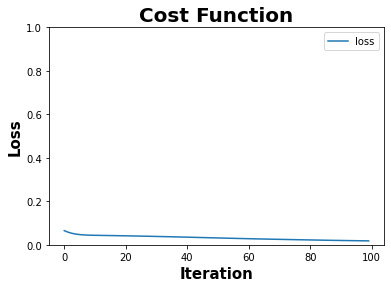

933/933 [==============================] - 0s 455us/step
TN, FP, FN, TP: 28430 2 599 823
Accuracy = 0.9798686943123199
Precesion = 0.9975757575757576
Recall = 0.5787623066104078
F1 = 0.7325322652425457
F0.5 = 0.8714527742481998
F2 = 0.6318132964839552
Gmean = 0.7607375333018666
Balanced Accu. = 0.7893459816676125
################################################## 2th CV ##################################################


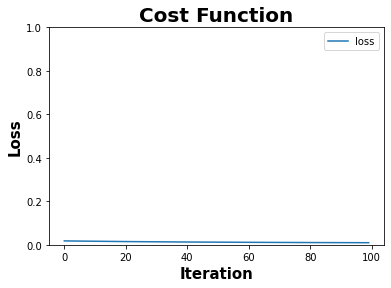

933/933 [==============================] - 0s 430us/step
TN, FP, FN, TP: 28424 8 251 1170
Accuracy = 0.9913241550262956
Precesion = 0.9932088285229203
Recall = 0.8233638282899367
F1 = 0.9003462870334744
F0.5 = 0.9538561878362953
F2 = 0.852521130865637
Gmean = 0.907266309225985
Balanced Accu. = 0.9115412275946025
################################################## 3th CV ##################################################


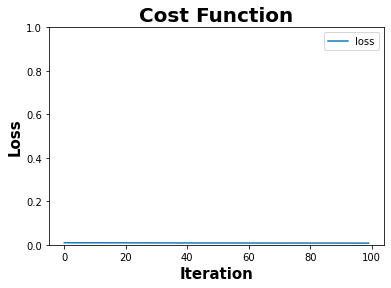

933/933 [==============================] - 0s 440us/step
TN, FP, FN, TP: 28422 10 254 1167
Accuracy = 0.9911566676715908
Precesion = 0.9915038232795242
Recall = 0.8212526389866291
F1 = 0.8983833718244804
F0.5 = 0.9520313264806657
F2 = 0.8504591167468298
Gmean = 0.9060705220813304
Balanced Accu. = 0.9104504613053573
################################################## 4th CV ##################################################


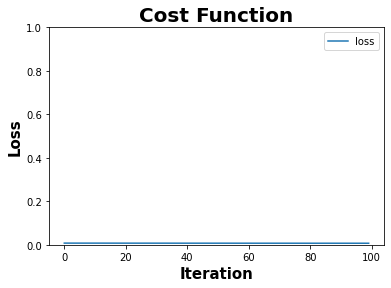

933/933 [==============================] - 0s 463us/step
TN, FP, FN, TP: 28425 7 257 1164
Accuracy = 0.9911566676715908
Precesion = 0.9940222032450897
Recall = 0.8191414496833216
F1 = 0.8981481481481481
F0.5 = 0.9533169533169533
F2 = 0.849015317286652
Gmean = 0.9049529136147862
Balanced Accu. = 0.9094476241100907
################################################## 5th CV ##################################################


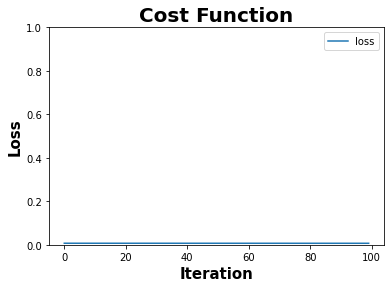

933/933 [==============================] - 1s 481us/step
TN, FP, FN, TP: 28423 9 262 1159
Accuracy = 0.9909221853750042
Precesion = 0.9922945205479452
Recall = 0.8156228008444757
F1 = 0.895326380842024
F0.5 = 0.9510914163794517
F2 = 0.8457384705195563
Gmean = 0.9029754258773669
Balanced Accu. = 0.9076531280530764
################################################## 6th CV ##################################################


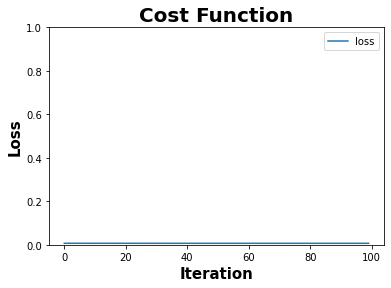

933/933 [==============================] - 0s 449us/step
TN, FP, FN, TP: 28418 13 235 1187
Accuracy = 0.9916926272066459
Precesion = 0.9891666666666666
Recall = 0.8347398030942335
F1 = 0.9054157131960335
F0.5 = 0.9538733526197364
F2 = 0.8616434378629502
Gmean = 0.9134320557731392
Balanced Accu. = 0.917141277861703
################################################## 7th CV ##################################################


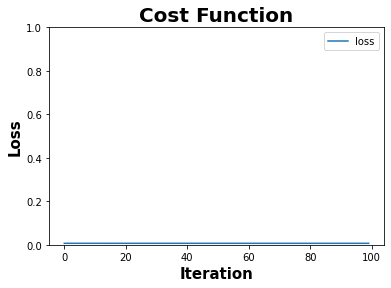

933/933 [==============================] - 0s 453us/step
TN, FP, FN, TP: 28418 13 220 1202
Accuracy = 0.9921950892707601
Precesion = 0.9893004115226337
Recall = 0.8452883263009845
F1 = 0.9116420174440653
F0.5 = 0.956701687360713
F2 = 0.8706359553817181
Gmean = 0.9191854113486528
Balanced Accu. = 0.9224155394650784
################################################## 8th CV ##################################################


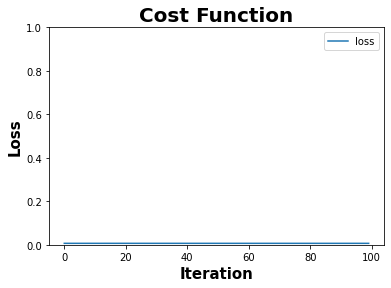

933/933 [==============================] - 0s 439us/step
TN, FP, FN, TP: 28416 15 226 1196
Accuracy = 0.9919271095032325
Precesion = 0.9876135425268373
Recall = 0.8410689170182841
F1 = 0.9084694265096848
F0.5 = 0.954356846473029
F2 = 0.8667922887374983
Gmean = 0.9168561363943982
Balanced Accu. = 0.9202706619490493
################################################## 9th CV ##################################################


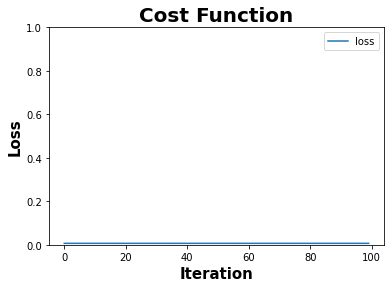

933/933 [==============================] - 0s 438us/step
TN, FP, FN, TP: 28424 7 208 1214
Accuracy = 0.9927980437476971
Precesion = 0.9942669942669943
Recall = 0.8537271448663853
F1 = 0.9186530457813091
F0.5 = 0.9625753250872187
F2 = 0.8785641916341004
Gmean = 0.9238598100368096
Balanced Accu. = 0.926740467371816
################################################## 10th CV ##################################################


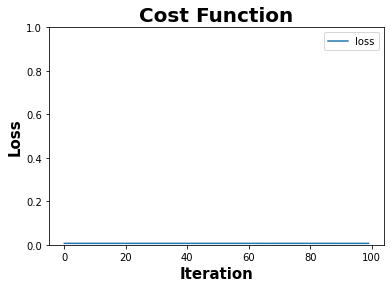

933/933 [==============================] - 0s 451us/step
TN, FP, FN, TP: 28421 10 210 1212
Accuracy = 0.9926305563929924
Precesion = 0.9918166939443536
Recall = 0.8523206751054853
F1 = 0.9167927382753404
F0.5 = 0.9603803486529319
F2 = 0.8769898697539797
Gmean = 0.9230497762431703
Balanced Accu. = 0.9259844731793474


In [84]:
ada_acc = []
ada_f1 = []
ada_f5 = []
ada_f2 = []
ada_gmean = []
ada_bacc = []

n_iter=0

###################### MLP (sigmoid // MSE) ##############################
batch_size = int(X.shape[0]*0.9 * 0.05)  
print('batch_size: ', batch_size)
learning_rate = 0.0005

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(df_card, df_card.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
        
    model.compile(loss=MSE, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()
    predicted = []
    result = model.predict(X_test)
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    ada_acc.append((TP+TN)/(TP+TN+FP+FN))
    ada_f1.append(TP / (TP + 0.5*(FP+FN)))
    ada_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    ada_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    ada_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    ada_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    

In [85]:
res['Delta'] = [np.mean(ada_acc), np.mean(ada_f1), np.mean(ada_f5), np.mean(ada_f2), np.mean(ada_gmean), np.mean(ada_bacc)]
res

Delta  BCE  AccAim  F1Aim  F.5Aim  F2Aim  GAim  BAim
Acc    0.990567    0       0      0       0      0     0     0
F1     0.888571    0       0      0       0      0     0     0
F.5    0.946964    0       0      0       0      0     0     0
F2     0.838417    0       0      0       0      0     0     0
Gmean  0.897839    0       0      0       0      0     0     0
B_Acc  0.904099    0       0      0       0      0     0     0

batch_size:  13433
################################################## 1th CV ##################################################


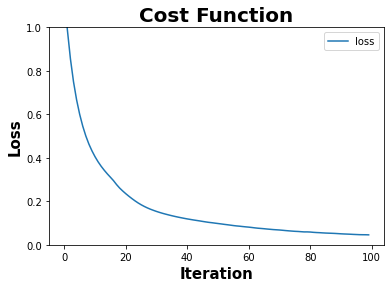

933/933 [==============================] - 0s 471us/step
TN, FP, FN, TP: 28418 14 200 1222
Accuracy = 0.9928317813358344
Precesion = 0.988673139158576
Recall = 0.8593530239099859
F1 = 0.9194883370955605
F0.5 = 0.9597863650644046
F2 = 0.8824378971692663
Gmean = 0.9267846977406915
Balanced Accu. = 0.9294303104918529
################################################## 2th CV ##################################################


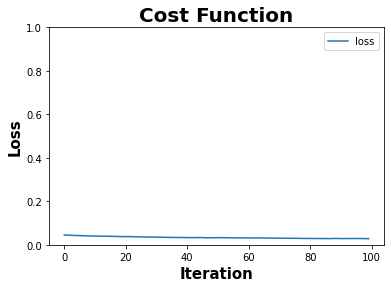

933/933 [==============================] - 0s 448us/step
TN, FP, FN, TP: 28412 20 178 1243
Accuracy = 0.9933675007536931
Precesion = 0.9841646872525732
Recall = 0.8747361013370866
F1 = 0.9262295081967213
F0.5 = 0.9601421288428859
F2 = 0.8946307758744781
Gmean = 0.9349442674909553
Balanced Accu. = 0.9370163342926288
################################################## 3th CV ##################################################


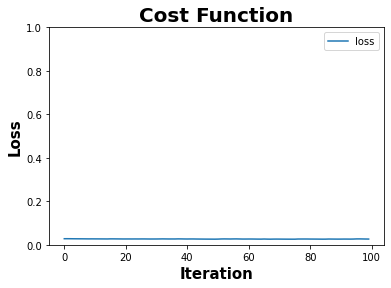

933/933 [==============================] - 0s 435us/step
TN, FP, FN, TP: 28405 27 184 1237
Accuracy = 0.9929320336314609
Precesion = 0.9786392405063291
Recall = 0.8705137227304715
F1 = 0.921415270018622
F0.5 = 0.9549174000308785
F2 = 0.8901842256764536
Gmean = 0.9325701330810281
Balanced Accu. = 0.9347820442577512
################################################## 4th CV ##################################################


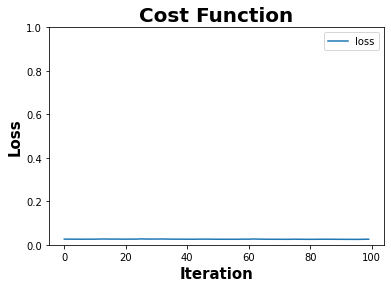

933/933 [==============================] - 0s 439us/step
TN, FP, FN, TP: 28392 40 170 1251
Accuracy = 0.9929655311024018
Precesion = 0.9690162664601084
Recall = 0.88036593947924
F1 = 0.922566371681416
F0.5 = 0.9498861047835991
F2 = 0.896774193548387
Gmean = 0.9376179301871266
Balanced Accu. = 0.9394795369877911
################################################## 5th CV ##################################################


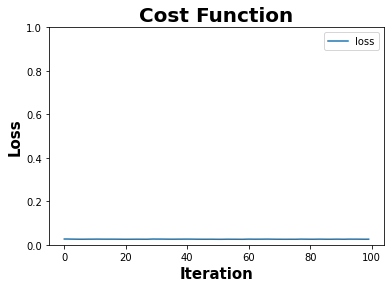

933/933 [==============================] - 0s 455us/step
TN, FP, FN, TP: 28400 32 161 1260
Accuracy = 0.9935349881083978
Precesion = 0.9752321981424149
Recall = 0.8866995073891626
F1 = 0.9288610394397346
F0.5 = 0.9561390195780847
F2 = 0.9030963302752293
Gmean = 0.9411171732732952
Balanced Accu. = 0.9427870074931182
################################################## 6th CV ##################################################


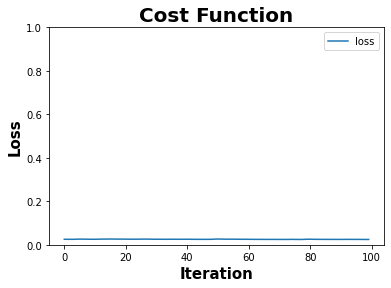

933/933 [==============================] - 0s 478us/step
TN, FP, FN, TP: 28399 32 155 1267
Accuracy = 0.9937359729340435
Precesion = 0.9753656658968437
Recall = 0.8909985935302391
F1 = 0.9312752664461595
F0.5 = 0.9572378362042914
F2 = 0.9066838414197795
Gmean = 0.9433958586459964
Balanced Accu. = 0.9449365307702549
################################################## 7th CV ##################################################


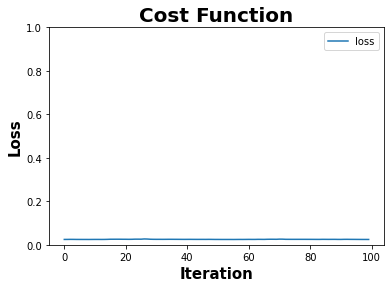

933/933 [==============================] - 1s 469us/step
TN, FP, FN, TP: 28399 32 147 1275
Accuracy = 0.994003952701571
Precesion = 0.9755164498852333
Recall = 0.8966244725738397
F1 = 0.9344082081348479
F0.5 = 0.9586466165413534
F2 = 0.9113652609006433
Gmean = 0.9463695330298749
Balanced Accu. = 0.947749470292055
################################################## 8th CV ##################################################


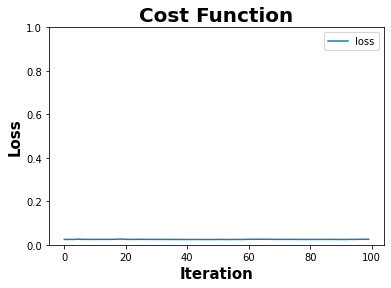

933/933 [==============================] - 0s 452us/step
TN, FP, FN, TP: 28392 39 155 1267
Accuracy = 0.9935014906374569
Precesion = 0.9701378254211332
Recall = 0.8909985935302391
F1 = 0.9288856304985337
F0.5 = 0.9532049352994282
F2 = 0.905776379754075
Gmean = 0.9432795838124192
Balanced Accu. = 0.9448134257088782
################################################## 9th CV ##################################################


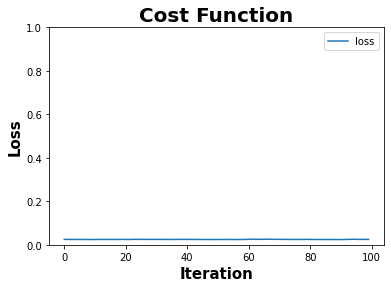

933/933 [==============================] - 0s 456us/step
TN, FP, FN, TP: 28400 31 142 1280
Accuracy = 0.9942049375272167
Precesion = 0.9763539282990084
Recall = 0.90014064697609
F1 = 0.9366995975118917
F0.5 = 0.9600960096009601
F2 = 0.9144163451921703
Gmean = 0.948240038395781
Balanced Accu. = 0.9495251439305197
################################################## 10th CV ##################################################


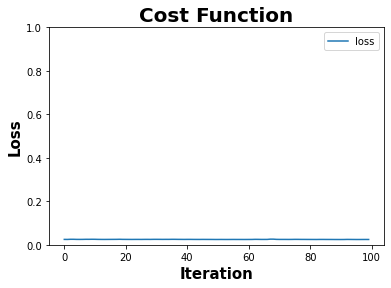

933/933 [==============================] - 0s 453us/step
TN, FP, FN, TP: 28396 35 137 1285
Accuracy = 0.9942384349981577
Precesion = 0.9734848484848485
Recall = 0.9036568213783404
F1 = 0.937272064186725
F0.5 = 0.9586690540137272
F2 = 0.9168093607305937
Gmean = 0.9500233544991135
Balanced Accu. = 0.9512128853822868


In [86]:
bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // BCE) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)  
print('batch_size: ', batch_size)
learning_rate=0.005

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(df_card, df_card.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=BCE, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = model.predict(X_test)
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    

In [87]:
res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res

Delta       BCE  AccAim  F1Aim  F.5Aim  F2Aim  GAim  BAim
Acc    0.990567  0.993532       0      0       0      0     0     0
F1     0.888571  0.928710       0      0       0      0     0     0
F.5    0.946964  0.956873       0      0       0      0     0     0
F2     0.838417  0.902217       0      0       0      0     0     0
Gmean  0.897839  0.940434       0      0       0      0     0     0
B_Acc  0.904099  0.942173       0      0       0      0     0     0

batch_size:  13433
################################################## 1th CV ##################################################


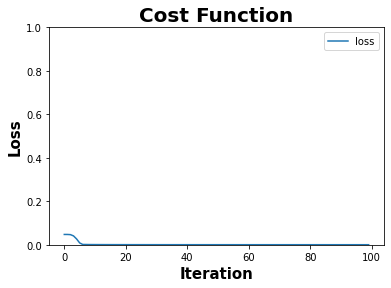

933/933 [==============================] - 0s 474us/step
TN, FP, FN, TP: 28429 3 229 1193
Accuracy = 0.9922288470556709
Precesion = 0.9974916387959866
Recall = 0.8389592123769339
F1 = 0.9113827349121467
F0.5 = 0.9611666129552046
F2 = 0.8665020337013365
Gmean = 0.9158988424868866
Balanced Accu. = 0.9194268487320798
################################################## 2th CV ##################################################


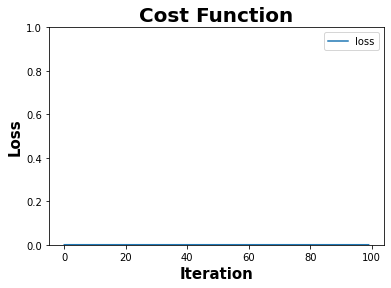

933/933 [==============================] - 0s 448us/step
TN, FP, FN, TP: 28424 8 224 1197
Accuracy = 0.992228586741701
Precesion = 0.9933609958506224
Recall = 0.8423645320197044
F1 = 0.9116527037319117
F0.5 = 0.9589809325428617
F2 = 0.8687763100595152
Gmean = 0.9176750586669465
Balanced Accu. = 0.9210415794594864
################################################## 3th CV ##################################################


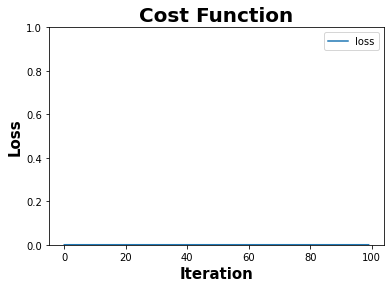

933/933 [==============================] - 0s 433us/step
TN, FP, FN, TP: 28422 10 226 1195
Accuracy = 0.9920945968579372
Precesion = 0.991701244813278
Recall = 0.8409570724841661
F1 = 0.9101294744859101
F0.5 = 0.9573786252203172
F2 = 0.8673247205690231
Gmean = 0.9168758335294547
Balanced Accu. = 0.9203026780541258
################################################## 4th CV ##################################################


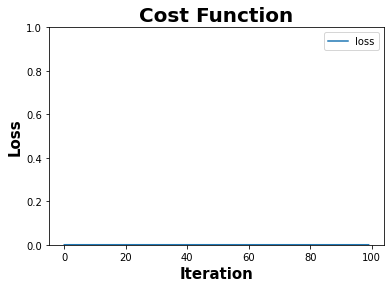

933/933 [==============================] - 0s 454us/step
TN, FP, FN, TP: 28410 22 201 1220
Accuracy = 0.9925300639801695
Precesion = 0.9822866344605475
Recall = 0.8585503166783955
F1 = 0.9162598573037927
F0.5 = 0.9547660040694945
F2 = 0.8807392434305515
Gmean = 0.9262213509876386
Balanced Accu. = 0.9288882703256919
################################################## 5th CV ##################################################


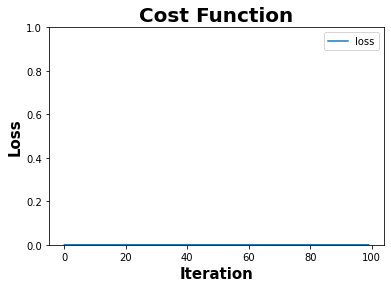

933/933 [==============================] - 0s 456us/step
TN, FP, FN, TP: 28412 20 128 1293
Accuracy = 0.9950423743007403
Precesion = 0.9847677075399848
Recall = 0.9099225897255454
F1 = 0.9458668617410387
F0.5 = 0.9688296118687247
F2 = 0.9239674146062598
Gmean = 0.9535630657561688
Balanced Accu. = 0.9546095784868582
################################################## 6th CV ##################################################


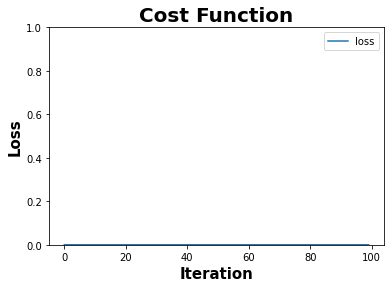

933/933 [==============================] - 0s 448us/step
TN, FP, FN, TP: 28403 28 128 1294
Accuracy = 0.9947743945332127
Precesion = 0.9788199697428139
Recall = 0.909985935302391
F1 = 0.9431486880466472
F0.5 = 0.9642324888226528
F2 = 0.9229671897289586
Gmean = 0.9534619784275892
Balanced Accu. = 0.9545005474056889
################################################## 7th CV ##################################################


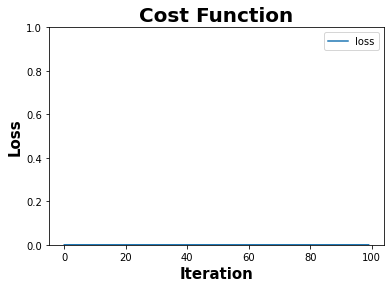

933/933 [==============================] - 0s 456us/step
TN, FP, FN, TP: 28395 36 106 1316
Accuracy = 0.995243359126386
Precesion = 0.9733727810650887
Recall = 0.9254571026722925
F1 = 0.9488103821196827
F0.5 = 0.9633967789165446
F2 = 0.9346590909090909
Gmean = 0.9613975593641477
Balanced Accu. = 0.9620954395919235
################################################## 8th CV ##################################################


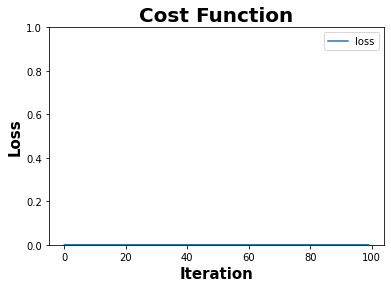

933/933 [==============================] - 0s 463us/step
TN, FP, FN, TP: 28401 30 112 1310
Accuracy = 0.995243359126386
Precesion = 0.9776119402985075
Recall = 0.9212376933895922
F1 = 0.9485879797248371
F0.5 = 0.9657918018283691
F2 = 0.9319863403528743
Gmean = 0.9593047566083553
Balanced Accu. = 0.9600912535746104
################################################## 9th CV ##################################################


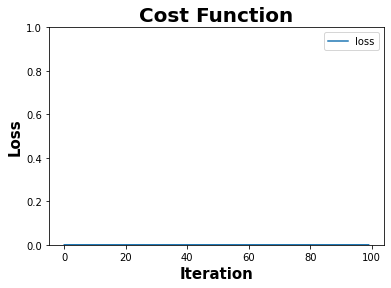

933/933 [==============================] - 0s 453us/step
TN, FP, FN, TP: 28410 21 118 1304
Accuracy = 0.9953438515392088
Precesion = 0.9841509433962264
Recall = 0.9170182841068917
F1 = 0.9493993447397161
F0.5 = 0.9699494198155312
F2 = 0.9297019820333665
Gmean = 0.9572569908619109
Balanced Accu. = 0.9581398268693158
################################################## 10th CV ##################################################


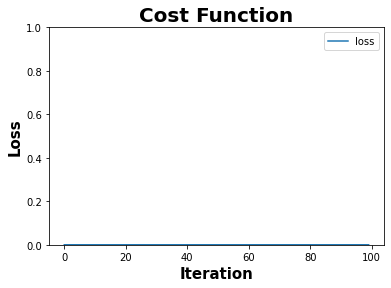

933/933 [==============================] - 0s 442us/step
TN, FP, FN, TP: 28406 25 117 1305
Accuracy = 0.995243359126386
Precesion = 0.981203007518797
Recall = 0.9177215189873418
F1 = 0.9484011627906976
F0.5 = 0.9678137051320083
F2 = 0.9297520661157025
Gmean = 0.9575565499686698
Balanced Accu. = 0.9584210985601829


In [88]:
acc_acc = []
acc_f1 = []
acc_f5 = []
acc_f2 = []
acc_gmean = []
acc_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // Accuracy) ##############################
batch_size = int(X.shape[0]*0.9 * 0.05)   # 
print('batch_size: ', batch_size)
learning_rate = 0.003

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(df_card, df_card.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=Ours_Accu, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    acc_acc.append((TP+TN)/(TP+TN+FP+FN))
    acc_f1.append(TP / (TP + 0.5*(FP+FN)))
    acc_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    acc_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    acc_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    acc_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [89]:
res['AccAim'] = [np.mean(acc_acc), np.mean(acc_f1), np.mean(acc_f5), np.mean(acc_f2), np.mean(acc_gmean), np.mean(acc_bacc)]
res

Delta       BCE    AccAim  F1Aim  F.5Aim  F2Aim  GAim  BAim
Acc    0.990567  0.993532  0.993997      0       0      0     0     0
F1     0.888571  0.928710  0.933364      0       0      0     0     0
F.5    0.946964  0.956873  0.963231      0       0      0     0     0
F2     0.838417  0.902217  0.905638      0       0      0     0     0
Gmean  0.897839  0.940434  0.941921      0       0      0     0     0
B_Acc  0.904099  0.942173  0.943752      0       0      0     0     0

batch_size:  13433
################################################## 1th CV ##################################################


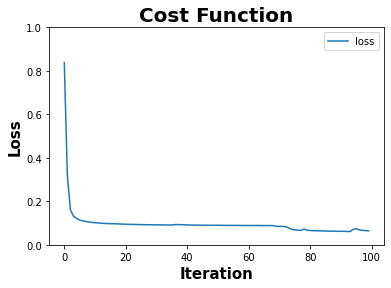

933/933 [==============================] - 0s 432us/step
TN, FP, FN, TP: 28421 11 169 1253
Accuracy = 0.9939706571983654
Precesion = 0.9912974683544303
Recall = 0.8811533052039381
F1 = 0.9329858525688757
F0.5 = 0.9671194813213956
F2 = 0.9011795166858457
Gmean = 0.9385160614246799
Balanced Accu. = 0.9403832085952161
################################################## 2th CV ##################################################


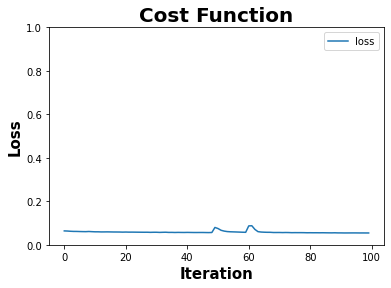

933/933 [==============================] - 0s 424us/step
TN, FP, FN, TP: 28414 18 115 1306
Accuracy = 0.9955448363648545
Precesion = 0.986404833836858
Recall = 0.9190710767065446
F1 = 0.9515482695810564
F0.5 = 0.9721601905612623
F2 = 0.9317922374429224
Gmean = 0.9583784338556414
Balanced Accu. = 0.9592189936149493
################################################## 3th CV ##################################################


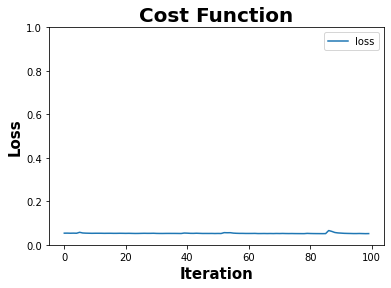

933/933 [==============================] - 0s 428us/step
TN, FP, FN, TP: 28403 29 127 1294
Accuracy = 0.9947743945332127
Precesion = 0.9780801209372638
Recall = 0.9106263194933145
F1 = 0.9431486880466472
F0.5 = 0.9638015790257708
F2 = 0.9233623519337806
Gmean = 0.9537806357572434
Balanced Accu. = 0.9548031710015813
################################################## 4th CV ##################################################


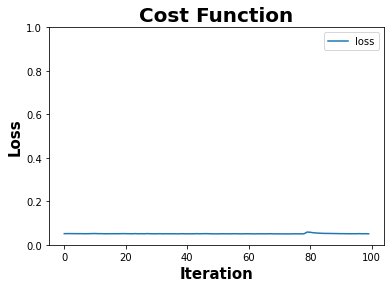

933/933 [==============================] - 0s 425us/step
TN, FP, FN, TP: 28410 22 137 1284
Accuracy = 0.9946739021203899
Precesion = 0.9831546707503829
Recall = 0.9035890218156228
F1 = 0.9416941694169417
F0.5 = 0.9661399548532731
F2 = 0.9184549356223176
Gmean = 0.9502051601061062
Balanced Accu. = 0.9514076228943056
################################################## 5th CV ##################################################


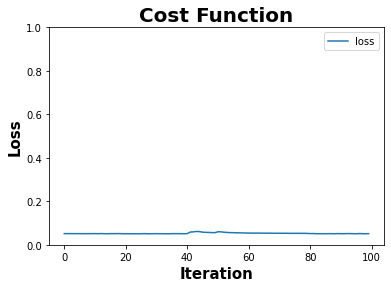

933/933 [==============================] - 0s 439us/step
TN, FP, FN, TP: 28411 21 120 1301
Accuracy = 0.9952768565973269
Precesion = 0.9841149773071104
Recall = 0.9155524278676987
F1 = 0.9485964272694131
F0.5 = 0.9695930839171263
F2 = 0.9284898658292892
Gmean = 0.9564916083404659
Balanced Accu. = 0.9574069117391392
################################################## 6th CV ##################################################


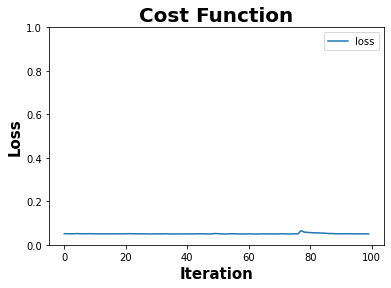

933/933 [==============================] - 0s 439us/step
TN, FP, FN, TP: 28397 34 122 1300
Accuracy = 0.9947743945332127
Precesion = 0.974512743628186
Recall = 0.9142053445850914
F1 = 0.9433962264150944
F0.5 = 0.9618230245634802
F2 = 0.9256622045001425
Gmean = 0.9555689754091785
Balanced Accu. = 0.9565047334230019
################################################## 7th CV ##################################################


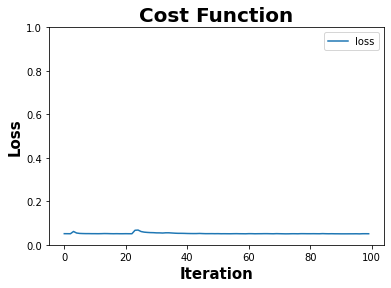

933/933 [==============================] - 0s 424us/step
TN, FP, FN, TP: 28405 26 101 1321
Accuracy = 0.9957458211905001
Precesion = 0.9806978470675576
Recall = 0.9289732770745429
F1 = 0.9541350668111231
F0.5 = 0.9698972099853157
F2 = 0.9388770433546553
Gmean = 0.9633917873313639
Balanced Accu. = 0.9640293911664438
################################################## 8th CV ##################################################


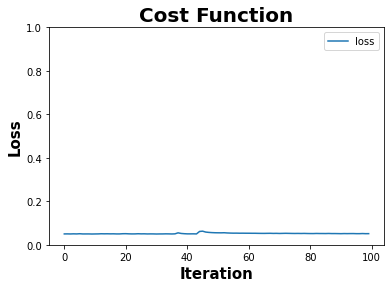

933/933 [==============================] - 0s 421us/step
TN, FP, FN, TP: 28401 30 110 1312
Accuracy = 0.9953103540682678
Precesion = 0.977645305514158
Recall = 0.9226441631504922
F1 = 0.9493487698986975
F0.5 = 0.9661266568483063
F2 = 0.9331436699857752
Gmean = 0.9600367710274315
Balanced Accu. = 0.9607944884550604
################################################## 9th CV ##################################################


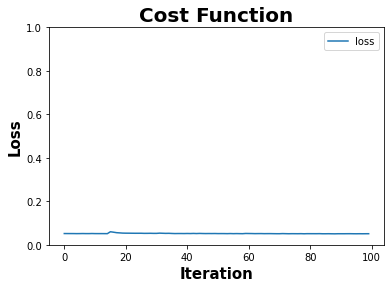

933/933 [==============================] - 0s 437us/step
TN, FP, FN, TP: 28412 19 119 1303
Accuracy = 0.9953773490101497
Precesion = 0.9856278366111951
Recall = 0.9163150492264416
F1 = 0.9497084548104956
F0.5 = 0.9709388971684053
F2 = 0.9293865905848787
Gmean = 0.9569235549263981
Balanced Accu. = 0.9578233823037698
################################################## 10th CV ##################################################


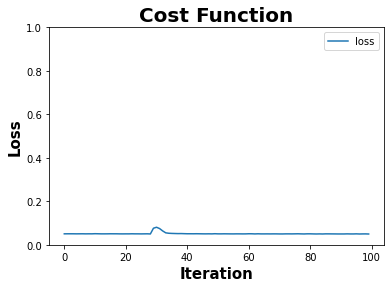

933/933 [==============================] - 0s 423us/step
TN, FP, FN, TP: 28401 30 113 1309
Accuracy = 0.995209861655445
Precesion = 0.977595220313667
Recall = 0.9205344585091421
F1 = 0.9482071713147411
F0.5 = 0.9656240778990853
F2 = 0.9314074284901095
Gmean = 0.9589385398526517
Balanced Accu. = 0.9597396361343853


In [41]:
f1_acc = []
f1_f1 = []
f1_f5 = []
f1_f2 = []
f1_gmean = []
f1_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // F1) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)   # 
print('batch_size: ', batch_size)
learning_rate=0.005

beta = 1
model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(df_card, df_card.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)

    model.compile(loss=Ours_Fbeta, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    f1_acc.append((TP+TN)/(TP+TN+FP+FN))
    f1_f1.append(TP / (TP + 0.5*(FP+FN)))
    f1_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f1_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f1_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f1_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [42]:
res['F1Aim'] = [np.mean(f1_acc), np.mean(f1_f1), np.mean(f1_f5), np.mean(f1_f2), np.mean(f1_gmean), np.mean(f1_bacc)]
res

Delta  BCE  AccAim     F1Aim  F.5Aim  F2Aim  GAim  BAim
Acc        0    0       0  0.995066       0      0     0     0
F1         0    0       0  0.946277       0      0     0     0
F.5        0    0       0  0.967322       0      0     0     0
F2         0    0       0  0.926176       0      0     0     0
Gmean      0    0       0  0.955223       0      0     0     0
B_Acc      0    0       0  0.956211       0      0     0     0

batch_size:  13433
################################################## 1th CV ##################################################


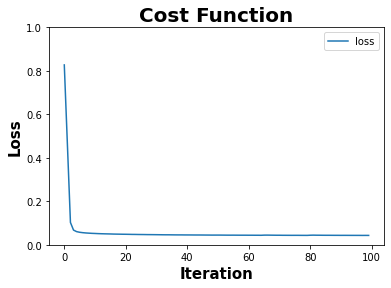

933/933 [==============================] - 1s 490us/step
TN, FP, FN, TP: 28429 3 226 1196
Accuracy = 0.9923293361023648
Precesion = 0.9974979149291076
Recall = 0.8410689170182841
F1 = 0.9126287676459367
F0.5 = 0.9617240270183338
F2 = 0.8683025990997533
Gmean = 0.9170497105963601
Balanced Accu. = 0.9204817010527548
################################################## 2th CV ##################################################


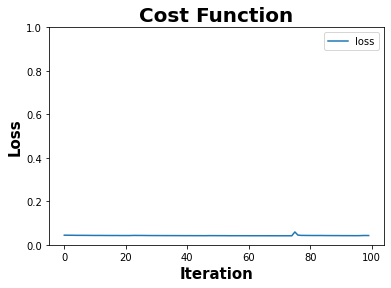

933/933 [==============================] - 0s 450us/step
TN, FP, FN, TP: 28424 8 230 1191
Accuracy = 0.9920276019160553
Precesion = 0.9933277731442869
Recall = 0.8381421534130894
F1 = 0.9091603053435114
F0.5 = 0.9578574875341804
F2 = 0.8651750690106059
Gmean = 0.9153722318032865
Balanced Accu. = 0.918930390156179
################################################## 3th CV ##################################################


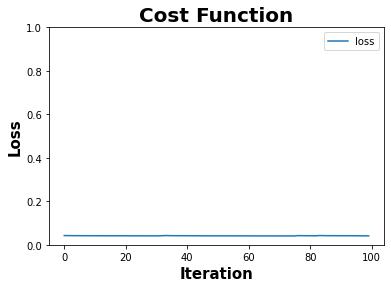

933/933 [==============================] - 0s 441us/step
TN, FP, FN, TP: 28422 10 228 1193
Accuracy = 0.9920276019160553
Precesion = 0.9916874480465503
Recall = 0.8395496129486277
F1 = 0.9092987804878049
F0.5 = 0.9570030482913525
F2 = 0.8661245825468273
Gmean = 0.916108252119454
Balanced Accu. = 0.9195989482863567
################################################## 4th CV ##################################################


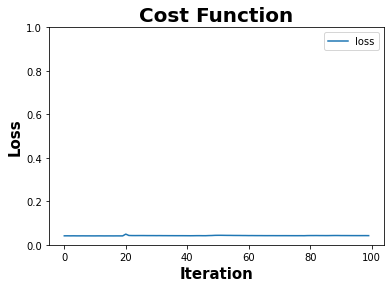

933/933 [==============================] - 0s 453us/step
TN, FP, FN, TP: 28425 7 240 1181
Accuracy = 0.9917261246775868
Precesion = 0.9941077441077442
Recall = 0.8311048557353976
F1 = 0.9053277117669605
F0.5 = 0.9565851287866516
F2 = 0.8592840512223515
Gmean = 0.9115372929858069
Balanced Accu. = 0.9154293271361287
################################################## 5th CV ##################################################


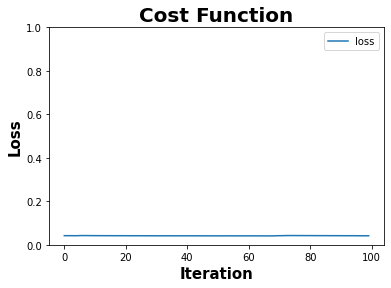

933/933 [==============================] - 1s 490us/step
TN, FP, FN, TP: 28423 9 242 1179
Accuracy = 0.991592134793823
Precesion = 0.9924242424242424
Recall = 0.8296973961998593
F1 = 0.9037945573016481
F0.5 = 0.9549651709055563
F2 = 0.8578288707799767
Gmean = 0.910733089249914
Balanced Accu. = 0.9146904257307682
################################################## 6th CV ##################################################


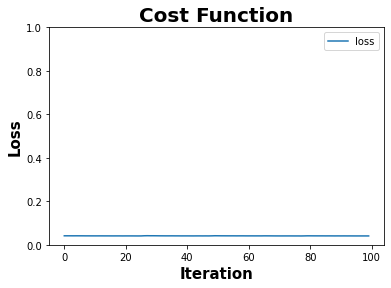

933/933 [==============================] - 0s 465us/step
TN, FP, FN, TP: 28418 13 221 1201
Accuracy = 0.9921615917998191
Precesion = 0.9892915980230642
Recall = 0.8445850914205345
F1 = 0.9112291350531108
F0.5 = 0.9565148136349155
F2 = 0.87003767024051
Gmean = 0.9188029751301648
Balanced Accu. = 0.9220639220248534
################################################## 7th CV ##################################################


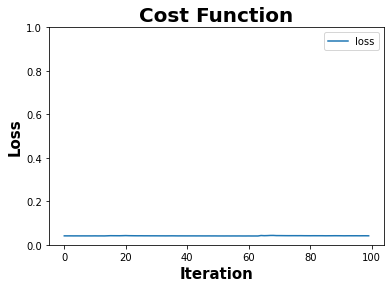

933/933 [==============================] - 0s 449us/step
TN, FP, FN, TP: 28423 8 222 1200
Accuracy = 0.9922955816835829
Precesion = 0.9933774834437086
Recall = 0.8438818565400844
F1 = 0.9125475285171103
F0.5 = 0.9593859929645026
F2 = 0.8700696055684456
Gmean = 0.9185011717650731
Balanced Accu. = 0.921800236771326
################################################## 8th CV ##################################################


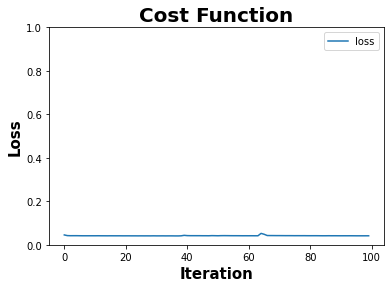

933/933 [==============================] - 0s 443us/step
TN, FP, FN, TP: 28418 13 217 1205
Accuracy = 0.9922955816835829
Precesion = 0.9893267651888341
Recall = 0.8473980309423348
F1 = 0.9128787878787878
F0.5 = 0.9572608833809977
F2 = 0.8724297712134377
Gmean = 0.9203317664954535
Balanced Accu. = 0.9234703917857536
################################################## 9th CV ##################################################


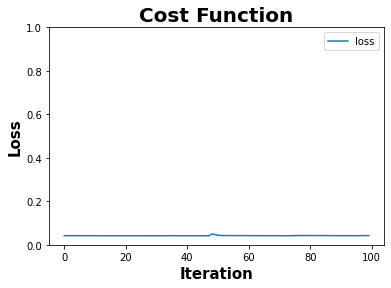

933/933 [==============================] - 0s 473us/step
TN, FP, FN, TP: 28427 4 211 1211
Accuracy = 0.9927980437476971
Precesion = 0.9967078189300411
Recall = 0.8516174402250352
F1 = 0.9184679560106181
F0.5 = 0.963865011142948
F2 = 0.8771548602057078
Gmean = 0.9227662894205862
Balanced Accu. = 0.9257383743631595
################################################## 10th CV ##################################################


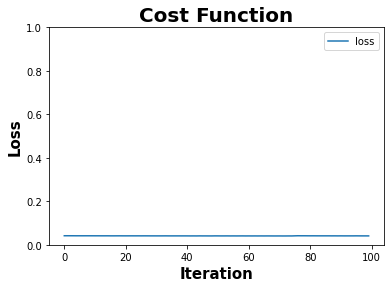

933/933 [==============================] - 0s 455us/step
TN, FP, FN, TP: 28425 6 224 1198
Accuracy = 0.9922955816835829
Precesion = 0.9950166112956811
Recall = 0.8424753867791842
F1 = 0.9124143183549124
F0.5 = 0.9602436678422572
F2 = 0.8691236215902495
Gmean = 0.9177677228427615
Balanced Accu. = 0.921132174765555


In [92]:
f05_acc = []
f05_f1 = []
f05_f5 = []
f05_f2 = []
f05_gmean = []
f05_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // F0.5) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)   # 
print('batch_size: ', batch_size)
learning_rate=0.003

beta = 0.5
model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(df_card, df_card.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=Ours_Fbeta, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    f05_acc.append((TP+TN)/(TP+TN+FP+FN))
    f05_f1.append(TP / (TP + 0.5*(FP+FN)))
    f05_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f05_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f05_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f05_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [93]:
res['F.5Aim'] = [np.mean(f05_acc), np.mean(f05_f1), np.mean(f05_f5), np.mean(f05_f2), np.mean(f05_gmean), np.mean(f05_bacc)]
res

Delta       BCE    AccAim     F1Aim    F.5Aim  F2Aim  GAim  BAim
Acc    0.990567  0.993532  0.993997  0.994825  0.992155      0     0     0
F1     0.888571  0.928710  0.933364  0.943396  0.910775      0     0     0
F.5    0.946964  0.956873  0.963231  0.967040  0.958541      0     0     0
F2     0.838417  0.902217  0.905638  0.920940  0.867553      0     0     0
Gmean  0.897839  0.940434  0.941921  0.951753  0.916897      0     0     0
B_Acc  0.904099  0.942173  0.943752  0.952910  0.920334      0     0     0

batch_size:  13433
################################################## 1th CV ##################################################


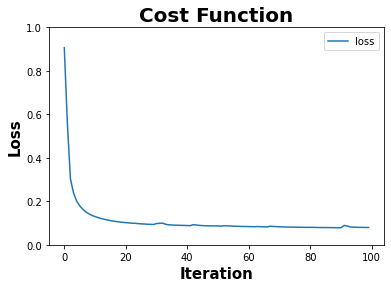

933/933 [==============================] - 0s 475us/step
TN, FP, FN, TP: 28382 50 122 1300
Accuracy = 0.9942386279895491
Precesion = 0.9629629629629629
Recall = 0.9142053445850914
F1 = 0.937950937950938
F0.5 = 0.952799765464673
F2 = 0.923557828928673
Gmean = 0.9552997642792004
Balanced Accu. = 0.9562233813527595
################################################## 2th CV ##################################################


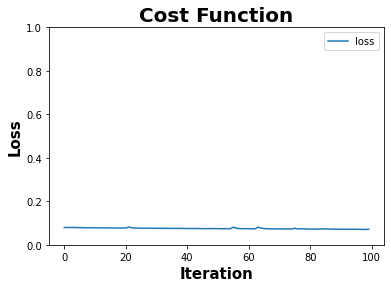

933/933 [==============================] - 0s 465us/step
TN, FP, FN, TP: 28392 40 114 1307
Accuracy = 0.9948413894750946
Precesion = 0.9703043801039347
Recall = 0.9197748064743139
F1 = 0.944364161849711
F0.5 = 0.9597591423116464
F2 = 0.929455269520694
Gmean = 0.958374043381785
Balanced Accu. = 0.959183970485328
################################################## 3th CV ##################################################


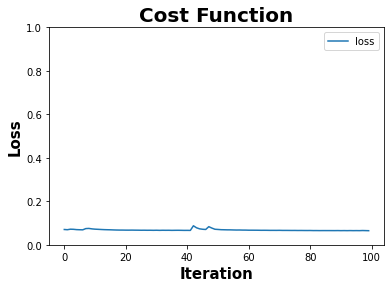

933/933 [==============================] - 0s 451us/step
TN, FP, FN, TP: 28383 49 125 1296
Accuracy = 0.9941714400562758
Precesion = 0.9635687732342008
Recall = 0.912033779028853
F1 = 0.9370932754880694
F0.5 = 0.9528010586678429
F2 = 0.9218950064020487
Gmean = 0.9541813091195206
Balanced Accu. = 0.955155184393436
################################################## 4th CV ##################################################


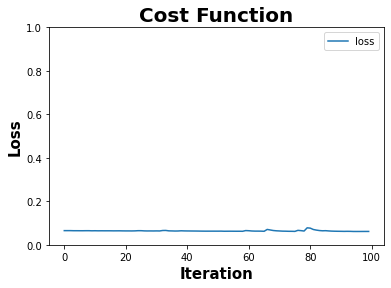

933/933 [==============================] - 0s 451us/step
TN, FP, FN, TP: 28368 64 110 1311
Accuracy = 0.9941714400562758
Precesion = 0.9534545454545454
Recall = 0.9225897255453905
F1 = 0.9377682403433476
F0.5 = 0.9471174685739054
F2 = 0.9286017849553762
Gmean = 0.959433681966165
Balanced Accu. = 0.960169370369769
################################################## 5th CV ##################################################


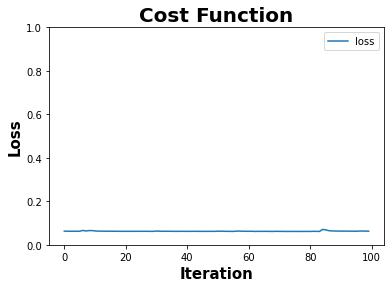

933/933 [==============================] - 0s 466us/step
TN, FP, FN, TP: 28346 86 78 1343
Accuracy = 0.9945064147656852
Precesion = 0.9398180545836249
Recall = 0.9451090781140042
F1 = 0.9424561403508772
F0.5 = 0.9408715146420066
F2 = 0.9440461127513003
Gmean = 0.9706958067240944
Balanced Accu. = 0.97104215864057
################################################## 6th CV ##################################################


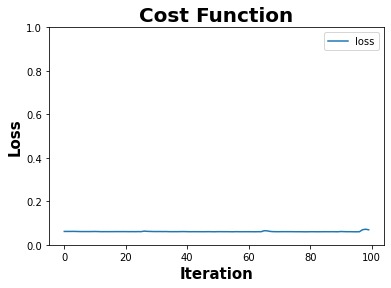

933/933 [==============================] - 0s 451us/step
TN, FP, FN, TP: 28359 72 109 1313
Accuracy = 0.9939369577596892
Precesion = 0.948014440433213
Recall = 0.9233473980309423
F1 = 0.9355183469896687
F0.5 = 0.942976156276932
F2 = 0.9281775767001271
Gmean = 0.9596921744518804
Balanced Accu. = 0.9604074755270255
################################################## 7th CV ##################################################


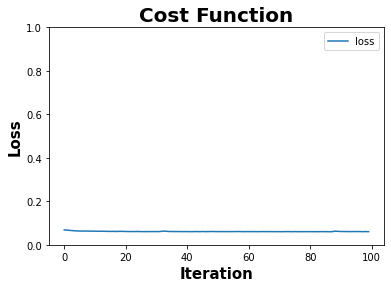

933/933 [==============================] - 0s 446us/step
TN, FP, FN, TP: 28347 84 75 1347
Accuracy = 0.9946739021203899
Precesion = 0.9412997903563941
Recall = 0.9472573839662447
F1 = 0.9442691903259727
F0.5 = 0.9424853064651553
F2 = 0.9460598398651496
Gmean = 0.971832645924606
Balanced Accu. = 0.9721514312466024
################################################## 8th CV ##################################################


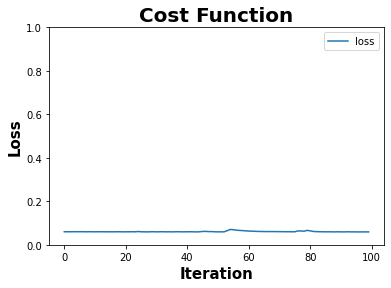

933/933 [==============================] - 0s 473us/step
TN, FP, FN, TP: 28342 89 84 1338
Accuracy = 0.9942049375272167
Precesion = 0.9376313945339874
Recall = 0.9409282700421941
F1 = 0.9392769392769392
F0.5 = 0.938288920056101
F2 = 0.9402670414617006
Gmean = 0.9684951220853636
Balanced Accu. = 0.9688989420978795
################################################## 9th CV ##################################################


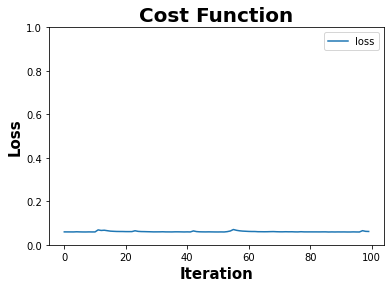

933/933 [==============================] - 0s 448us/step
TN, FP, FN, TP: 28358 73 90 1332
Accuracy = 0.9945399122366262
Precesion = 0.9480427046263346
Recall = 0.9367088607594937
F1 = 0.9423417049876194
F0.5 = 0.9457540471456972
F2 = 0.9389538982095024
Gmean = 0.9665938901593915
Balanced Accu. = 0.9670706204539616
################################################## 10th CV ##################################################


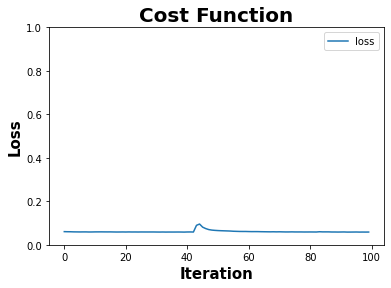

933/933 [==============================] - 0s 433us/step
TN, FP, FN, TP: 28358 73 94 1328
Accuracy = 0.9944059223528624
Precesion = 0.9478943611705924
Recall = 0.9338959212376934
F1 = 0.940843074743181
F0.5 = 0.9450612012524907
F2 = 0.9366624347580759
Gmean = 0.9651414567466381
Balanced Accu. = 0.9656641506930614


In [94]:
f2_acc = []
f2_f1 = []
f2_f5 = []
f2_f2 = []
f2_gmean = []
f2_bacc = []

n_iter=0
    
###################### MLP (sigmoid // sigmoid // F2) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)   # 
print('batch_size: ', batch_size)
learning_rate=0.003

beta = 2
model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)
    
for train_index, test_index in skf.split(df_card, df_card.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=Ours_Fbeta, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    f2_acc.append((TP+TN)/(TP+TN+FP+FN))
    f2_f1.append(TP / (TP + 0.5*(FP+FN)))
    f2_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f2_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f2_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f2_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [95]:
res['F2Aim'] = [np.mean(f2_acc), np.mean(f2_f1), np.mean(f2_f5), np.mean(f2_f2), np.mean(f2_gmean), np.mean(f2_bacc)]
res

Delta       BCE    AccAim     F1Aim    F.5Aim     F2Aim  GAim  BAim
Acc    0.990567  0.993532  0.993997  0.994825  0.992155  0.994369     0     0
F1     0.888571  0.928710  0.933364  0.943396  0.910775  0.940188     0     0
F.5    0.946964  0.956873  0.963231  0.967040  0.958541  0.946791     0     0
F2     0.838417  0.902217  0.905638  0.920940  0.867553  0.933768     0     0
Gmean  0.897839  0.940434  0.941921  0.951753  0.916897  0.962974     0     0
B_Acc  0.904099  0.942173  0.943752  0.952910  0.920334  0.963597     0     0

batch_size:  134339
################################################## 1th CV ##################################################


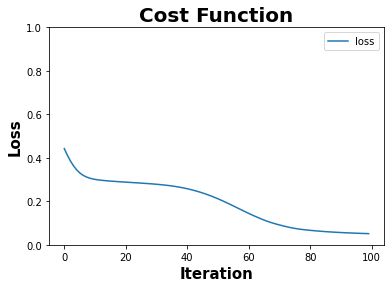

933/933 [==============================] - 0s 460us/step
TN, FP, FN, TP: 28081 351 131 1291
Accuracy = 0.9838547598311784
Precesion = 0.7862362971985384
Recall = 0.9078762306610408
F1 = 0.8426892950391645
F0.5 = 0.8078848560700876
F2 = 0.8806275579809004
Gmean = 0.9469256973756356
Balanced Accu. = 0.9477654929332215
################################################## 2th CV ##################################################


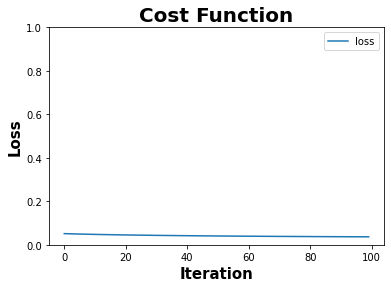

933/933 [==============================] - 0s 461us/step
TN, FP, FN, TP: 27408 1024 61 1360
Accuracy = 0.9636552440290758
Precesion = 0.5704697986577181
Recall = 0.9570724841660803
F1 = 0.7148488830486203
F0.5 = 0.6206078306105687
F2 = 0.842835894893406
Gmean = 0.9605221466716745
Balanced Accu. = 0.9605283636362196
################################################## 3th CV ##################################################


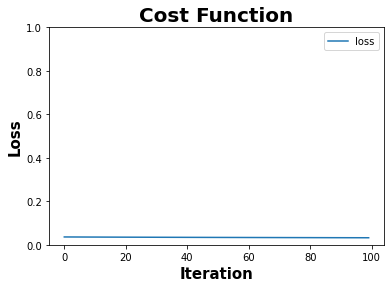

933/933 [==============================] - 0s 462us/step
TN, FP, FN, TP: 27391 1041 71 1350
Accuracy = 0.9627508123136703
Precesion = 0.5646173149309912
Recall = 0.9500351864883885
F1 = 0.7082896117523609
F0.5 = 0.6144742831133364
F2 = 0.8359133126934984
Gmean = 0.9566874657826802
Balanced Accu. = 0.9567107558778465
################################################## 4th CV ##################################################


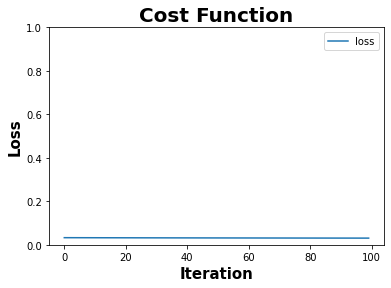

933/933 [==============================] - 0s 462us/step
TN, FP, FN, TP: 27569 863 64 1357
Accuracy = 0.968947844437745
Precesion = 0.6112612612612612
Recall = 0.9549612948627727
F1 = 0.7453996154902499
F0.5 = 0.6586739151538684
F2 = 0.8584261133603239
Gmean = 0.9622760710882395
Balanced Accu. = 0.9623040858106773
################################################## 5th CV ##################################################


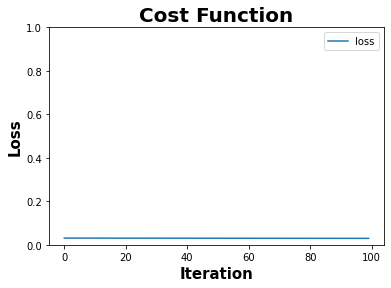

933/933 [==============================] - 0s 459us/step
TN, FP, FN, TP: 27706 726 61 1360
Accuracy = 0.9736374903694771
Precesion = 0.6519654841802492
Recall = 0.9570724841660803
F1 = 0.7755916737952666
F0.5 = 0.6963645673323092
F2 = 0.8751608751608752
Gmean = 0.9657297823937027
Balanced Accu. = 0.9657689376373451
################################################## 6th CV ##################################################


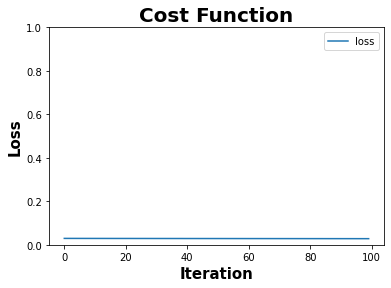

933/933 [==============================] - 0s 461us/step
TN, FP, FN, TP: 27857 574 73 1349
Accuracy = 0.9783271363012093
Precesion = 0.7015080603224129
Recall = 0.9486638537271449
F1 = 0.806576980568012
F0.5 = 0.740070221637042
F2 = 0.8862173170411246
Gmean = 0.9641115396722334
Balanced Accu. = 0.9642373118306858
################################################## 7th CV ##################################################


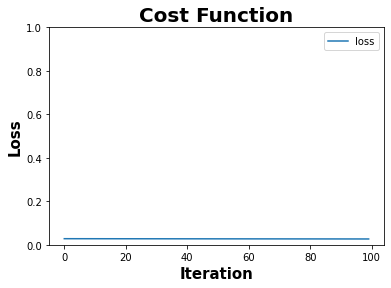

933/933 [==============================] - 0s 455us/step
TN, FP, FN, TP: 27989 442 80 1342
Accuracy = 0.9825143201688272
Precesion = 0.7522421524663677
Recall = 0.9437412095639943
F1 = 0.8371802869619464
F0.5 = 0.7840616966580978
F2 = 0.8980192719486081
Gmean = 0.9638824727176497
Balanced Accu. = 0.9640973994779276
################################################## 8th CV ##################################################


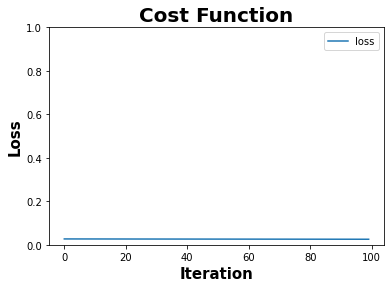

933/933 [==============================] - 0s 468us/step
TN, FP, FN, TP: 28056 375 76 1346
Accuracy = 0.9848926406056343
Precesion = 0.7821034282393957
Recall = 0.9465541490857946
F1 = 0.8565065224307986
F0.5 = 0.8102576450758487
F2 = 0.9083547037386962
Gmean = 0.9664725876414043
Balanced Accu. = 0.9666821605405759
################################################## 9th CV ##################################################


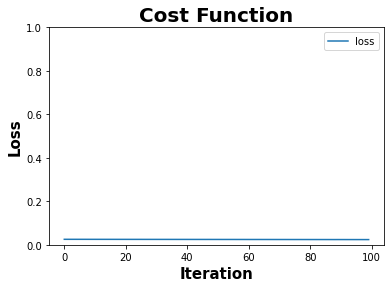

933/933 [==============================] - 0s 439us/step
TN, FP, FN, TP: 28172 259 113 1309
Accuracy = 0.9875389408099688
Precesion = 0.8348214285714286
Recall = 0.9205344585091421
F1 = 0.8755852842809364
F0.5 = 0.8506628541720822
F2 = 0.9020121278941565
Gmean = 0.9550647083491769
Balanced Accu. = 0.9557123419836344
################################################## 10th CV ##################################################


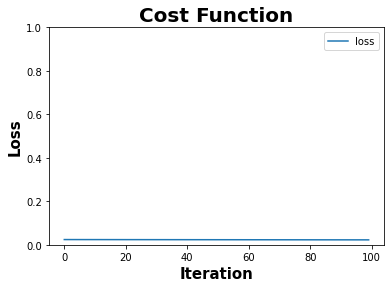

933/933 [==============================] - 0s 452us/step
TN, FP, FN, TP: 28177 254 102 1320
Accuracy = 0.988074900345024
Precesion = 0.8386277001270648
Recall = 0.9282700421940928
F1 = 0.8811748998664887
F0.5 = 0.8551438196423943
F2 = 0.9088405397961995
Gmean = 0.959154294691444
Balanced Accu. = 0.9596680660128074


In [96]:
gmean_acc = []
gmean_f1 = []
gmean_f5 = []
gmean_f2 = []
gmean_gmean = []
gmean_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // Gmean) ############################## 
batch_size = int(np.ceil(X.shape[0]*0.9 * 0.5))  #3402 #int(X.shape[0]*0.9 * 1)   # 
print('batch_size: ', batch_size)
learning_rate=0.003

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(df_card, df_card.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
        
    model.compile(loss=Ours_Gmean, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    gmean_acc.append((TP+TN)/(TP+TN+FP+FN))
    gmean_f1.append(TP / (TP + 0.5*(FP+FN)))
    gmean_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    gmean_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    gmean_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    gmean_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [97]:
res['GAim'] = [np.mean(gmean_acc), np.mean(gmean_f1), np.mean(gmean_f5), np.mean(gmean_f2), np.mean(gmean_gmean), np.mean(gmean_bacc)]
res

Delta       BCE    AccAim     F1Aim    F.5Aim     F2Aim      GAim  \
Acc    0.990567  0.993532  0.993997  0.994825  0.992155  0.994369  0.977419   
F1     0.888571  0.928710  0.933364  0.943396  0.910775  0.940188  0.804384   
F.5    0.946964  0.956873  0.963231  0.967040  0.958541  0.946791  0.743820   
F2     0.838417  0.902217  0.905638  0.920940  0.867553  0.933768  0.879641   
Gmean  0.897839  0.940434  0.941921  0.951753  0.916897  0.962974  0.960083   
B_Acc  0.904099  0.942173  0.943752  0.952910  0.920334  0.963597  0.960347   

       BAim  
Acc       0  
F1        0  
F.5       0  
F2        0  
Gmean     0  
B_Acc     0

batch_size:  134338
################################################## 1th CV ##################################################


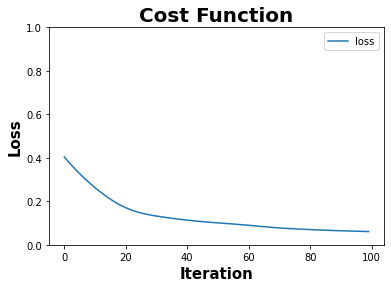

933/933 [==============================] - 0s 456us/step
TN, FP, FN, TP: 28379 53 209 1213
Accuracy = 0.9912239565887319
Precesion = 0.9581358609794629
Recall = 0.8530239099859352
F1 = 0.9025297619047619
F0.5 = 0.93509096515572
F2 = 0.8721599079666379
Gmean = 0.9227317003612348
Balanced Accu. = 0.9255799065967942
################################################## 2th CV ##################################################


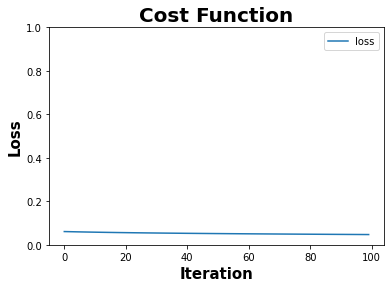

933/933 [==============================] - 0s 468us/step
TN, FP, FN, TP: 28274 158 124 1297
Accuracy = 0.9905537131946538
Precesion = 0.8914089347079038
Recall = 0.9127375087966221
F1 = 0.9019471488178025
F0.5 = 0.8955945311421074
F2 = 0.9083905308866789
Gmean = 0.9527147097018555
Balanced Accu. = 0.9535901950285868
################################################## 3th CV ##################################################


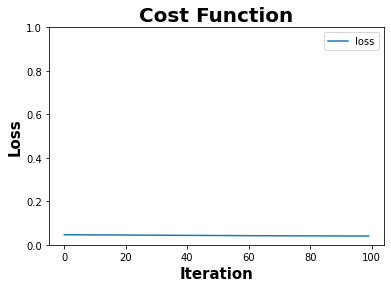

933/933 [==============================] - 0s 453us/step
TN, FP, FN, TP: 28182 250 110 1311
Accuracy = 0.9879409104612602
Precesion = 0.8398462524023063
Recall = 0.9225897255453905
F1 = 0.8792756539235412
F0.5 = 0.8551859099804305
F2 = 0.9047619047619048
Gmean = 0.9562831576877593
Balanced Accu. = 0.9568984080737645
################################################## 4th CV ##################################################


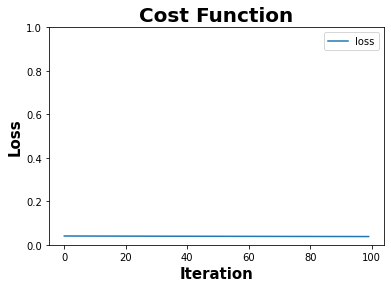

933/933 [==============================] - 1s 454us/step
TN, FP, FN, TP: 28217 215 109 1312
Accuracy = 0.9891468194151342
Precesion = 0.8592010478061559
Recall = 0.9232934553131598
F1 = 0.8900949796472184
F0.5 = 0.8712976490901847
F2 = 0.9097212591873526
Gmean = 0.9572416625967455
Balanced Accu. = 0.9578657766154994
################################################## 5th CV ##################################################


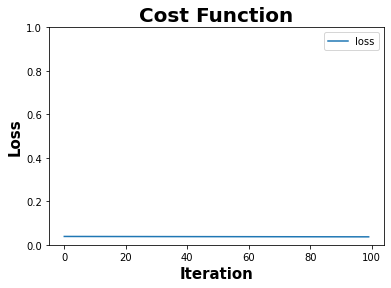

933/933 [==============================] - 1s 507us/step
TN, FP, FN, TP: 28227 205 99 1322
Accuracy = 0.9898167688339531
Precesion = 0.8657498362802881
Recall = 0.9303307529908516
F1 = 0.8968792401628223
F0.5 = 0.8779386372692257
F2 = 0.9166551102482319
Gmean = 0.961053013882978
Balanced Accu. = 0.9615602836423025
################################################## 6th CV ##################################################


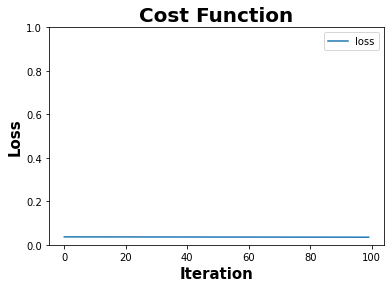

933/933 [==============================] - 1s 469us/step
TN, FP, FN, TP: 28234 197 93 1329
Accuracy = 0.9902857334271262
Precesion = 0.8709043250327654
Recall = 0.9345991561181435
F1 = 0.9016282225237449
F0.5 = 0.882939144299761
F2 = 0.9211255891322427
Gmean = 0.9633915434217107
Balanced Accu. = 0.9638350499031856
################################################## 7th CV ##################################################


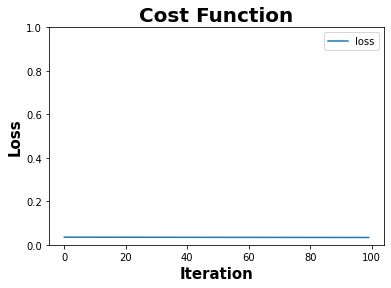

933/933 [==============================] - 0s 440us/step
TN, FP, FN, TP: 28245 186 84 1338
Accuracy = 0.9909556828459452
Precesion = 0.8779527559055118
Recall = 0.9409282700421941
F1 = 0.9083503054989817
F0.5 = 0.8898643256185156
F2 = 0.9276206322795341
Gmean = 0.9668363727886425
Balanced Accu. = 0.9671930576759457
################################################## 8th CV ##################################################


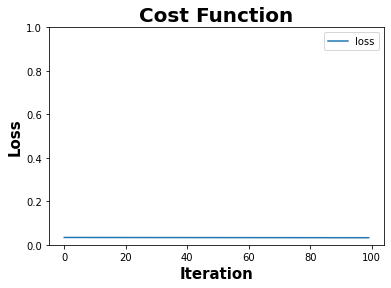

933/933 [==============================] - 0s 455us/step
TN, FP, FN, TP: 28269 162 90 1332
Accuracy = 0.9915586373228821
Precesion = 0.891566265060241
Recall = 0.9367088607594937
F1 = 0.9135802469135802
F0.5 = 0.9002433090024331
F2 = 0.9273182957393483
Gmean = 0.9650758977062445
Balanced Accu. = 0.965505427530744
################################################## 9th CV ##################################################


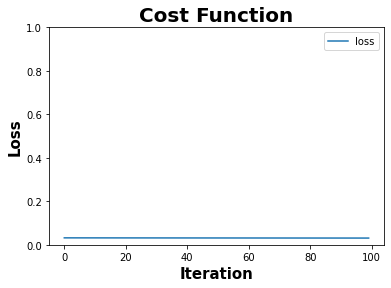

933/933 [==============================] - 0s 484us/step
TN, FP, FN, TP: 28324 107 108 1314
Accuracy = 0.9927980437476971
Precesion = 0.9247009148486981
Recall = 0.9240506329113924
F1 = 0.9243756595145972
F0.5 = 0.9245707852519
F2 = 0.9241806161204106
Gmean = 0.9594649397350506
Balanced Accu. = 0.9601435676603671
################################################## 10th CV ##################################################


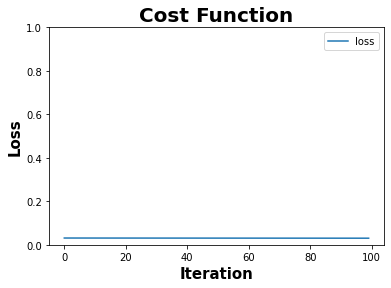

933/933 [==============================] - 0s 472us/step
TN, FP, FN, TP: 28345 86 119 1303
Accuracy = 0.9931330184571064
Precesion = 0.9380849532037437
Recall = 0.9163150492264416
F1 = 0.9270722162931341
F0.5 = 0.9336486099168817
F2 = 0.9205878196976119
Gmean = 0.9557946002508313
Balanced Accu. = 0.9566450910020217


In [98]:
bacc_acc = []
bacc_f1 = []
bacc_f5 = []
bacc_f2 = []
bacc_gmean = []
bacc_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // Balanced Accuracy) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.5)   # 
print('batch_size: ', batch_size)
learning_rate=0.005

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(df_card, df_card.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
     
    model.compile(loss=Ours_BAccu, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=X_train.shape[0])
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    bacc_acc.append((TP+TN)/(TP+TN+FP+FN))
    bacc_f1.append(TP / (TP + 0.5*(FP+FN)))
    bacc_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bacc_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bacc_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bacc_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [99]:
res['BAim'] = [np.mean(bacc_acc), np.mean(bacc_f1), np.mean(bacc_f5), np.mean(bacc_f2), np.mean(bacc_gmean), np.mean(bacc_bacc)]
res

Delta       BCE    AccAim     F1Aim    F.5Aim     F2Aim      GAim  \
Acc    0.990567  0.993532  0.993997  0.994825  0.992155  0.994369  0.977419   
F1     0.888571  0.928710  0.933364  0.943396  0.910775  0.940188  0.804384   
F.5    0.946964  0.956873  0.963231  0.967040  0.958541  0.946791  0.743820   
F2     0.838417  0.902217  0.905638  0.920940  0.867553  0.933768  0.879641   
Gmean  0.897839  0.940434  0.941921  0.951753  0.916897  0.962974  0.960083   
B_Acc  0.904099  0.942173  0.943752  0.952910  0.920334  0.963597  0.960347   

           BAim  
Acc    0.990741  
F1     0.904573  
F.5    0.896637  
F2     0.913252  
Gmean  0.956059  
B_Acc  0.956882

# 3. Breast Cancer Data (30d / 569)

In [171]:
# class 'B' = Benign, class 'M' = Malignant
cancer_df = pd.read_csv('breast_cancer.csv')
cancer_df.shape

(569, 32)

In [172]:
cancer_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [173]:
cancer_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [174]:
cancer_df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [175]:
# M/Malignant = 0, B/Benign = 1
y_encoded, y_class = pd.factorize(cancer_df['diagnosis'])
print(y_class)
y_encoded

Index(['M', 'B'], dtype='object')


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [176]:
# But I want [B/Benign = 0(Major), M/Malignant = 1(minor)]
y_encoded = (y_encoded+1)%2
y_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [177]:
cancer_df['label'] = y_encoded
cancer_df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  label  
0                    0.11890      1  
1                    0.08902      1  
2                    0.08758      1  
3                    0.17300      1  
4                    0.07678      1  

In [178]:
cancer_df = cancer_df.drop('id', axis=1)
cancer_df = cancer_df.drop('diagnosis', axis=1)
cancer_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  label  
0                  0.2654          0.4601                  0.11890      1  
1                  0.1860          0.2750                  0.08902      1  
2                  0.2430          0.3613                  0.08758      1  
3                  0.2575          0.6638                  0.17300      1  
4                  0.1625          0.2364                  0.07678   

In [179]:
# Amount values largely varies.

# # Normalization
# card_df.iloc[:,:-1] = (card_df.iloc[:,:-1] - card_df.iloc[:,:-1].min())/(card_df.iloc[:,:-1].max() - card_df.iloc[:,:-1].min())

# Standardization
cancer_df.iloc[:,:-1] = (cancer_df.iloc[:,:-1] - cancer_df.iloc[:,:-1].mean())/cancer_df.iloc[:,:-1].std()

cancer_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.096100     -2.071512        1.268817   0.983510         1.567087   
1       1.828212     -0.353322        1.684473   1.907030        -0.826235   
2       1.578499      0.455786        1.565126   1.557513         0.941382   
3      -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4       1.748758     -1.150804        1.775011   1.824624         0.280125   
..           ...           ...             ...        ...              ...   
564     2.109139      0.720838        2.058974   2.341795         1.040926   
565     1.703356      2.083301        1.614511   1.722326         0.102368   
566     0.701667      2.043775        0.672084   0.577445        -0.839745   
567     1.836725      2.334403        1.980781   1.733693         1.524426   
568    -1.806811      1.220718       -1.812793  -1.346604        -3.109349   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            3.280628        2.650542             2.530249       2.215566   
1           -0.486643       -0.023825             0.547662       0.001391   
2            1.052000        1.362280             2.035440       0.938859   
3            3.399917        1.914213             1.450431       2.864862   
4            0.538866        1.369806             1.427237      -0.009552   
..                ...             ...                  ...            ...   
564          0.218868        1.945573             2.318924      -0.312314   
565         -0.017817        0.692434             1.262558      -0.217473   
566         -0.038646        0.046547             0.105684      -0.808406   
567          3.269267        3.294046             2.656528       2.135315   
568         -1.149741       -1.113893            -1.260710      -0.819349   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                  2.253764  ...      -1.358098         2.301575    1.999478   
1                 -0.867889  ...      -0.368879         1.533776    1.888827   
2                 -0.397658  ...      -0.023953         1.346291    1.455004   
3                  4.906602  ...       0.133866        -0.249720   -0.549538   
4                 -0.561956  ...      -1.465481         1.337363    1.219651   
..                      ...  ...            ...              ...         ...   
564               -0.930209  ...       0.117596         1.751022    2.013529   
565               -1.057681  ...       2.045599         1.420690    1.493644   
566               -0.894800  ...       1.373645         0.578492    0.427529   
567                1.042778  ...       2.235958         2.301575    1.651717   
568               -0.560539  ...       0.763518        -1.431475   -1.074867   

     smoothness_worst  compactness_worst  concavity_worst  \
0            1.306537           2.614365         2.107672   
1           -0.375282          -0.430066        -0.146620   
2            0.526944           1.081980         0.854222   
3            3.391291           3.889975         1.987839   
4            0.220362          -0.313119         0.612640   
..                ...                ...              ...   
564          0.378033          -0.273077         0.663928   
565         -0.690623          -0.394473         0.236365   
566         -0.808876           0.350427         0.326479   
567          1.429169           3.901415         3.194794   
568         -1.857384          -1.206491        -1.304683   

     concave points_worst  symmetry_worst  fractal_dimension_worst  label  
0                2.294058        2.748204                 1.935312      1  
1                1.086129       -0.243675                 0.280943      1  
2                1.953282        1.151242                 0.201214      1  
3                2.173873        6.040726                 4.930672      1  
4                0.728618       -0.867590                -0.396751   

In [180]:
cancer_df['label'].value_counts()

0    357
1    212
Name: label, dtype: int64

In [181]:
# Data is too balanced!!! We intentionally make it imbalanced.
df_0 = cancer_df[cancer_df['label']==0]
df_1 = cancer_df[cancer_df['label']==1]
print(len(df_0), len(df_1))

357 212


In [182]:
N = round(len(df_0)*0.1)
df_1_samp = df_1.sample(n=N, random_state = 100)
df_1_samp

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
219     1.533097      3.064460        1.482818   1.614345        -0.864631   
45      1.283384     -0.392847        1.305856   1.196630         0.962713   
408     1.096100      0.318610        1.063047   0.957083         0.514765   
156     1.008133      0.337210        1.046586   0.877518         1.076478   
213     0.934354      1.457870        0.927239   0.832905         0.301456   
100    -0.146789      1.323019       -0.161284  -0.205133        -0.105252   
372     2.055224     -0.974102        2.030166   2.077526         0.265905   
212     3.967796     -0.190570        3.972634   5.240230         1.268455   
433     1.331624      0.623187        1.305856   1.293244         0.386780   
365     1.791323      0.579012        1.721511   1.813257        -0.345580   
323     1.762946      0.516236        1.807935   1.730851         1.467543   
186     1.186904     -0.164995        1.095971   1.097174        -0.745178   
99      0.083060      0.111683        0.103336  -0.035205         0.082459   
252     1.589850      0.123308        1.593934   1.566038         0.699632   
444     1.107450     -0.567223        1.050701   0.952252        -0.489919   
34      0.568298     -0.327746        0.618584   0.432807         0.543206   
57      0.165352      0.534837        0.147371   0.005714         1.232904   
280     1.428104      1.699672        1.408741   1.372809         0.401000   
129     1.606876      1.355569        1.581588   1.526256         0.365449   
118     0.468980      0.841739        0.565084   0.362904         1.360889   
201     0.968405      0.007057        0.951932   0.843134        -0.474987   
563     1.927530      1.348594        2.100128   1.966704         0.962713   
461     3.771999      1.622947        3.906788   5.245913         0.856059   
250     1.933205      0.992866        1.931396   2.015011         0.308567   
373     1.848075     -0.450972        1.762665   1.932605        -0.135115   
300     1.533097     -0.090594        1.544549   1.597296         1.325338   
272     2.163054      0.395335        2.277090   2.375895        -0.167112   
263     0.420740      0.021007        0.330506   0.294705        -1.277028   
11      0.468980     -0.325421        0.478661   0.358357         0.052596   
366     1.723219      1.753148        1.717396   1.645603         0.191247   
393     2.123327      0.695263        2.157743   2.137200         1.446213   
15      0.117112      1.918224        0.195933   0.011113         1.247125   
489     0.727206      0.211659        0.622700   0.576024        -1.520911   
451     1.550123      1.327669        1.470472   1.523414         0.486324   
223     0.460467      0.223284        0.437507   0.302377         0.436552   
379    -0.864713     -0.106869       -0.768305  -0.833411         1.794617   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
219          0.163957        0.322388             0.449731      -1.399339   
45           1.216733        1.362280             1.339615       0.347926   
408          0.493423        0.392634             1.013350       0.657983   
156          1.176970        1.213007             1.455585       0.581381   
213          0.194253        0.995997             0.439423      -1.837067   
100         -0.364135       -0.031978            -0.103836      -0.739099   
372          0.892947        1.309595             1.973589       0.588676   
212          0.894841        2.901420             2.849813      -0.596837   
433          0.654369        0.885610             0.992733       0.479244   
365          0.165850        0.115287             0.745586      -0.706269   
323          1.574601        2.103626             2.615294       2.762726   
186         -0.372277       -0.089179             0.237633      -0.695326   
99           0.184785        0.063732             0.244076       0.245789   
252          1.525370        1.917976   

In [183]:
cancer_df = concath(df_0, df_1_samp)
cancer_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
19     -0.166653     -1.146154       -0.185565  -0.251735         0.101657   
20     -0.297184     -0.832276       -0.260877  -0.383301         0.792066   
21     -1.311926     -1.592558       -1.301661  -1.082620         0.429441   
37     -0.311372     -0.202195       -0.385162  -0.372503        -0.464322   
46     -1.683090     -0.569549       -1.656820  -1.287215        -0.736646   
..           ...           ...             ...        ...              ...   
15      0.117112      1.918224        0.195933   0.011113         1.247125   
489     0.727206      0.211659        0.622700   0.576024        -1.520911   
451     1.550123      1.327669        1.470472   1.523414         0.486324   
223     0.460467      0.223284        0.437507   0.302377         0.436552   
379    -0.864713     -0.106869       -0.768305  -0.833411         1.794617   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
19          -0.436466       -0.277965            -0.028584       0.267676   
20           0.429044       -0.540886            -0.459223       0.566790   
21          -0.746429       -0.743094            -0.725698       0.012334   
37          -1.262592       -0.792517            -0.507415      -1.257077   
46          -0.850381       -0.914695            -1.108221      -0.155461   
..                ...             ...                  ...            ...   
15           1.044426        0.942058             0.637089       1.792428   
489         -0.629033       -0.656165            -0.666166       0.125414   
451         -0.106622        0.962128             1.074943      -0.542121   
223          0.304075        0.324896             0.404632       0.450062   
379          2.102882        1.004778             0.380149       1.402121   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
19                -0.727669  ...      -1.044086        -0.225019   -0.297499   
20                 0.752425  ...      -0.843964        -0.332451   -0.439238   
21                 0.885562  ...      -1.629809        -1.253810   -0.993547   
37                -0.590283  ...      -0.466499        -0.678556   -0.587827   
46                 0.316186  ...      -0.604795        -1.488019   -1.121235   
..                      ...  ...            ...              ...         ...   
15                 1.129176  ...       1.863374         0.501116    0.109978   
489               -1.352283  ...       0.143628         0.596347    0.357275   
451               -1.258804  ...       0.859511         0.968343    0.949171   
223                0.032915  ...       0.750502         0.554684    0.364300   
379                2.365656  ...       1.162134        -0.461311   -0.654217   

     smoothness_worst  compactness_worst  concavity_worst  \
19           0.509425          -0.489175        -0.159083   
20          -0.051181           0.148312        -0.398748   
21           0.001375          -0.886413        -0.879660   
37          -1.548613          -1.322484        -1.073022   
46          -0.116877          -0.753576        -0.974903   
..                ...                ...              ...   
15           1.551802           2.564154         2.063094   
489         -1.378241           0.239836        -0.117381   
451          0.894842          -0.443413         0.601615   
223          0.999955           1.231342         0.601136   
379          3.767948           4.345050         2.722653   

     concave points_worst  symmetry_worst  fractal_dimension_worst  label  
19               0.215933        0.123238                -0.628739      0  
20              -0.635551        0.457824                -0.117147      0  
21              -0.796202       -0.728583                -0.344152      0  
37              -0.980890       -1.476957                -1.232240      0  
46              -1.353462        0.330132                -0.545688   

In [184]:
cancer_df['label'].value_counts()

0    357
1     36
Name: label, dtype: int64

In [185]:
res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])

In [186]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)

X = cancer_df.iloc[:, :-1]
y = cancer_df.iloc[:, -1]

In [187]:
L = 73
hidden_node = 2
# momentum=0.9
activation = 'sigmoid'  
kernel_initializer=keras.initializers.he_normal(seed=100)
epochs=100
threshold = 0.5

batch_size:  17
################################################## 1th CV ##################################################


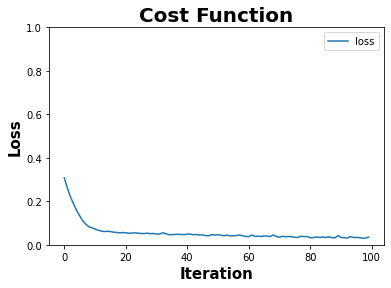

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 1 3
Accuracy = 0.975
Precesion = 1.0
Recall = 0.75
F1 = 0.8571428571428571
F0.5 = 0.9375
F2 = 0.7894736842105263
Gmean = 0.8660254037844386
Balanced Accu. = 0.875
################################################## 2th CV ##################################################


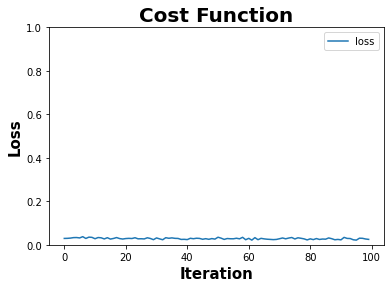

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 1 3
Accuracy = 0.975
Precesion = 1.0
Recall = 0.75
F1 = 0.8571428571428571
F0.5 = 0.9375
F2 = 0.7894736842105263
Gmean = 0.8660254037844386
Balanced Accu. = 0.875
################################################## 3th CV ##################################################


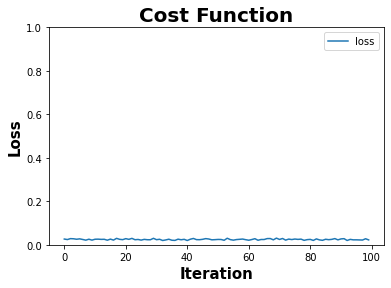

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 1 3
Accuracy = 0.975
Precesion = 1.0
Recall = 0.75
F1 = 0.8571428571428571
F0.5 = 0.9375
F2 = 0.7894736842105263
Gmean = 0.8660254037844386
Balanced Accu. = 0.875
################################################## 4th CV ##################################################


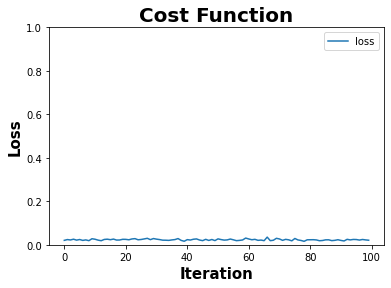

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 1 2
Accuracy = 0.9743589743589743
Precesion = 1.0
Recall = 0.6666666666666666
F1 = 0.8
F0.5 = 0.9090909090909091
F2 = 0.7142857142857143
Gmean = 0.816496580927726
Balanced Accu. = 0.8333333333333333
################################################## 5th CV ##################################################


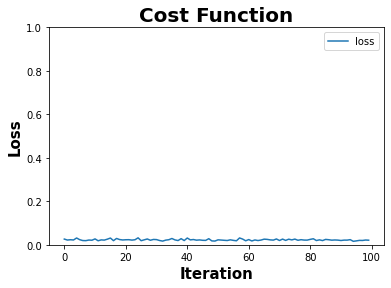

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 6th CV ##################################################


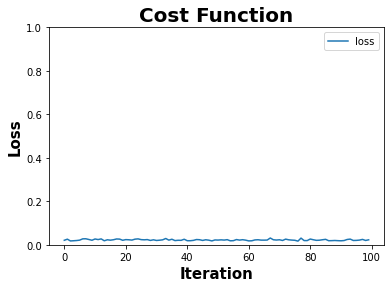

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 36 0 1 2
Accuracy = 0.9743589743589743
Precesion = 1.0
Recall = 0.6666666666666666
F1 = 0.8
F0.5 = 0.9090909090909091
F2 = 0.7142857142857143
Gmean = 0.816496580927726
Balanced Accu. = 0.8333333333333333
################################################## 7th CV ##################################################


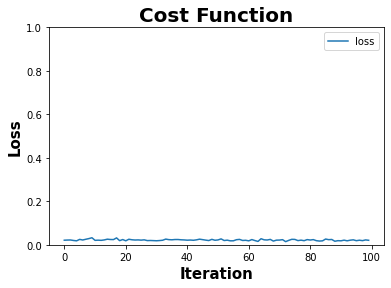

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 36 0 1 2
Accuracy = 0.9743589743589743
Precesion = 1.0
Recall = 0.6666666666666666
F1 = 0.8
F0.5 = 0.9090909090909091
F2 = 0.7142857142857143
Gmean = 0.816496580927726
Balanced Accu. = 0.8333333333333333
################################################## 8th CV ##################################################


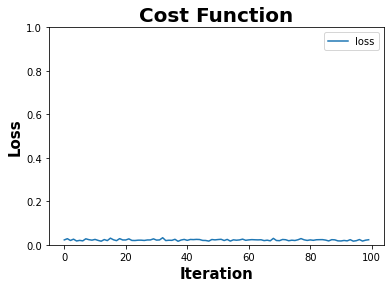

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 9th CV ##################################################


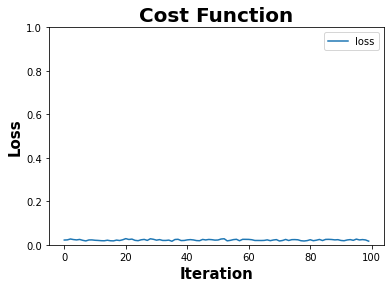

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 10th CV ##################################################


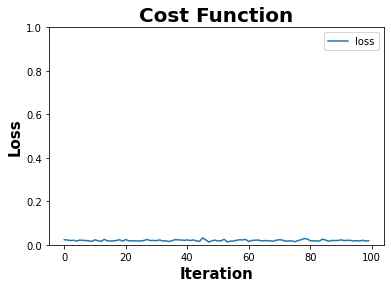

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 35 0 1 3
Accuracy = 0.9743589743589743
Precesion = 1.0
Recall = 0.75
F1 = 0.8571428571428571
F0.5 = 0.9375
F2 = 0.7894736842105263
Gmean = 0.8660254037844386
Balanced Accu. = 0.875


In [188]:
ada_acc = []
ada_f1 = []
ada_f5 = []
ada_f2 = []
ada_gmean = []
ada_bacc = []

n_iter=0

###################### MLP (sigmoid // MSE) ##############################
batch_size = int(X.shape[0]*0.9 * 0.05)  
print('batch_size: ', batch_size)
learning_rate = 0.001

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(cancer_df, cancer_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
        
    model.compile(loss=MSE, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()
    predicted = []
    result = model.predict(X_test)
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    ada_acc.append((TP+TN)/(TP+TN+FP+FN))
    ada_f1.append(TP / (TP + 0.5*(FP+FN)))
    ada_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    ada_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    ada_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    ada_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    

In [189]:
res['Delta'] = [np.mean(ada_acc), np.mean(ada_f1), np.mean(ada_f5), np.mean(ada_f2), np.mean(ada_gmean), np.mean(ada_bacc)]
res

Delta  BCE  AccAim  F1Aim  F.5Aim  F2Aim  GAim  BAim
Acc    0.982244    0       0      0       0      0     0     0
F1     0.882857    0       0      0       0      0     0     0
F.5    0.947727    0       0      0       0      0     0     0
F2     0.830075    0       0      0       0      0     0     0
Gmean  0.891359    0       0      0       0      0     0     0
B_Acc  0.900000    0       0      0       0      0     0     0

batch_size:  17
################################################## 1th CV ##################################################


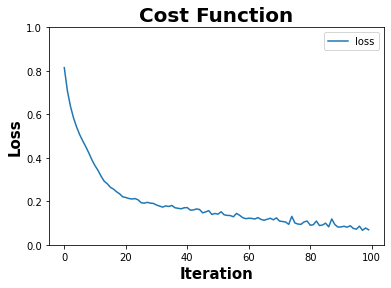

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 2th CV ##################################################


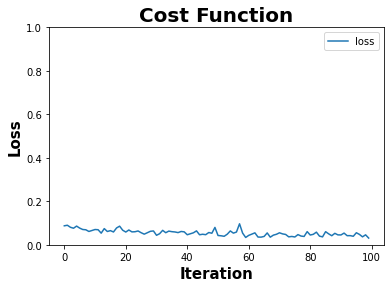

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 3th CV ##################################################


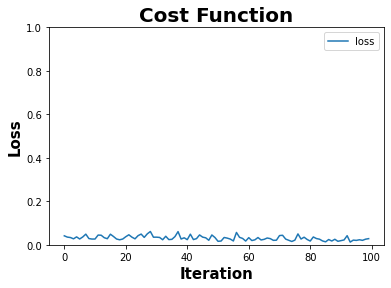

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 4th CV ##################################################


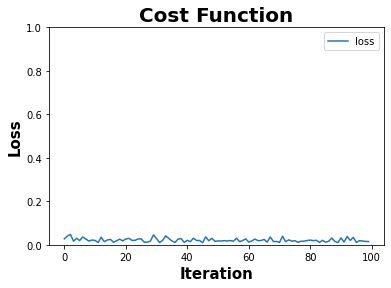

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 5th CV ##################################################


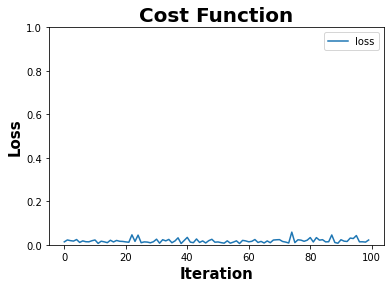

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 6th CV ##################################################


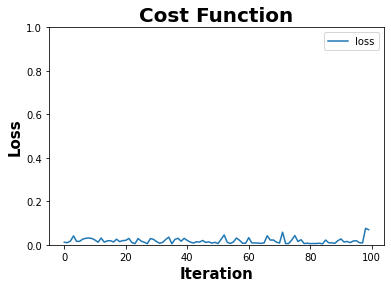

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 36 0 1 2
Accuracy = 0.9743589743589743
Precesion = 1.0
Recall = 0.6666666666666666
F1 = 0.8
F0.5 = 0.9090909090909091
F2 = 0.7142857142857143
Gmean = 0.816496580927726
Balanced Accu. = 0.8333333333333333
################################################## 7th CV ##################################################


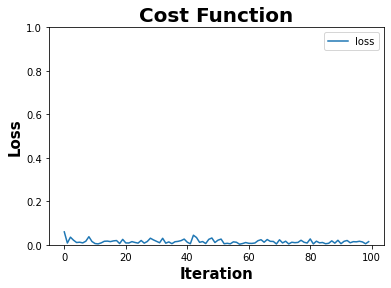

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 8th CV ##################################################


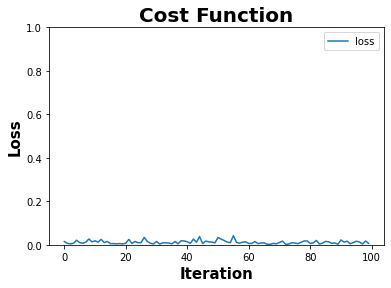

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 9th CV ##################################################


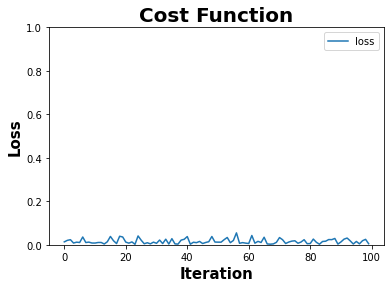

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 10th CV ##################################################


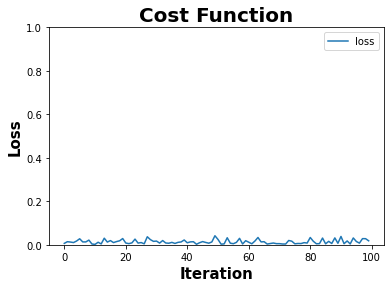

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 35 0 1 3
Accuracy = 0.9743589743589743
Precesion = 1.0
Recall = 0.75
F1 = 0.8571428571428571
F0.5 = 0.9375
F2 = 0.7894736842105263
Gmean = 0.8660254037844386
Balanced Accu. = 0.875


In [190]:
bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // BCE) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)  
print('batch_size: ', batch_size)
learning_rate=0.005

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(cancer_df, cancer_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=BCE, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = model.predict(X_test)
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    

In [191]:
res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res

Delta       BCE  AccAim  F1Aim  F.5Aim  F2Aim  GAim  BAim
Acc    0.982244  0.994872       0      0       0      0     0     0
F1     0.882857  0.965714       0      0       0      0     0     0
F.5    0.947727  0.984659       0      0       0      0     0     0
F2     0.830075  0.950376       0      0       0      0     0     0
Gmean  0.891359  0.968252       0      0       0      0     0     0
B_Acc  0.900000  0.970833       0      0       0      0     0     0

batch_size:  17
################################################## 1th CV ##################################################


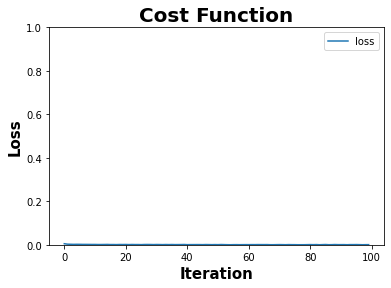

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 2th CV ##################################################


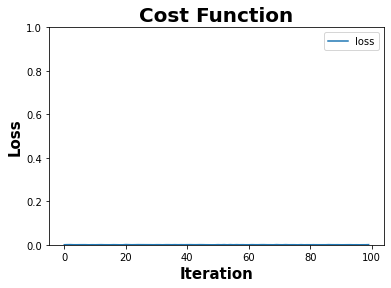

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 1 3
Accuracy = 0.975
Precesion = 1.0
Recall = 0.75
F1 = 0.8571428571428571
F0.5 = 0.9375
F2 = 0.7894736842105263
Gmean = 0.8660254037844386
Balanced Accu. = 0.875
################################################## 3th CV ##################################################


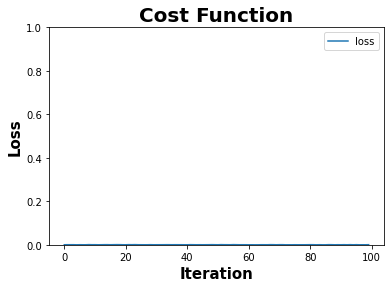

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 4th CV ##################################################


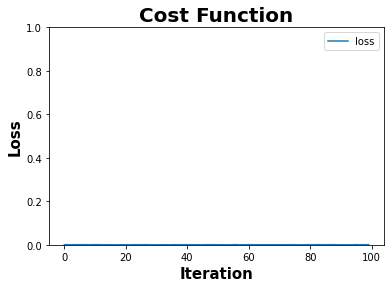

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 5th CV ##################################################


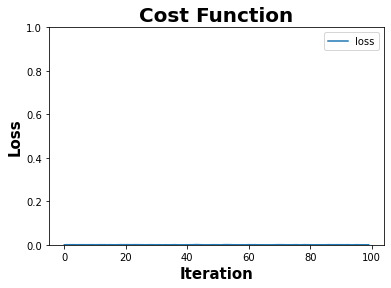

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 6th CV ##################################################


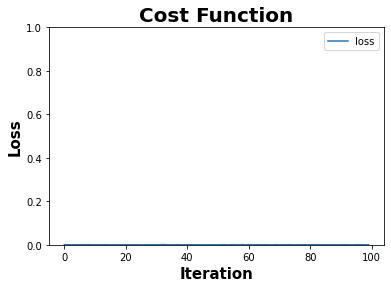

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 7th CV ##################################################


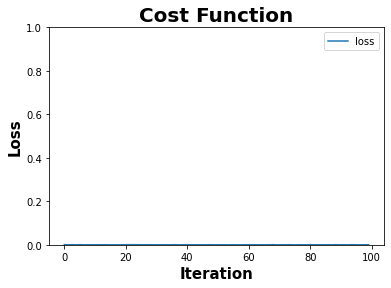

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 8th CV ##################################################


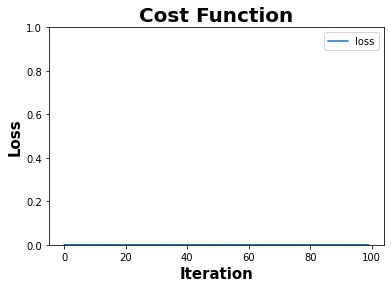

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 34 1 0 4
Accuracy = 0.9743589743589743
Precesion = 0.8
Recall = 1.0
F1 = 0.8888888888888888
F0.5 = 0.8333333333333334
F2 = 0.9523809523809523
Gmean = 0.9856107606091623
Balanced Accu. = 0.9857142857142858
################################################## 9th CV ##################################################


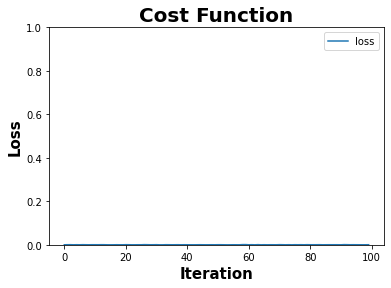

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 10th CV ##################################################


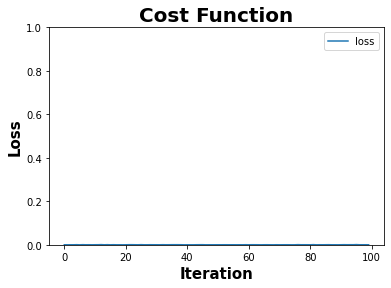

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0


In [192]:
acc_acc = []
acc_f1 = []
acc_f5 = []
acc_f2 = []
acc_gmean = []
acc_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // Accuracy) ##############################
batch_size = int(X.shape[0]*0.9 * 0.05)   # 
print('batch_size: ', batch_size)
learning_rate = 0.005

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(cancer_df, cancer_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=Ours_Accu, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    acc_acc.append((TP+TN)/(TP+TN+FP+FN))
    acc_f1.append(TP / (TP + 0.5*(FP+FN)))
    acc_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    acc_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    acc_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    acc_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [193]:
res['AccAim'] = [np.mean(acc_acc), np.mean(acc_f1), np.mean(acc_f5), np.mean(acc_f2), np.mean(acc_gmean), np.mean(acc_bacc)]
res

Delta       BCE    AccAim  F1Aim  F.5Aim  F2Aim  GAim  BAim
Acc    0.982244  0.994872  0.994936      0       0      0     0     0
F1     0.882857  0.965714  0.974603      0       0      0     0     0
F.5    0.947727  0.984659  0.977083      0       0      0     0     0
F2     0.830075  0.950376  0.974185      0       0      0     0     0
Gmean  0.891359  0.968252  0.985164      0       0      0     0     0
B_Acc  0.900000  0.970833  0.986071      0       0      0     0     0

batch_size:  17
################################################## 1th CV ##################################################


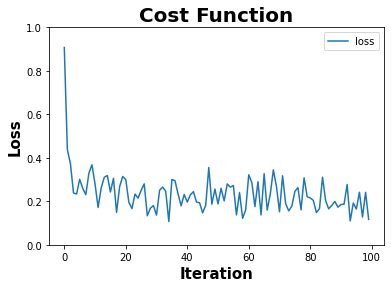

2/2 [==============================] - 1s 2ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 2th CV ##################################################


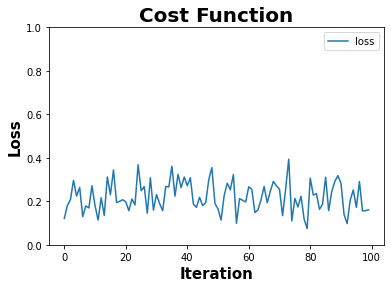

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 3th CV ##################################################


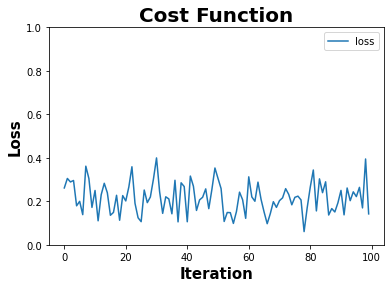

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 4th CV ##################################################


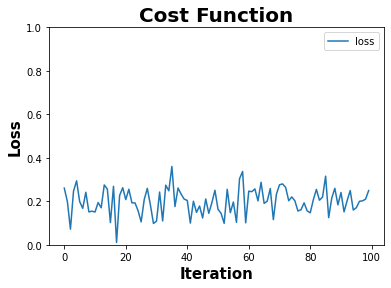

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 5th CV ##################################################


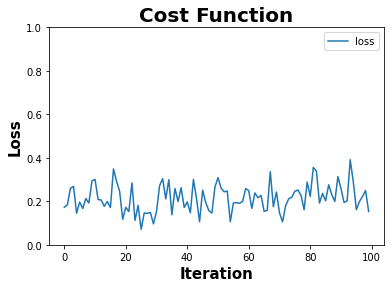

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 6th CV ##################################################


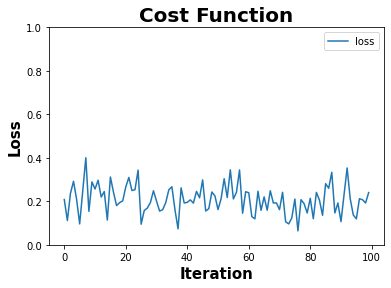

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 7th CV ##################################################


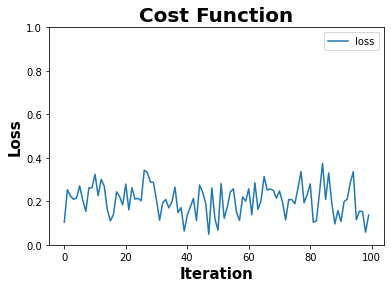

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 8th CV ##################################################


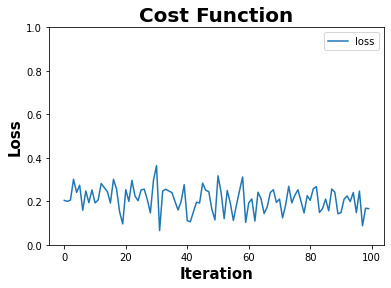

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 9th CV ##################################################


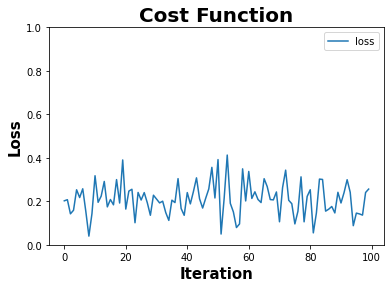

2/2 [==============================] - 0s 2ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 10th CV ##################################################


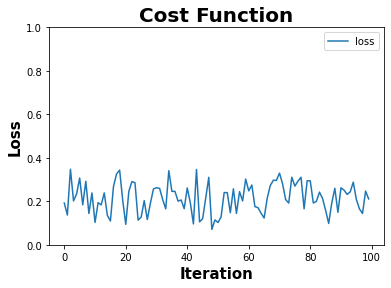

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0


In [194]:
f1_acc = []
f1_f1 = []
f1_f5 = []
f1_f2 = []
f1_gmean = []
f1_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // F1) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)   # 
print('batch_size: ', batch_size)
learning_rate=0.01

beta = 1
model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(cancer_df, cancer_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)

    model.compile(loss=Ours_Fbeta, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    f1_acc.append((TP+TN)/(TP+TN+FP+FN))
    f1_f1.append(TP / (TP + 0.5*(FP+FN)))
    f1_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f1_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f1_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f1_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [195]:
res['F1Aim'] = [np.mean(f1_acc), np.mean(f1_f1), np.mean(f1_f5), np.mean(f1_f2), np.mean(f1_gmean), np.mean(f1_bacc)]
res

Delta       BCE    AccAim  F1Aim  F.5Aim  F2Aim  GAim  BAim
Acc    0.982244  0.994872  0.994936    1.0       0      0     0     0
F1     0.882857  0.965714  0.974603    1.0       0      0     0     0
F.5    0.947727  0.984659  0.977083    1.0       0      0     0     0
F2     0.830075  0.950376  0.974185    1.0       0      0     0     0
Gmean  0.891359  0.968252  0.985164    1.0       0      0     0     0
B_Acc  0.900000  0.970833  0.986071    1.0       0      0     0     0

batch_size:  17
################################################## 1th CV ##################################################


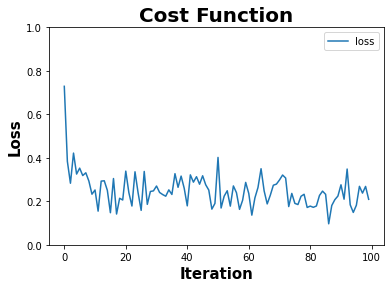

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 2th CV ##################################################


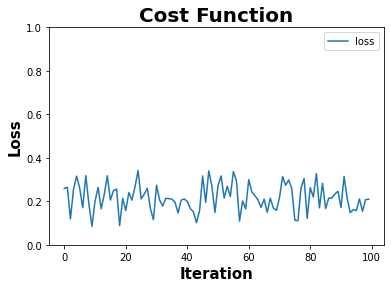

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 1 3
Accuracy = 0.975
Precesion = 1.0
Recall = 0.75
F1 = 0.8571428571428571
F0.5 = 0.9375
F2 = 0.7894736842105263
Gmean = 0.8660254037844386
Balanced Accu. = 0.875
################################################## 3th CV ##################################################


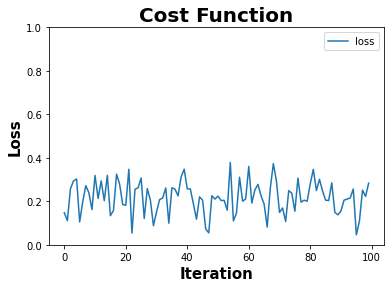

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 4th CV ##################################################


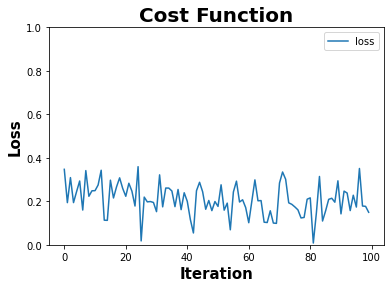

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 1 2
Accuracy = 0.9743589743589743
Precesion = 1.0
Recall = 0.6666666666666666
F1 = 0.8
F0.5 = 0.9090909090909091
F2 = 0.7142857142857143
Gmean = 0.816496580927726
Balanced Accu. = 0.8333333333333333
################################################## 5th CV ##################################################


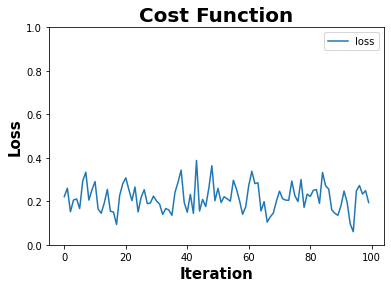

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 6th CV ##################################################


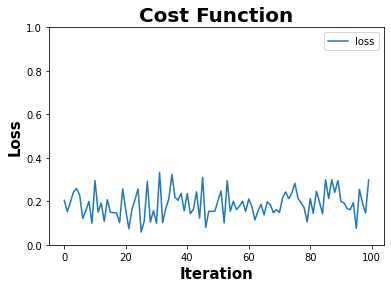

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 7th CV ##################################################


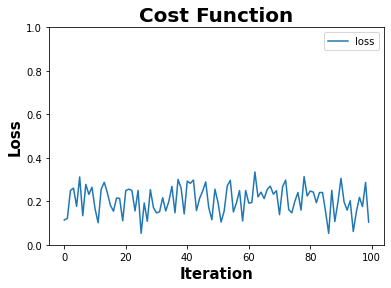

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 8th CV ##################################################


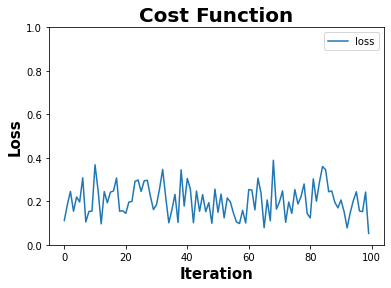

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 9th CV ##################################################


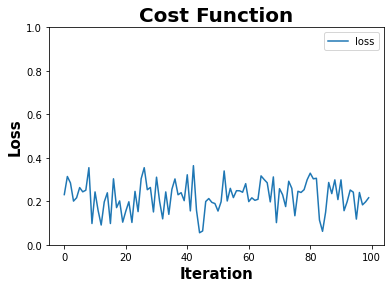

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 10th CV ##################################################


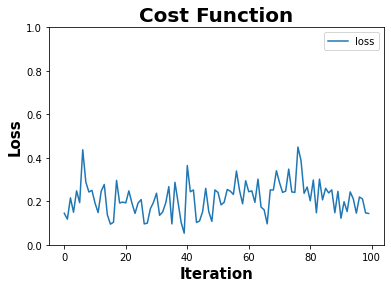

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0


In [196]:
f05_acc = []
f05_f1 = []
f05_f5 = []
f05_f2 = []
f05_gmean = []
f05_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // F0.5) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)   # 
print('batch_size: ', batch_size)
learning_rate=0.01

beta = 0.5
model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(cancer_df, cancer_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=Ours_Fbeta, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    f05_acc.append((TP+TN)/(TP+TN+FP+FN))
    f05_f1.append(TP / (TP + 0.5*(FP+FN)))
    f05_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f05_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f05_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f05_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [197]:
res['F.5Aim'] = [np.mean(f05_acc), np.mean(f05_f1), np.mean(f05_f5), np.mean(f05_f2), np.mean(f05_gmean), np.mean(f05_bacc)]
res

Delta       BCE    AccAim  F1Aim    F.5Aim  F2Aim  GAim  BAim
Acc    0.982244  0.994872  0.994936    1.0  0.994936      0     0     0
F1     0.882857  0.965714  0.974603    1.0  0.965714      0     0     0
F.5    0.947727  0.984659  0.977083    1.0  0.984659      0     0     0
F2     0.830075  0.950376  0.974185    1.0  0.950376      0     0     0
Gmean  0.891359  0.968252  0.985164    1.0  0.968252      0     0     0
B_Acc  0.900000  0.970833  0.986071    1.0  0.970833      0     0     0

batch_size:  17
################################################## 1th CV ##################################################


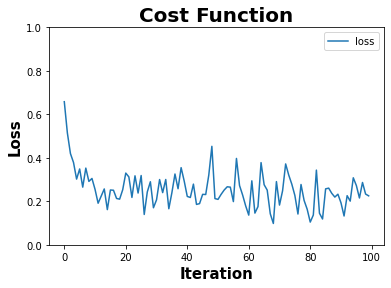

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 2th CV ##################################################


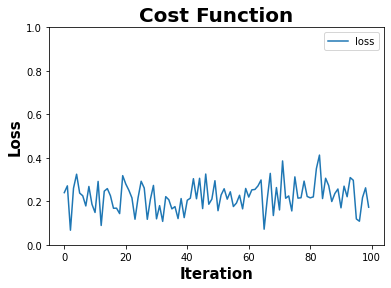

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 3th CV ##################################################


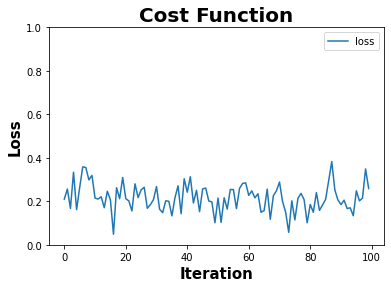

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 4th CV ##################################################


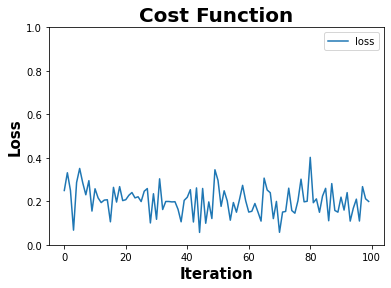

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 5th CV ##################################################


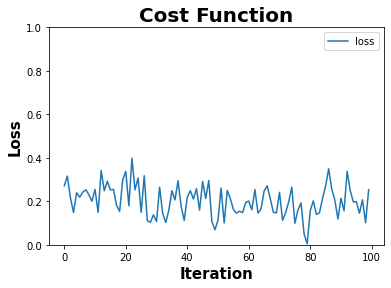

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 6th CV ##################################################


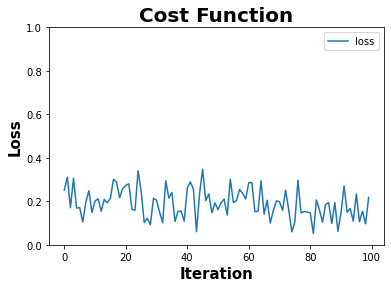

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 7th CV ##################################################


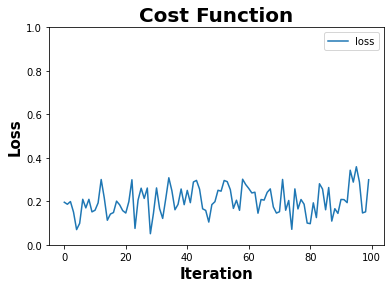

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 8th CV ##################################################


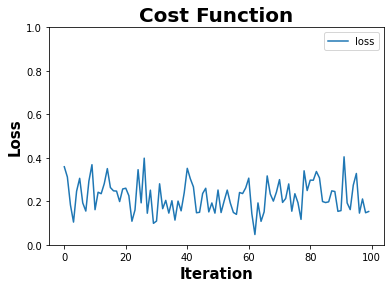

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 9th CV ##################################################


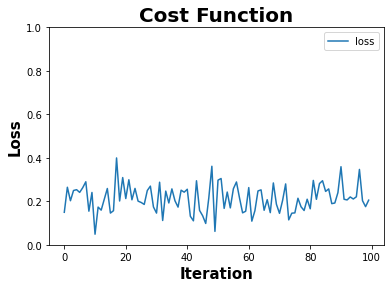

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 10th CV ##################################################


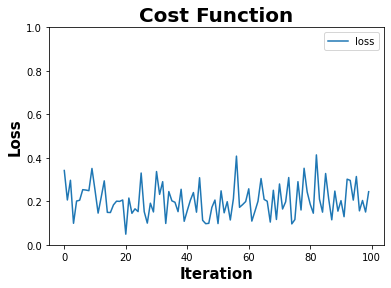

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0


In [198]:
f2_acc = []
f2_f1 = []
f2_f5 = []
f2_f2 = []
f2_gmean = []
f2_bacc = []

n_iter=0
    
###################### MLP (sigmoid // sigmoid // F2) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)   # 
print('batch_size: ', batch_size)
learning_rate=0.003

beta = 2
model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)
    
for train_index, test_index in skf.split(cancer_df, cancer_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=Ours_Fbeta, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    f2_acc.append((TP+TN)/(TP+TN+FP+FN))
    f2_f1.append(TP / (TP + 0.5*(FP+FN)))
    f2_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f2_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f2_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f2_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [199]:
res['F2Aim'] = [np.mean(f2_acc), np.mean(f2_f1), np.mean(f2_f5), np.mean(f2_f2), np.mean(f2_gmean), np.mean(f2_bacc)]
res

Delta       BCE    AccAim  F1Aim    F.5Aim  F2Aim  GAim  BAim
Acc    0.982244  0.994872  0.994936    1.0  0.994936    1.0     0     0
F1     0.882857  0.965714  0.974603    1.0  0.965714    1.0     0     0
F.5    0.947727  0.984659  0.977083    1.0  0.984659    1.0     0     0
F2     0.830075  0.950376  0.974185    1.0  0.950376    1.0     0     0
Gmean  0.891359  0.968252  0.985164    1.0  0.968252    1.0     0     0
B_Acc  0.900000  0.970833  0.986071    1.0  0.970833    1.0     0     0

batch_size:  177
################################################## 1th CV ##################################################


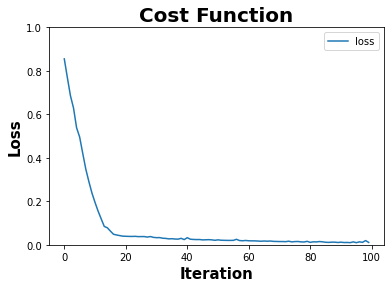

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 2th CV ##################################################


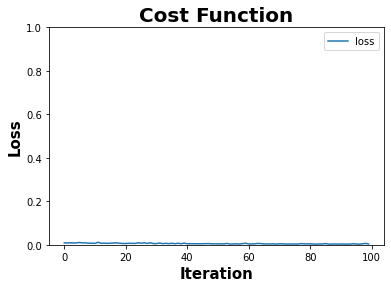

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 3th CV ##################################################


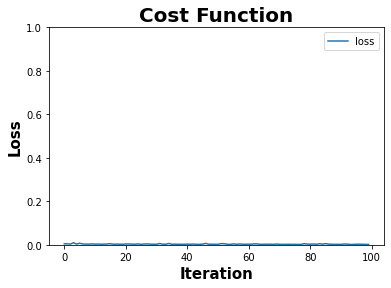

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 4th CV ##################################################


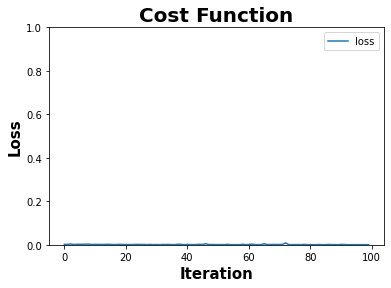

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 5th CV ##################################################


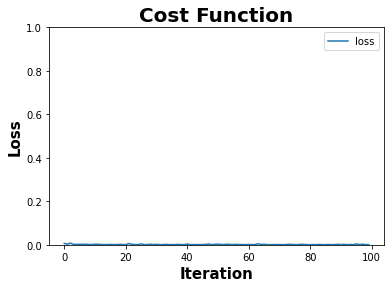

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 6th CV ##################################################


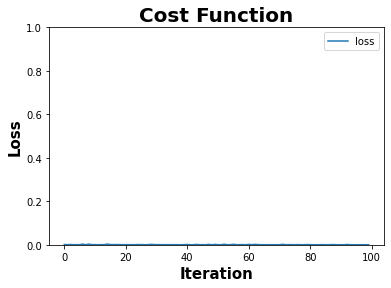

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 1 2
Accuracy = 0.9743589743589743
Precesion = 1.0
Recall = 0.6666666666666666
F1 = 0.8
F0.5 = 0.9090909090909091
F2 = 0.7142857142857143
Gmean = 0.816496580927726
Balanced Accu. = 0.8333333333333333
################################################## 7th CV ##################################################


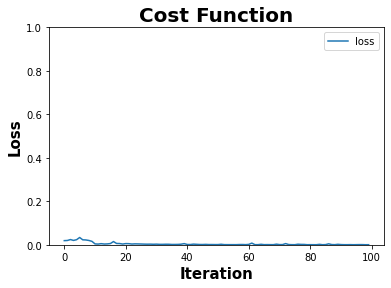

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 8th CV ##################################################


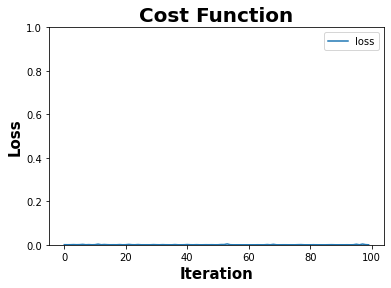

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 34 1 0 4
Accuracy = 0.9743589743589743
Precesion = 0.8
Recall = 1.0
F1 = 0.8888888888888888
F0.5 = 0.8333333333333334
F2 = 0.9523809523809523
Gmean = 0.9856107606091623
Balanced Accu. = 0.9857142857142858
################################################## 9th CV ##################################################


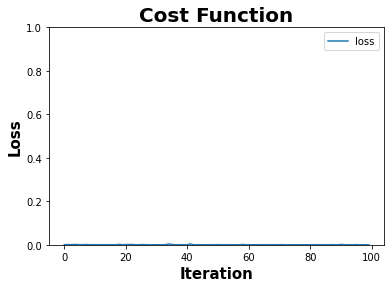

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 10th CV ##################################################


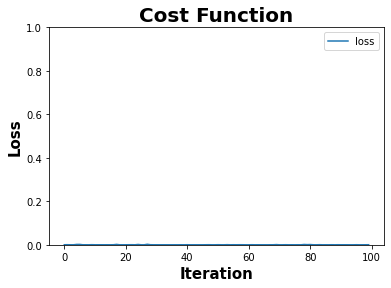

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0


In [200]:
gmean_acc = []
gmean_f1 = []
gmean_f5 = []
gmean_f2 = []
gmean_gmean = []
gmean_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // Gmean) ############################## 
batch_size = int(np.ceil(X.shape[0]*0.9 * 0.5))   # 0.977612
print('batch_size: ', batch_size)
learning_rate=0.01

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(cancer_df, cancer_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
        
    model.compile(loss=Ours_Gmean, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    gmean_acc.append((TP+TN)/(TP+TN+FP+FN))
    gmean_f1.append(TP / (TP + 0.5*(FP+FN)))
    gmean_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    gmean_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    gmean_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    gmean_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [201]:
res['GAim'] = [np.mean(gmean_acc), np.mean(gmean_f1), np.mean(gmean_f5), np.mean(gmean_f2), np.mean(gmean_gmean), np.mean(gmean_bacc)]
res

Delta       BCE    AccAim  F1Aim    F.5Aim  F2Aim      GAim  BAim
Acc    0.982244  0.994872  0.994936    1.0  0.994936    1.0  0.994872     0
F1     0.882857  0.965714  0.974603    1.0  0.965714    1.0  0.968889     0
F.5    0.947727  0.984659  0.977083    1.0  0.984659    1.0  0.974242     0
F2     0.830075  0.950376  0.974185    1.0  0.950376    1.0  0.966667     0
Gmean  0.891359  0.968252  0.985164    1.0  0.968252    1.0  0.980211     0
B_Acc  0.900000  0.970833  0.986071    1.0  0.970833    1.0  0.981905     0

batch_size:  176
################################################## 1th CV ##################################################


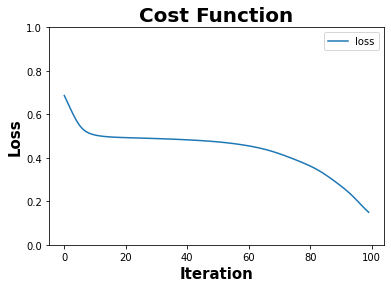

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 27 9 0 4
Accuracy = 0.775
Precesion = 0.3076923076923077
Recall = 1.0
F1 = 0.47058823529411764
F0.5 = 0.35714285714285715
F2 = 0.6896551724137931
Gmean = 0.8660254037844386
Balanced Accu. = 0.875
################################################## 2th CV ##################################################


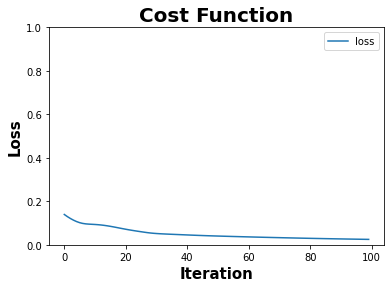

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 3th CV ##################################################


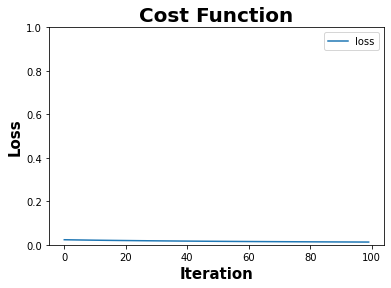

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 35 1 0 4
Accuracy = 0.975
Precesion = 0.8
Recall = 1.0
F1 = 0.8888888888888888
F0.5 = 0.8333333333333334
F2 = 0.9523809523809523
Gmean = 0.9860132971832694
Balanced Accu. = 0.9861111111111112
################################################## 4th CV ##################################################


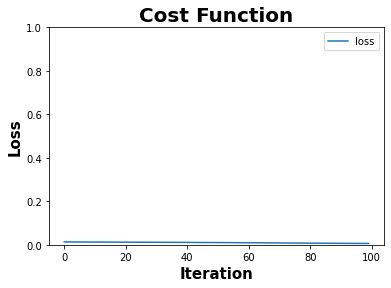

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 5th CV ##################################################


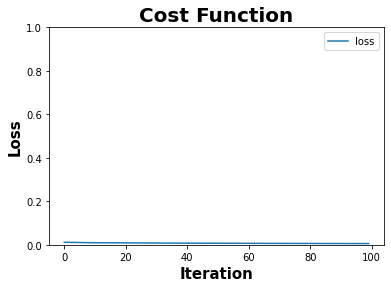

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 6th CV ##################################################


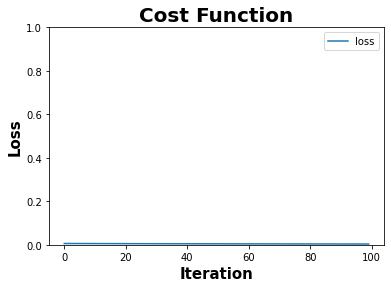

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 36 0 0 3
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 7th CV ##################################################


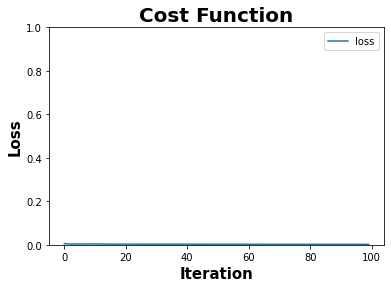

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 35 1 0 3
Accuracy = 0.9743589743589743
Precesion = 0.75
Recall = 1.0
F1 = 0.8571428571428571
F0.5 = 0.7894736842105263
F2 = 0.9375
Gmean = 0.9860132971832694
Balanced Accu. = 0.9861111111111112
################################################## 8th CV ##################################################


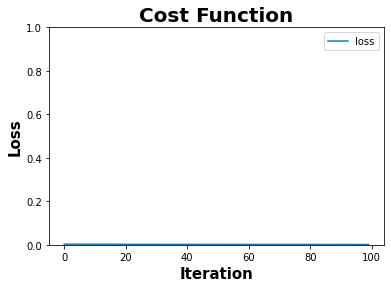

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 34 1 0 4
Accuracy = 0.9743589743589743
Precesion = 0.8
Recall = 1.0
F1 = 0.8888888888888888
F0.5 = 0.8333333333333334
F2 = 0.9523809523809523
Gmean = 0.9856107606091623
Balanced Accu. = 0.9857142857142858
################################################## 9th CV ##################################################


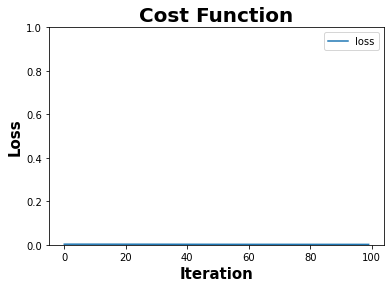

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0
################################################## 10th CV ##################################################


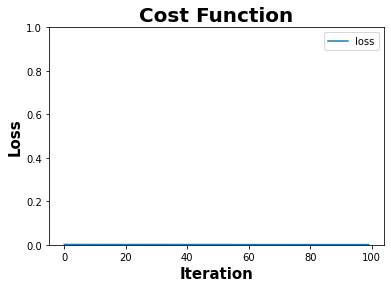

2/2 [==============================] - 0s 1ms/step
TN, FP, FN, TP: 35 0 0 4
Accuracy = 1.0
Precesion = 1.0
Recall = 1.0
F1 = 1.0
F0.5 = 1.0
F2 = 1.0
Gmean = 1.0
Balanced Accu. = 1.0


In [202]:
bacc_acc = []
bacc_f1 = []
bacc_f5 = []
bacc_f2 = []
bacc_gmean = []
bacc_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // Balanced Accuracy) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.5)   # 
print('batch_size: ', batch_size)
learning_rate=0.005

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(cancer_df, cancer_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
     
    model.compile(loss=Ours_BAccu, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=X_train.shape[0])
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    bacc_acc.append((TP+TN)/(TP+TN+FP+FN))
    bacc_f1.append(TP / (TP + 0.5*(FP+FN)))
    bacc_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bacc_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bacc_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bacc_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [203]:
res['BAim'] = [np.mean(bacc_acc), np.mean(bacc_f1), np.mean(bacc_f5), np.mean(bacc_f2), np.mean(bacc_gmean), np.mean(bacc_bacc)]
res

Delta       BCE    AccAim  F1Aim    F.5Aim  F2Aim      GAim  \
Acc    0.982244  0.994872  0.994936    1.0  0.994936    1.0  0.994872   
F1     0.882857  0.965714  0.974603    1.0  0.965714    1.0  0.968889   
F.5    0.947727  0.984659  0.977083    1.0  0.984659    1.0  0.974242   
F2     0.830075  0.950376  0.974185    1.0  0.950376    1.0  0.966667   
Gmean  0.891359  0.968252  0.985164    1.0  0.968252    1.0  0.980211   
B_Acc  0.900000  0.970833  0.986071    1.0  0.970833    1.0  0.981905   

           BAim  
Acc    0.969872  
F1     0.910551  
F.5    0.881328  
F2     0.953192  
Gmean  0.982366  
B_Acc  0.983294

# 4. Diabetes Prediction Data (8d / 100000)

In [135]:
# class 'B' = Benign, class 'M' = Malignant
diab_df = pd.read_csv('diabetes_prediction_dataset.csv')
diab_df.shape

(100000, 9)

In [136]:
diab_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [137]:
diab_df

gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[100000 rows x 9 columns]

In [138]:
# Female = 0, Male = 1, other = 2
gen_encoded, gen_class = pd.factorize(diab_df['gender'])
print(gen_class)
gen_encoded

Index(['Female', 'Male', 'Other'], dtype='object')


array([0, 0, 1, ..., 1, 0, 0])

In [139]:
# Female = 0, Male = 1, other = 2
pd.Series(gen_encoded).value_counts()

0    58552
1    41430
2       18
dtype: int64

In [140]:
diab_df['gender'] = gen_encoded
diab_df

gender   age  hypertension  heart_disease smoking_history    bmi  \
0           0  80.0             0              1           never  25.19   
1           0  54.0             0              0         No Info  27.32   
2           1  28.0             0              0           never  27.32   
3           0  36.0             0              0         current  23.45   
4           1  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995       0  80.0             0              0         No Info  27.32   
99996       0   2.0             0              0         No Info  17.37   
99997       1  66.0             0              0          former  27.83   
99998       0  24.0             0              0           never  35.42   
99999       0  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[100000 rows x 9 columns]

In [141]:
# never = 0, Info = 1, current = 2, former=3, ever=4, not current=5
smo_encoded, smo_class = pd.factorize(diab_df['smoking_history'])
print(smo_class)
smo_encoded

Index(['never', 'No Info', 'current', 'former', 'ever', 'not current'], dtype='object')


array([0, 1, 0, ..., 3, 0, 2])

In [142]:
# never = 0, Info = 1, current = 2, former=3, ever=4, not current=5
pd.Series(smo_encoded).value_counts()

1    35816
0    35095
3     9352
2     9286
5     6447
4     4004
dtype: int64

In [143]:
diab_df['smoking_history'] = smo_encoded
diab_df

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0           0  80.0             0              1                0  25.19   
1           0  54.0             0              0                1  27.32   
2           1  28.0             0              0                0  27.32   
3           0  36.0             0              0                2  23.45   
4           1  76.0             1              1                2  20.14   
...       ...   ...           ...            ...              ...    ...   
99995       0  80.0             0              0                1  27.32   
99996       0   2.0             0              0                1  17.37   
99997       1  66.0             0              0                3  27.83   
99998       0  24.0             0              0                0  35.42   
99999       0  57.0             0              0                2  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140         0  
1              6.6                   80         0  
2              5.7                  158         0  
3              5.0                  155         0  
4              4.8                  155         0  
...            ...                  ...       ...  
99995          6.2                   90         0  
99996          6.5                  100         0  
99997          5.7                  155         0  
99998          4.0                  100         0  
99999          6.6                   90         0  

[100000 rows x 9 columns]

In [144]:
diab_df.describe()

gender            age  hypertension  heart_disease  \
count  100000.000000  100000.000000  100000.00000  100000.000000   
mean        0.414660      41.885856       0.07485       0.039420   
std         0.493031      22.516840       0.26315       0.194593   
min         0.000000       0.080000       0.00000       0.000000   
25%         0.000000      24.000000       0.00000       0.000000   
50%         0.000000      43.000000       0.00000       0.000000   
75%         1.000000      60.000000       0.00000       0.000000   
max         2.000000      80.000000       1.00000       1.000000   

       smoking_history            bmi    HbA1c_level  blood_glucose_level  \
count    100000.000000  100000.000000  100000.000000        100000.000000   
mean          1.306950      27.320767       5.527507           138.058060   
std           1.454501       6.636783       1.070672            40.708136   
min           0.000000      10.010000       3.500000            80.000000   
25%           0.000000      23.630000       4.800000           100.000000   
50%           1.000000      27.320000       5.800000           140.000000   
75%           2.000000      29.580000       6.200000           159.000000   
max           5.000000      95.690000       9.000000           300.000000   

            diabetes  
count  100000.000000  
mean        0.085000  
std         0.278883  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [145]:
# Amount values largely varies.

# # Normalization
# card_df.iloc[:,:-1] = (card_df.iloc[:,:-1] - card_df.iloc[:,:-1].min())/(card_df.iloc[:,:-1].max() - card_df.iloc[:,:-1].min())

# Standardization
diab_df.iloc[:,:-1] = (diab_df.iloc[:,:-1] - diab_df.iloc[:,:-1].mean())/diab_df.iloc[:,:-1].std()

diab_df

gender       age  hypertension  heart_disease  smoking_history  \
0     -0.841043  1.692695     -0.284438       4.936354        -0.898556   
1     -0.841043  0.538004     -0.284438      -0.202577        -0.211035   
2      1.187228 -0.616688     -0.284438      -0.202577        -0.898556   
3     -0.841043 -0.261398     -0.284438      -0.202577         0.476486   
4      1.187228  1.515050      3.515669       4.936354         0.476486   
...         ...       ...           ...            ...              ...   
99995 -0.841043  1.692695     -0.284438      -0.202577        -0.211035   
99996 -0.841043 -1.771379     -0.284438      -0.202577        -0.211035   
99997  1.187228  1.070938     -0.284438      -0.202577         1.164008   
99998 -0.841043 -0.794332     -0.284438      -0.202577        -0.898556   
99999 -0.841043  0.671237     -0.284438      -0.202577         0.476486   

            bmi  HbA1c_level  blood_glucose_level  diabetes  
0     -0.321054     1.001701             0.047704         0  
1     -0.000116     1.001701            -1.426203         0  
2     -0.000116     0.161107             0.489876         0  
3     -0.583229    -0.492688             0.416181         0  
4     -1.081965    -0.679486             0.416181         0  
...         ...          ...                  ...       ...  
99995 -0.000116     0.628104            -1.180552         0  
99996 -1.499336     0.908301            -0.934901         0  
99997  0.076729     0.161107             0.416181         0  
99998  1.220355    -1.426681            -0.934901         0  
99999 -0.736918     1.001701            -1.180552         0  

[100000 rows x 9 columns]

In [146]:
res = pd.DataFrame({'Delta':[0, 0, 0, 0, 0, 0],
                    'BCE':[0, 0, 0, 0, 0, 0],
                    'AccAim':[0, 0, 0, 0, 0, 0],
                    'F1Aim':[0, 0, 0, 0, 0, 0],
                    'F.5Aim':[0, 0, 0, 0, 0, 0],
                    'F2Aim':[0, 0, 0, 0, 0, 0],
                    'GAim':[0, 0, 0, 0, 0, 0],
                    'BAim':[0, 0, 0, 0, 0, 0]}, index = ['Acc','F1','F.5','F2','Gmean','B_Acc'])

In [147]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state = 2)

X = diab_df.iloc[:, :-1]
y = diab_df.iloc[:, -1]

In [148]:
L = 73
hidden_node = 2
# momentum=0.9
activation = 'sigmoid'  
kernel_initializer=keras.initializers.he_normal(seed=100)
epochs=100

batch_size:  4500
################################################## 1th CV ##################################################


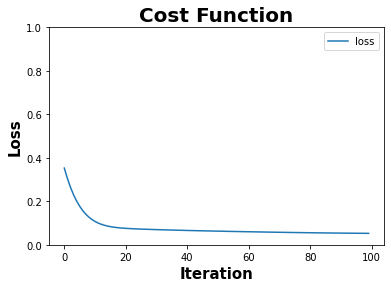

313/313 [==============================] - 0s 462us/step
TN, FP, FN, TP: 9150 0 788 62
Accuracy = 0.9212
Precesion = 1.0
Recall = 0.07294117647058823
F1 = 0.13596491228070176
F0.5 = 0.2823315118397085
F2 = 0.08954361640670132
Gmean = 0.2700762419587999
Balanced Accu. = 0.5364705882352941
################################################## 2th CV ##################################################


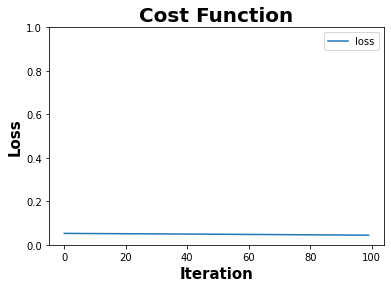

313/313 [==============================] - 0s 454us/step
TN, FP, FN, TP: 9133 17 457 393
Accuracy = 0.9526
Precesion = 0.9585365853658536
Recall = 0.4623529411764706
F1 = 0.6238095238095238
F0.5 = 0.7891566265060241
F2 = 0.515748031496063
Gmean = 0.6793334415314971
Balanced Accu. = 0.7302475088396014
################################################## 3th CV ##################################################


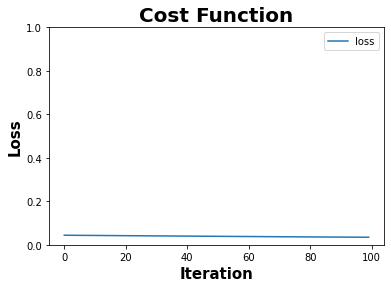

313/313 [==============================] - 0s 455us/step
TN, FP, FN, TP: 9103 47 376 474
Accuracy = 0.9577
Precesion = 0.9097888675623801
Recall = 0.5576470588235294
F1 = 0.6914660831509847
F0.5 = 0.8077709611451942
F2 = 0.6044376434583014
Gmean = 0.7448373260230873
Balanced Accu. = 0.7762552234008357
################################################## 4th CV ##################################################


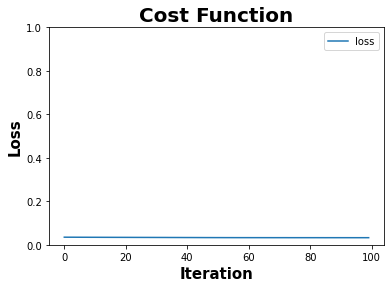

313/313 [==============================] - 0s 442us/step
TN, FP, FN, TP: 9103 47 336 514
Accuracy = 0.9617
Precesion = 0.9162210338680927
Recall = 0.6047058823529412
F1 = 0.7285613040396882
F0.5 = 0.830639948287007
F2 = 0.6488260540267609
Gmean = 0.7756286114165457
Balanced Accu. = 0.7997846351655417
################################################## 5th CV ##################################################


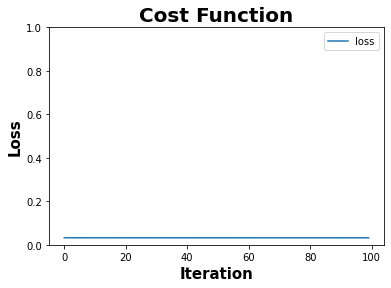

313/313 [==============================] - 0s 441us/step
TN, FP, FN, TP: 9089 61 347 503
Accuracy = 0.9592
Precesion = 0.8918439716312057
Recall = 0.591764705882353
F1 = 0.7114568599717115
F0.5 = 0.8097231165486156
F2 = 0.6344601412714429
Gmean = 0.7666939466587285
Balanced Accu. = 0.7925490196078431
################################################## 6th CV ##################################################


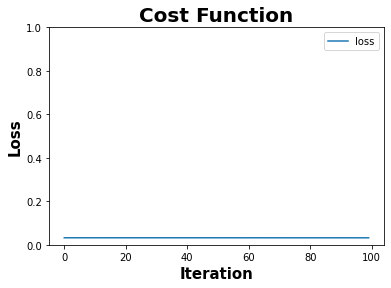

313/313 [==============================] - 0s 440us/step
TN, FP, FN, TP: 9083 67 304 546
Accuracy = 0.9629
Precesion = 0.8907014681892332
Recall = 0.6423529411764706
F1 = 0.7464114832535885
F0.5 = 0.8267716535433071
F2 = 0.680289060553202
Gmean = 0.7985295067759862
Balanced Accu. = 0.8175152684024429
################################################## 7th CV ##################################################


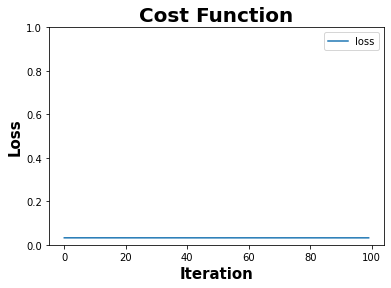

313/313 [==============================] - 0s 466us/step
TN, FP, FN, TP: 9106 44 328 522
Accuracy = 0.9628
Precesion = 0.9222614840989399
Recall = 0.6141176470588235
F1 = 0.7372881355932204
F0.5 = 0.8381502890173409
F2 = 0.6580937972768532
Gmean = 0.7817701151990412
Balanced Accu. = 0.8046544519447123
################################################## 8th CV ##################################################


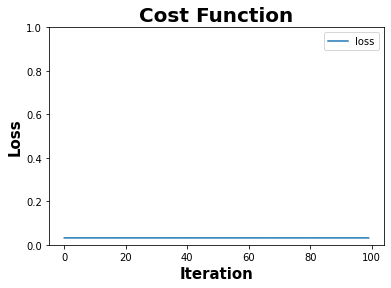

313/313 [==============================] - 0s 479us/step
TN, FP, FN, TP: 9093 57 337 513
Accuracy = 0.9606
Precesion = 0.9
Recall = 0.6035294117647059
F1 = 0.7225352112676057
F0.5 = 0.8194888178913738
F2 = 0.646095717884131
Gmean = 0.7744480100995517
Balanced Accu. = 0.7986499517839922
################################################## 9th CV ##################################################


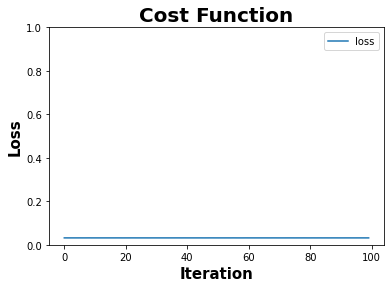

313/313 [==============================] - 0s 467us/step
TN, FP, FN, TP: 9089 61 339 511
Accuracy = 0.96
Precesion = 0.8933566433566433
Recall = 0.6011764705882353
F1 = 0.7187060478199718
F0.5 = 0.81421287444232
F2 = 0.6432527693856999
Gmean = 0.7727668648764519
Balanced Accu. = 0.7972549019607843
################################################## 10th CV ##################################################


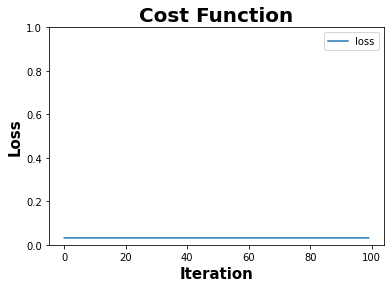

313/313 [==============================] - 0s 474us/step
TN, FP, FN, TP: 9087 63 325 525
Accuracy = 0.9612
Precesion = 0.8928571428571429
Recall = 0.6176470588235294
F1 = 0.7301808066759388
F0.5 = 0.8198001249219238
F2 = 0.6582246740220662
Gmean = 0.7831949993093069
Balanced Accu. = 0.8053809064609451


In [149]:
ada_acc = []
ada_f1 = []
ada_f5 = []
ada_f2 = []
ada_gmean = []
ada_bacc = []

n_iter=0

###################### MLP (sigmoid // MSE) ##############################
batch_size = int(X.shape[0]*0.9 * 0.05)  
print('batch_size: ', batch_size)
learning_rate = 0.001

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(diab_df, diab_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
        
    model.compile(loss=MSE, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()
    predicted = []
    result = model.predict(X_test)
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    ada_acc.append((TP+TN)/(TP+TN+FP+FN))
    ada_f1.append(TP / (TP + 0.5*(FP+FN)))
    ada_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    ada_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    ada_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    ada_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    

In [150]:
res['Delta'] = [np.mean(ada_acc), np.mean(ada_f1), np.mean(ada_f5), np.mean(ada_f2), np.mean(ada_gmean), np.mean(ada_bacc)]
res

Delta  BCE  AccAim  F1Aim  F.5Aim  F2Aim  GAim  BAim
Acc    0.955990    0       0      0       0      0     0     0
F1     0.654638    0       0      0       0      0     0     0
F.5    0.763805    0       0      0       0      0     0     0
F2     0.577897    0       0      0       0      0     0     0
Gmean  0.714728    0       0      0       0      0     0     0
B_Acc  0.765876    0       0      0       0      0     0     0

batch_size:  4500
################################################## 1th CV ##################################################


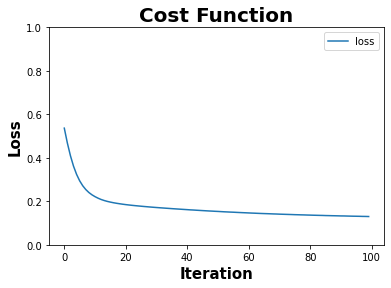

313/313 [==============================] - 0s 459us/step
TN, FP, FN, TP: 9081 69 338 512
Accuracy = 0.9593
Precesion = 0.8812392426850258
Recall = 0.6023529411764705
F1 = 0.7155835080363382
F0.5 = 0.8065532451165721
F2 = 0.6430545089173574
Gmean = 0.773182130886182
Balanced Accu. = 0.7974059787849566
################################################## 2th CV ##################################################


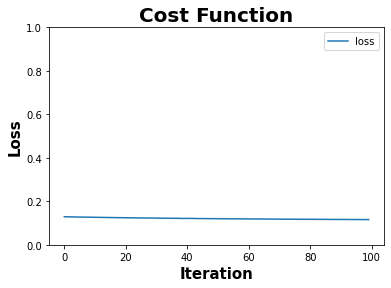

313/313 [==============================] - 0s 453us/step
TN, FP, FN, TP: 9085 65 347 503
Accuracy = 0.9588
Precesion = 0.8855633802816901
Recall = 0.591764705882353
F1 = 0.7094499294781382
F0.5 = 0.8055733504163998
F2 = 0.633820564516129
Gmean = 0.7665252199958891
Balanced Accu. = 0.7923304403728705
################################################## 3th CV ##################################################


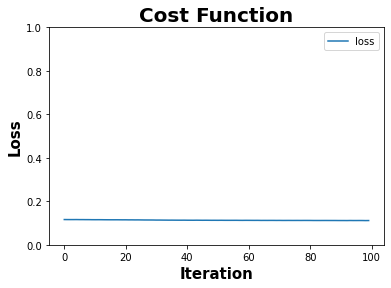

313/313 [==============================] - 0s 446us/step
TN, FP, FN, TP: 9097 53 354 496
Accuracy = 0.9593
Precesion = 0.9034608378870674
Recall = 0.5835294117647059
F1 = 0.7090779127948534
F0.5 = 0.8141825344714381
F2 = 0.6280070904026336
Gmean = 0.7616753936788984
Balanced Accu. = 0.7888685310189649
################################################## 4th CV ##################################################


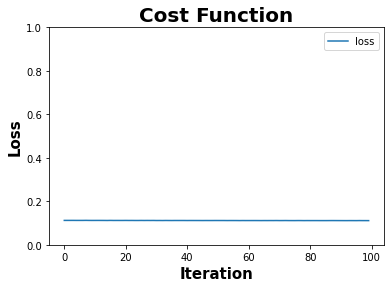

313/313 [==============================] - 0s 448us/step
TN, FP, FN, TP: 9112 38 336 514
Accuracy = 0.9626
Precesion = 0.9311594202898551
Recall = 0.6047058823529412
F1 = 0.7332382310984308
F0.5 = 0.8404185742315239
F2 = 0.6503036437246963
Gmean = 0.7760119428972249
Balanced Accu. = 0.8002764384442302
################################################## 5th CV ##################################################


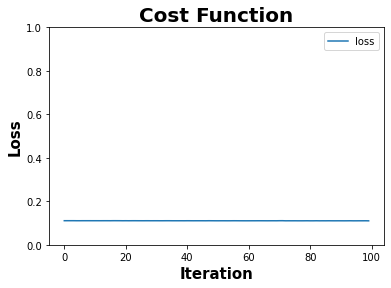

313/313 [==============================] - 0s 456us/step
TN, FP, FN, TP: 9101 49 353 497
Accuracy = 0.9598
Precesion = 0.9102564102564102
Recall = 0.5847058823529412
F1 = 0.7120343839541547
F0.5 = 0.8190507580751483
F2 = 0.629751647237709
Gmean = 0.7626104316910092
Balanced Accu. = 0.7896753455480553
################################################## 6th CV ##################################################


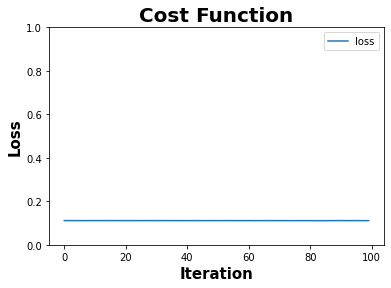

313/313 [==============================] - 0s 454us/step
TN, FP, FN, TP: 9098 52 329 521
Accuracy = 0.9619
Precesion = 0.9092495636998255
Recall = 0.6129411764705882
F1 = 0.7322557976106817
F0.5 = 0.8290897517504774
F2 = 0.655675811729172
Gmean = 0.7806777791901388
Balanced Accu. = 0.8036290581806493
################################################## 7th CV ##################################################


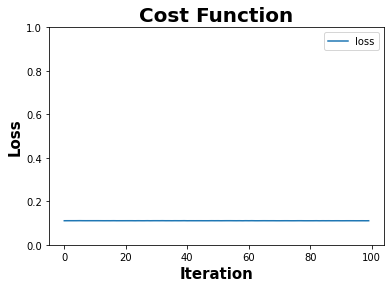

313/313 [==============================] - 0s 456us/step
TN, FP, FN, TP: 9122 28 351 499
Accuracy = 0.9621
Precesion = 0.9468690702087287
Recall = 0.5870588235294117
F1 = 0.7247639796659404
F0.5 = 0.8434753211629479
F2 = 0.6353450471097529
Gmean = 0.7650244174991917
Balanced Accu. = 0.7919993571198971
################################################## 8th CV ##################################################


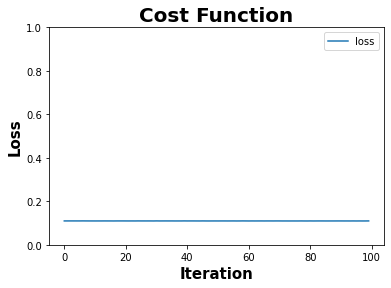

313/313 [==============================] - 0s 474us/step
TN, FP, FN, TP: 9106 44 359 491
Accuracy = 0.9597
Precesion = 0.9177570093457944
Recall = 0.5776470588235294
F1 = 0.7090252707581227
F0.5 = 0.8210702341137124
F2 = 0.6238881829733164
Gmean = 0.7582013601116054
Balanced Accu. = 0.7864191578270652
################################################## 9th CV ##################################################


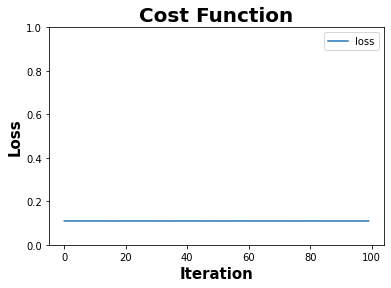

313/313 [==============================] - 0s 481us/step
TN, FP, FN, TP: 9112 38 367 483
Accuracy = 0.9595
Precesion = 0.927063339731286
Recall = 0.5682352941176471
F1 = 0.7045951859956237
F0.5 = 0.8231083844580778
F2 = 0.6159143075745983
Gmean = 0.7522469074951824
Balanced Accu. = 0.7820411443265831
################################################## 10th CV ##################################################


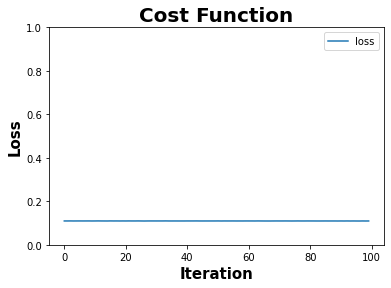

313/313 [==============================] - 0s 477us/step
TN, FP, FN, TP: 9104 46 347 503
Accuracy = 0.9607
Precesion = 0.9162112932604736
Recall = 0.591764705882353
F1 = 0.7190850607576841
F0.5 = 0.8256730137885753
F2 = 0.6368700936946061
Gmean = 0.7673263412123646
Balanced Accu. = 0.7933686917389907


In [151]:
bce_acc = []
bce_f1 = []
bce_f5 = []
bce_f2 = []
bce_gmean = []
bce_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // BCE) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)  
print('batch_size: ', batch_size)
learning_rate=0.005

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(diab_df, diab_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=BCE, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = model.predict(X_test)
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    bce_acc.append((TP+TN)/(TP+TN+FP+FN))
    bce_f1.append(TP / (TP + 0.5*(FP+FN)))
    bce_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bce_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bce_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bce_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))    

In [152]:
res['BCE'] = [np.mean(bce_acc), np.mean(bce_f1), np.mean(bce_f5), np.mean(bce_f2), np.mean(bce_gmean), np.mean(bce_bacc)]
res

Delta       BCE  AccAim  F1Aim  F.5Aim  F2Aim  GAim  BAim
Acc    0.955990  0.960370       0      0       0      0     0     0
F1     0.654638  0.716911       0      0       0      0     0     0
F.5    0.763805  0.822820       0      0       0      0     0     0
F2     0.577897  0.635263       0      0       0      0     0     0
Gmean  0.714728  0.766348       0      0       0      0     0     0
B_Acc  0.765876  0.792601       0      0       0      0     0     0

batch_size:  4500
################################################## 1th CV ##################################################


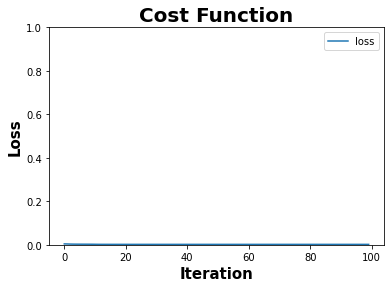

313/313 [==============================] - 0s 452us/step
TN, FP, FN, TP: 9100 50 337 513
Accuracy = 0.9613
Precesion = 0.911190053285968
Recall = 0.6035294117647059
F1 = 0.7261146496815286
F0.5 = 0.8268858800773695
F2 = 0.6472369417108251
Gmean = 0.7747460466740246
Balanced Accu. = 0.7990324654451945
################################################## 2th CV ##################################################


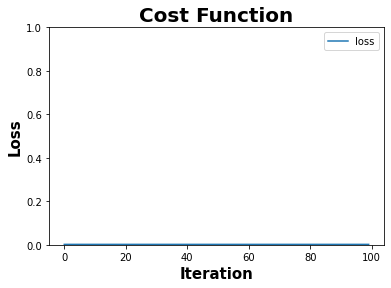

313/313 [==============================] - 0s 457us/step
TN, FP, FN, TP: 9098 52 352 498
Accuracy = 0.9596
Precesion = 0.9054545454545454
Recall = 0.5858823529411765
F1 = 0.7114285714285714
F0.5 = 0.8163934426229508
F2 = 0.6303797468354431
Gmean = 0.7632514319098522
Balanced Accu. = 0.7900996464159434
################################################## 3th CV ##################################################


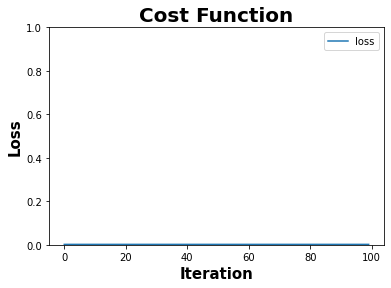

313/313 [==============================] - 0s 477us/step
TN, FP, FN, TP: 9110 40 365 485
Accuracy = 0.9595
Precesion = 0.9238095238095239
Recall = 0.5705882352941176
F1 = 0.7054545454545454
F0.5 = 0.8220338983050848
F2 = 0.6178343949044586
Gmean = 0.7537200146573113
Balanced Accu. = 0.7831083252973321
################################################## 4th CV ##################################################


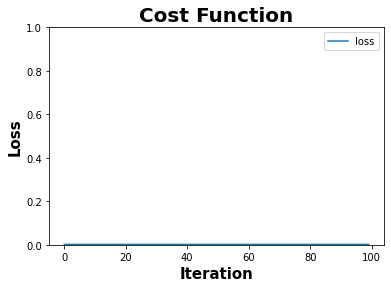

313/313 [==============================] - 0s 478us/step
TN, FP, FN, TP: 9113 37 333 517
Accuracy = 0.963
Precesion = 0.9332129963898917
Recall = 0.6082352941176471
F1 = 0.7364672364672364
F0.5 = 0.8431180691454664
F2 = 0.6537683358624179
Gmean = 0.7783159791627834
Balanced Accu. = 0.8020957891353262
################################################## 5th CV ##################################################


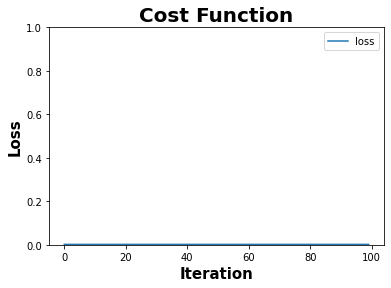

313/313 [==============================] - 0s 453us/step
TN, FP, FN, TP: 9103 47 352 498
Accuracy = 0.9601
Precesion = 0.9137614678899083
Recall = 0.5858823529411765
F1 = 0.7139784946236559
F0.5 = 0.8217821782178217
F2 = 0.6311787072243346
Gmean = 0.7634611336562357
Balanced Accu. = 0.7903728704596593
################################################## 6th CV ##################################################


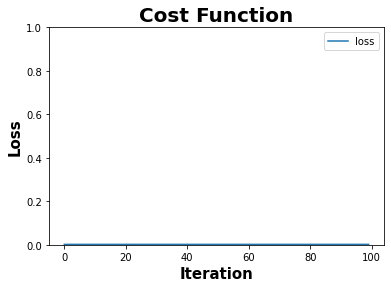

313/313 [==============================] - 0s 480us/step
TN, FP, FN, TP: 9105 45 322 528
Accuracy = 0.9633
Precesion = 0.9214659685863874
Recall = 0.6211764705882353
F1 = 0.7420941672522839
F0.5 = 0.8402291534054742
F2 = 0.66448527561037
Gmean = 0.7862070365618974
Balanced Accu. = 0.808129218900675
################################################## 7th CV ##################################################


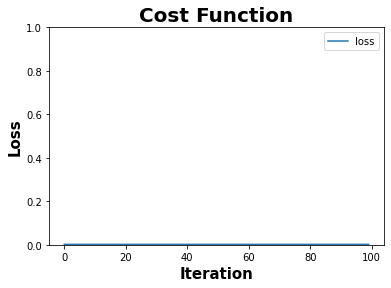

313/313 [==============================] - 0s 460us/step
TN, FP, FN, TP: 9118 32 334 516
Accuracy = 0.9634
Precesion = 0.9416058394160584
Recall = 0.6070588235294118
F1 = 0.7381974248927039
F0.5 = 0.8481262327416174
F2 = 0.6534954407294834
Gmean = 0.7777761736372002
Balanced Accu. = 0.8017807778849244
################################################## 8th CV ##################################################


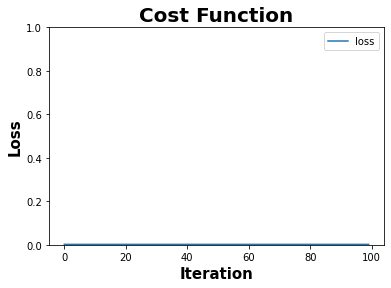

313/313 [==============================] - 0s 461us/step
TN, FP, FN, TP: 9100 50 340 510
Accuracy = 0.961
Precesion = 0.9107142857142857
Recall = 0.6
F1 = 0.723404255319149
F0.5 = 0.8252427184466019
F2 = 0.6439393939393939
Gmean = 0.77247738573722
Balanced Accu. = 0.7972677595628415
################################################## 9th CV ##################################################


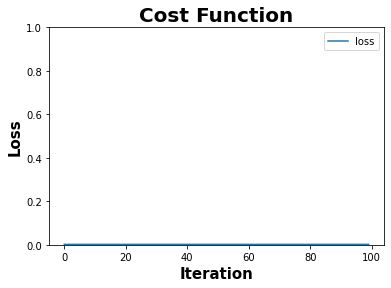

313/313 [==============================] - 0s 498us/step
TN, FP, FN, TP: 9112 38 354 496
Accuracy = 0.9608
Precesion = 0.9288389513108615
Recall = 0.5835294117647059
F1 = 0.7167630057803468
F0.5 = 0.8305425318151374
F2 = 0.630401626842908
Gmean = 0.762303096497031
Balanced Accu. = 0.7896882031501125
################################################## 10th CV ##################################################


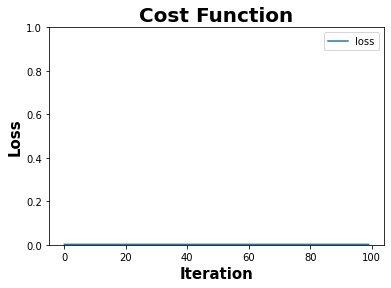

313/313 [==============================] - 0s 476us/step
TN, FP, FN, TP: 9099 51 335 515
Accuracy = 0.9614
Precesion = 0.9098939929328622
Recall = 0.6058823529411764
F1 = 0.7274011299435028
F0.5 = 0.8269107257546564
F2 = 0.6492687846696924
Gmean = 0.776212151258178
Balanced Accu. = 0.8001542912246866


In [165]:
acc_acc = []
acc_f1 = []
acc_f5 = []
acc_f2 = []
acc_gmean = []
acc_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // Accuracy) ##############################
batch_size = int(X.shape[0]*0.9 * 0.05)   # 
print('batch_size: ', batch_size)
learning_rate = 0.005

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(diab_df, diab_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=Ours_Accu, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    acc_acc.append((TP+TN)/(TP+TN+FP+FN))
    acc_f1.append(TP / (TP + 0.5*(FP+FN)))
    acc_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    acc_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    acc_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    acc_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [166]:
res['AccAim'] = [np.mean(acc_acc), np.mean(acc_f1), np.mean(acc_f5), np.mean(acc_f2), np.mean(acc_gmean), np.mean(acc_bacc)]
res

Delta       BCE    AccAim     F1Aim    F.5Aim     F2Aim      GAim  \
Acc    0.955990  0.960370  0.961340  0.960310  0.960760  0.938710  0.625220   
F1     0.654638  0.716911  0.724130  0.736366  0.703492  0.691992  0.411919   
F.5    0.763805  0.822820  0.830126  0.798253  0.848006  0.636793  0.321311   
F2     0.577897  0.635263  0.642199  0.683452  0.601133  0.757878  0.587090   
Gmean  0.714728  0.766348  0.770847  0.803085  0.739861  0.877184  0.618012   
B_Acc  0.765876  0.792601  0.796173  0.820582  0.773552  0.880067  0.768469   

           BAim  
Acc    0.085000  
F1     0.156682  
F.5    0.104039  
F2     0.317164  
Gmean  0.000000  
B_Acc  0.500000

batch_size:  4500
################################################## 1th CV ##################################################


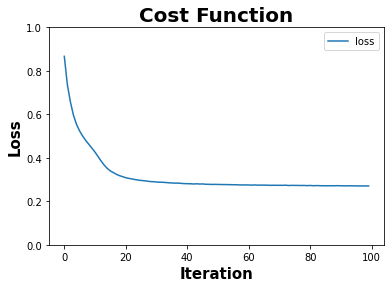

313/313 [==============================] - 0s 493us/step
TN, FP, FN, TP: 9074 76 304 546
Accuracy = 0.962
Precesion = 0.8778135048231511
Recall = 0.6423529411764706
F1 = 0.7418478260869565
F0.5 = 0.8178550029958059
F2 = 0.6787667826951764
Gmean = 0.798133792435083
Balanced Accu. = 0.8170234651237545
################################################## 2th CV ##################################################


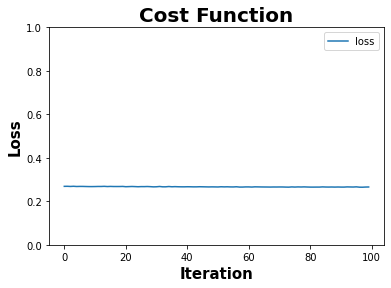

313/313 [==============================] - 0s 463us/step
TN, FP, FN, TP: 9035 115 294 556
Accuracy = 0.9591
Precesion = 0.8286140089418778
Recall = 0.6541176470588236
F1 = 0.7310979618671927
F0.5 = 0.7866440294284098
F2 = 0.6828788995332842
Gmean = 0.8036768606246166
Balanced Accu. = 0.8207746705239474
################################################## 3th CV ##################################################


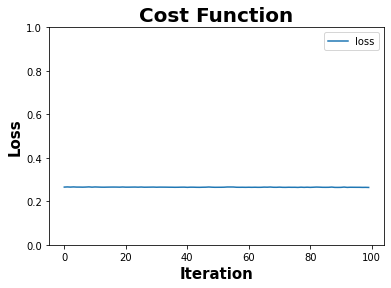

313/313 [==============================] - 0s 458us/step
TN, FP, FN, TP: 9043 107 299 551
Accuracy = 0.9594
Precesion = 0.837386018237082
Recall = 0.648235294117647
F1 = 0.7307692307692307
F0.5 = 0.7912119471568064
F2 = 0.6789058649581075
Gmean = 0.8004091689084865
Balanced Accu. = 0.8182706525233043
################################################## 4th CV ##################################################


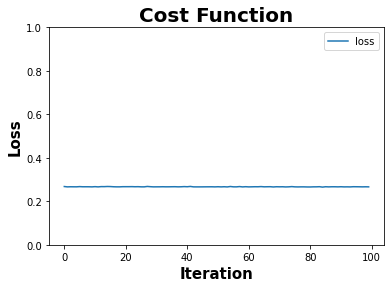

313/313 [==============================] - 0s 450us/step
TN, FP, FN, TP: 9061 89 281 569
Accuracy = 0.963
Precesion = 0.8647416413373861
Recall = 0.6694117647058824
F1 = 0.7546419098143236
F0.5 = 0.8170591614014933
F2 = 0.7010842779694432
Gmean = 0.814187046352426
Balanced Accu. = 0.8298424943747991
################################################## 5th CV ##################################################


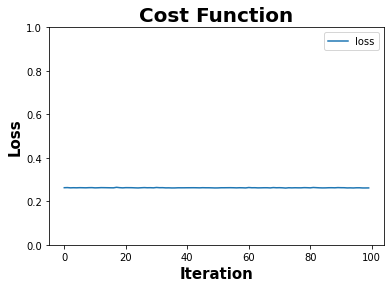

313/313 [==============================] - 0s 452us/step
TN, FP, FN, TP: 9050 100 310 540
Accuracy = 0.959
Precesion = 0.84375
Recall = 0.6352941176470588
F1 = 0.7248322147651006
F0.5 = 0.7917888563049853
F2 = 0.6683168316831684
Gmean = 0.7926859482393781
Balanced Accu. = 0.8121825779492124
################################################## 6th CV ##################################################


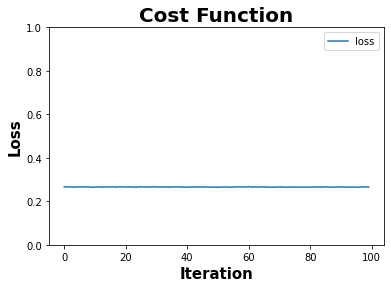

313/313 [==============================] - 0s 449us/step
TN, FP, FN, TP: 9048 102 275 575
Accuracy = 0.9623
Precesion = 0.8493353028064993
Recall = 0.6764705882352942
F1 = 0.7531106745252129
F0.5 = 0.8080382237211916
F2 = 0.7051753740495462
Gmean = 0.8178811677919579
Balanced Accu. = 0.8326615236258438
################################################## 7th CV ##################################################


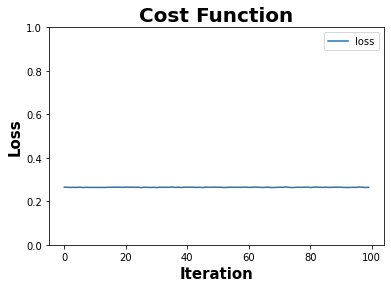

313/313 [==============================] - 0s 513us/step
TN, FP, FN, TP: 9040 110 284 566
Accuracy = 0.9606
Precesion = 0.8372781065088757
Recall = 0.6658823529411765
F1 = 0.7418086500655308
F0.5 = 0.7962858750703433
F2 = 0.6943081452404317
Gmean = 0.811096301249336
Balanced Accu. = 0.8269302475088396
################################################## 8th CV ##################################################


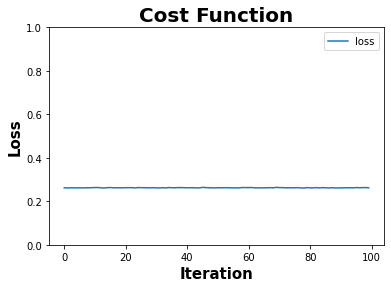

313/313 [==============================] - 0s 457us/step
TN, FP, FN, TP: 9044 106 307 543
Accuracy = 0.9587
Precesion = 0.8366718027734977
Recall = 0.6388235294117647
F1 = 0.7244829886591061
F0.5 = 0.7878699941961695
F2 = 0.6705359347987156
Gmean = 0.7946212625016223
Balanced Accu. = 0.8136194149791064
################################################## 9th CV ##################################################


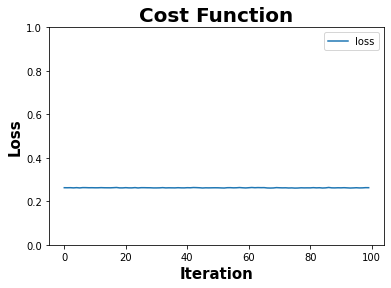

313/313 [==============================] - 0s 458us/step
TN, FP, FN, TP: 9042 108 306 544
Accuracy = 0.9586
Precesion = 0.8343558282208589
Recall = 0.64
F1 = 0.7243675099866844
F0.5 = 0.7865818392134182
F2 = 0.6712734452122407
Gmean = 0.7952646739541146
Balanced Accu. = 0.8140983606557377
################################################## 10th CV ##################################################


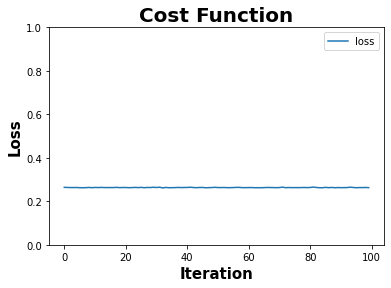

313/313 [==============================] - 0s 448us/step
TN, FP, FN, TP: 9050 100 296 554
Accuracy = 0.9604
Precesion = 0.8470948012232415
Recall = 0.6517647058823529
F1 = 0.7367021276595744
F0.5 = 0.7991921523369878
F2 = 0.6832757770103601
Gmean = 0.8028957555888904
Balanced Accu. = 0.8204178720668596


In [155]:
f1_acc = []
f1_f1 = []
f1_f5 = []
f1_f2 = []
f1_gmean = []
f1_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // F1) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)   # 
print('batch_size: ', batch_size)
learning_rate=0.003

beta = 1
model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(diab_df, diab_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)

    model.compile(loss=Ours_Fbeta, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    f1_acc.append((TP+TN)/(TP+TN+FP+FN))
    f1_f1.append(TP / (TP + 0.5*(FP+FN)))
    f1_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f1_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f1_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f1_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [156]:
res['F1Aim'] = [np.mean(f1_acc), np.mean(f1_f1), np.mean(f1_f5), np.mean(f1_f2), np.mean(f1_gmean), np.mean(f1_bacc)]
res

Delta       BCE    AccAim     F1Aim  F.5Aim  F2Aim  GAim  BAim
Acc    0.955990  0.960370  0.864760  0.960310       0      0     0     0
F1     0.654638  0.716911  0.524822  0.736366       0      0     0     0
F.5    0.763805  0.822820  0.594199  0.798253       0      0     0     0
F2     0.577897  0.635263  0.483179  0.683452       0      0     0     0
Gmean  0.714728  0.766348  0.540799  0.803085       0      0     0     0
B_Acc  0.765876  0.792601  0.708287  0.820582       0      0     0     0

batch_size:  4500
################################################## 1th CV ##################################################


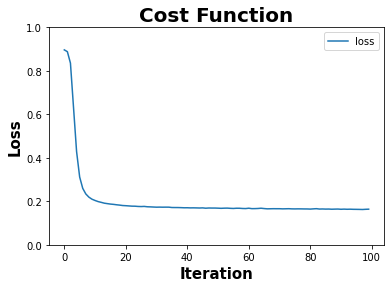

313/313 [==============================] - 0s 434us/step
TN, FP, FN, TP: 9143 7 399 451
Accuracy = 0.9594
Precesion = 0.9847161572052402
Recall = 0.5305882352941177
F1 = 0.6896024464831805
F0.5 = 0.8407904548844145
F2 = 0.5844997407983411
Gmean = 0.7281361965986661
Balanced Accu. = 0.7649116039858567
################################################## 2th CV ##################################################


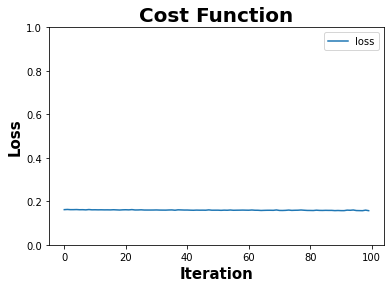

313/313 [==============================] - 0s 471us/step
TN, FP, FN, TP: 9138 12 382 468
Accuracy = 0.9606
Precesion = 0.975
Recall = 0.5505882352941176
F1 = 0.7037593984962406
F0.5 = 0.8447653429602888
F2 = 0.6030927835051546
Gmean = 0.7415296031599712
Balanced Accu. = 0.7746383799421408
################################################## 3th CV ##################################################


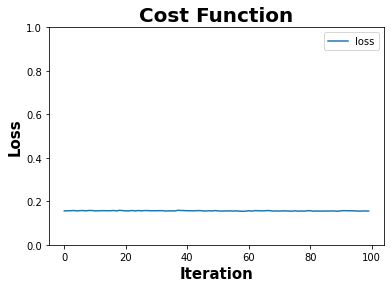

313/313 [==============================] - 0s 482us/step
TN, FP, FN, TP: 9141 9 404 446
Accuracy = 0.9587
Precesion = 0.9802197802197802
Recall = 0.5247058823529411
F1 = 0.6835249042145594
F0.5 = 0.8352059925093633
F2 = 0.5784695201037614
Gmean = 0.7240095152733591
Balanced Accu. = 0.761861137897782
################################################## 4th CV ##################################################


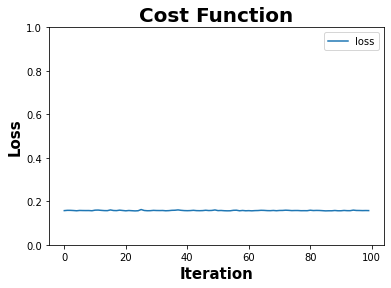

313/313 [==============================] - 0s 468us/step
TN, FP, FN, TP: 9145 5 371 479
Accuracy = 0.9624
Precesion = 0.9896694214876033
Recall = 0.5635294117647058
F1 = 0.7181409295352323
F0.5 = 0.8596554199569274
F2 = 0.6166323377960865
Gmean = 0.7504808273336738
Balanced Accu. = 0.7814914818386371
################################################## 5th CV ##################################################


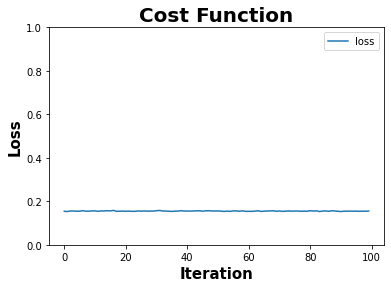

313/313 [==============================] - 0s 451us/step
TN, FP, FN, TP: 9140 10 386 464
Accuracy = 0.9604
Precesion = 0.9789029535864979
Recall = 0.5458823529411765
F1 = 0.7009063444108762
F0.5 = 0.8448652585579023
F2 = 0.5988642230252968
Gmean = 0.7384346688812231
Balanced Accu. = 0.7723947283831565
################################################## 6th CV ##################################################


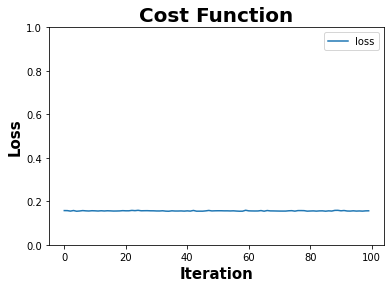

313/313 [==============================] - 0s 436us/step
TN, FP, FN, TP: 9139 11 360 490
Accuracy = 0.9629
Precesion = 0.9780439121756487
Recall = 0.5764705882352941
F1 = 0.7253886010362695
F0.5 = 0.8584442887175894
F2 = 0.6280440912586516
Gmean = 0.7588000813682153
Balanced Accu. = 0.7876342012214721
################################################## 7th CV ##################################################


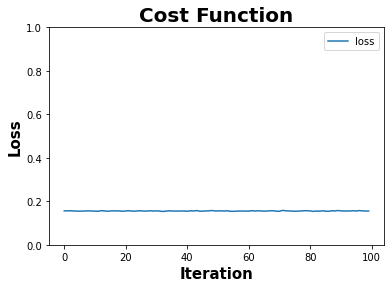

313/313 [==============================] - 0s 447us/step
TN, FP, FN, TP: 9141 9 371 479
Accuracy = 0.962
Precesion = 0.9815573770491803
Recall = 0.5635294117647058
F1 = 0.7159940209267563
F0.5 = 0.8547466095645968
F2 = 0.6159979423868313
Gmean = 0.7503166801691264
Balanced Accu. = 0.7812729026036644
################################################## 8th CV ##################################################


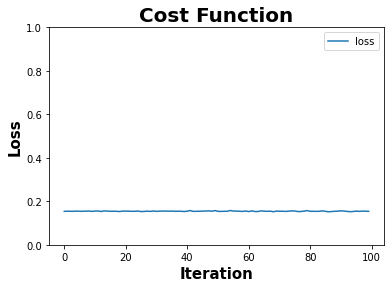

313/313 [==============================] - 0s 441us/step
TN, FP, FN, TP: 9144 6 385 465
Accuracy = 0.9609
Precesion = 0.9872611464968153
Recall = 0.5470588235294118
F1 = 0.7040121120363361
F0.5 = 0.8504023408924654
F2 = 0.6006199948333764
Gmean = 0.7393917070349216
Balanced Accu. = 0.773201542912247
################################################## 9th CV ##################################################


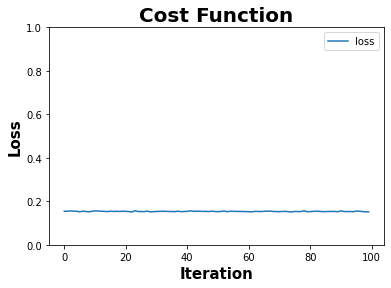

313/313 [==============================] - 0s 442us/step
TN, FP, FN, TP: 9144 6 400 450
Accuracy = 0.9594
Precesion = 0.9868421052631579
Recall = 0.5294117647058824
F1 = 0.6891271056661562
F0.5 = 0.8414360508601347
F2 = 0.58350622406639
Gmean = 0.7273682763568518
Balanced Accu. = 0.7643780135004822
################################################## 10th CV ##################################################


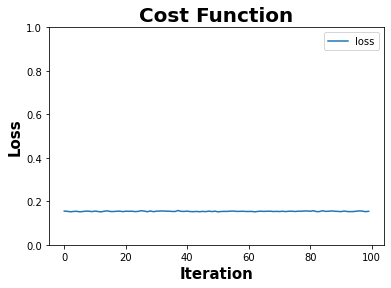

313/313 [==============================] - 0s 462us/step
TN, FP, FN, TP: 9143 7 384 466
Accuracy = 0.9609
Precesion = 0.985200845665962
Recall = 0.548235294117647
F1 = 0.7044595616024187
F0.5 = 0.8497447118891319
F2 = 0.6016008262328943
Gmean = 0.7401458499096922
Balanced Accu. = 0.7737351333976213


In [157]:
f05_acc = []
f05_f1 = []
f05_f5 = []
f05_f2 = []
f05_gmean = []
f05_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // F0.5) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)   # 
print('batch_size: ', batch_size)
learning_rate=0.005

beta = 0.5
model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(diab_df, diab_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=Ours_Fbeta, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    f05_acc.append((TP+TN)/(TP+TN+FP+FN))
    f05_f1.append(TP / (TP + 0.5*(FP+FN)))
    f05_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f05_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f05_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f05_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [158]:
res['F.5Aim'] = [np.mean(f05_acc), np.mean(f05_f1), np.mean(f05_f5), np.mean(f05_f2), np.mean(f05_gmean), np.mean(f05_bacc)]
res

Delta       BCE    AccAim     F1Aim    F.5Aim  F2Aim  GAim  BAim
Acc    0.955990  0.960370  0.864760  0.960310  0.960760      0     0     0
F1     0.654638  0.716911  0.524822  0.736366  0.703492      0     0     0
F.5    0.763805  0.822820  0.594199  0.798253  0.848006      0     0     0
F2     0.577897  0.635263  0.483179  0.683452  0.601133      0     0     0
Gmean  0.714728  0.766348  0.540799  0.803085  0.739861      0     0     0
B_Acc  0.765876  0.792601  0.708287  0.820582  0.773552      0     0     0

batch_size:  4500
################################################## 1th CV ##################################################


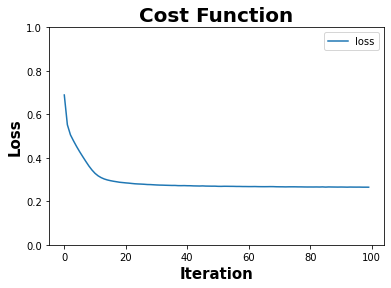

313/313 [==============================] - 0s 458us/step
TN, FP, FN, TP: 8666 484 165 685
Accuracy = 0.9351
Precesion = 0.5859709153122327
Recall = 0.8058823529411765
F1 = 0.6785537394749876
F0.5 = 0.6197973217517191
F2 = 0.7496169840227621
Gmean = 0.8736442405697422
Balanced Accu. = 0.8764930890388942
################################################## 2th CV ##################################################


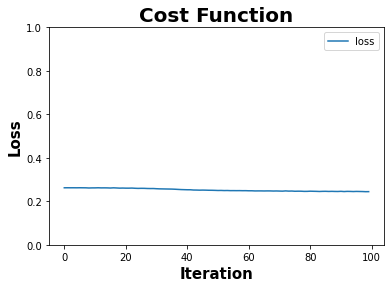

313/313 [==============================] - 0s 456us/step
TN, FP, FN, TP: 8749 401 183 667
Accuracy = 0.9416
Precesion = 0.6245318352059925
Recall = 0.7847058823529411
F1 = 0.6955161626694474
F0.5 = 0.6511128465443187
F2 = 0.7464189794091316
Gmean = 0.8662078502637611
Balanced Accu. = 0.8704403728704597
################################################## 3th CV ##################################################


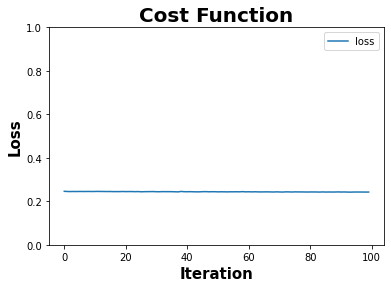

313/313 [==============================] - 0s 456us/step
TN, FP, FN, TP: 8730 420 170 680
Accuracy = 0.941
Precesion = 0.6181818181818182
Recall = 0.8
F1 = 0.6974358974358974
F0.5 = 0.6476190476190476
F2 = 0.7555555555555555
Gmean = 0.8736582218033493
Balanced Accu. = 0.8770491803278688
################################################## 4th CV ##################################################


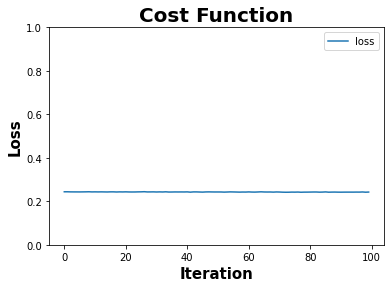

313/313 [==============================] - 0s 459us/step
TN, FP, FN, TP: 8713 437 156 694
Accuracy = 0.9407
Precesion = 0.6136162687886826
Recall = 0.8164705882352942
F1 = 0.7006562342251388
F0.5 = 0.6457015258652773
F2 = 0.7658353564334583
Gmean = 0.8817461708837808
Balanced Accu. = 0.8843555126968821
################################################## 5th CV ##################################################


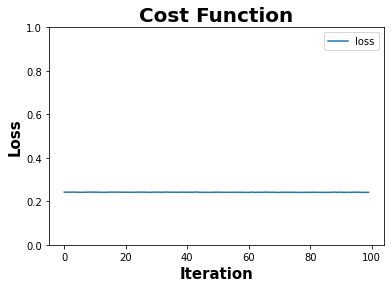

313/313 [==============================] - 0s 448us/step
TN, FP, FN, TP: 8732 418 169 681
Accuracy = 0.9413
Precesion = 0.6196542311191993
Recall = 0.8011764705882353
F1 = 0.6988199076449462
F0.5 = 0.6490659550133435
F2 = 0.7568348521893754
Gmean = 0.8744005247735185
Balanced Accu. = 0.8777467052394728
################################################## 6th CV ##################################################


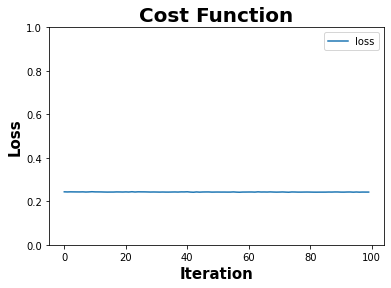

313/313 [==============================] - 0s 499us/step
TN, FP, FN, TP: 8712 438 139 711
Accuracy = 0.9423
Precesion = 0.618798955613577
Recall = 0.8364705882352941
F1 = 0.7113556778389195
F0.5 = 0.652772677194271
F2 = 0.7814904374587821
Gmean = 0.8924291014196882
Balanced Accu. = 0.8943008678881388
################################################## 7th CV ##################################################


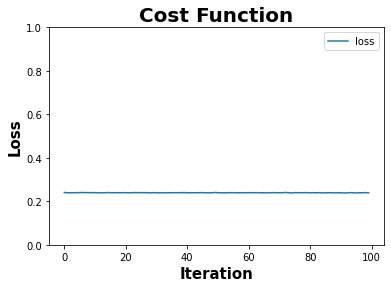

313/313 [==============================] - 0s 475us/step
TN, FP, FN, TP: 8680 470 162 688
Accuracy = 0.9368
Precesion = 0.5941278065630398
Recall = 0.8094117647058824
F1 = 0.6852589641434262
F0.5 = 0.6275082086829624
F2 = 0.7547169811320754
Gmean = 0.8762621883281668
Balanced Accu. = 0.8790228222436516
################################################## 8th CV ##################################################


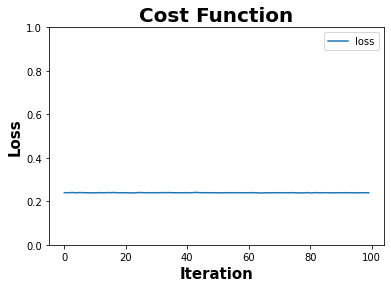

313/313 [==============================] - 0s 465us/step
TN, FP, FN, TP: 8723 427 166 684
Accuracy = 0.9407
Precesion = 0.6156615661566157
Recall = 0.8047058823529412
F1 = 0.6976032636409994
F0.5 = 0.646014355874575
F2 = 0.7581467523830636
Gmean = 0.8758726740665396
Balanced Accu. = 0.8790196078431373
################################################## 9th CV ##################################################


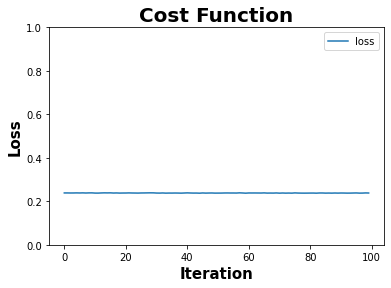

313/313 [==============================] - 0s 446us/step
TN, FP, FN, TP: 8651 499 164 686
Accuracy = 0.9337
Precesion = 0.5789029535864979
Recall = 0.8070588235294117
F1 = 0.6742014742014742
F0.5 = 0.6135957066189625
F2 = 0.7480916030534351
Gmean = 0.8735247286844673
Balanced Accu. = 0.8762616522018642
################################################## 10th CV ##################################################


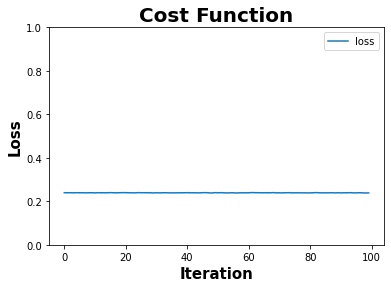

313/313 [==============================] - 0s 437us/step
TN, FP, FN, TP: 8635 515 146 704
Accuracy = 0.9339
Precesion = 0.5775225594749795
Recall = 0.8282352941176471
F1 = 0.680521991300145
F0.5 = 0.6147397834439399
F2 = 0.7620697120588873
Gmean = 0.8840920608731896
Balanced Accu. = 0.8859755705560912


In [159]:
f2_acc = []
f2_f1 = []
f2_f5 = []
f2_f2 = []
f2_gmean = []
f2_bacc = []

n_iter=0
    
###################### MLP (sigmoid // sigmoid // F2) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.05)   # 
print('batch_size: ', batch_size)
learning_rate=0.003

beta = 2
model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)
    
for train_index, test_index in skf.split(diab_df, diab_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
    
    model.compile(loss=Ours_Fbeta, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    f2_acc.append((TP+TN)/(TP+TN+FP+FN))
    f2_f1.append(TP / (TP + 0.5*(FP+FN)))
    f2_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    f2_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    f2_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    f2_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [160]:
res['F2Aim'] = [np.mean(f2_acc), np.mean(f2_f1), np.mean(f2_f5), np.mean(f2_f2), np.mean(f2_gmean), np.mean(f2_bacc)]
res

Delta       BCE    AccAim     F1Aim    F.5Aim     F2Aim  GAim  BAim
Acc    0.955990  0.960370  0.864760  0.960310  0.960760  0.938710     0     0
F1     0.654638  0.716911  0.524822  0.736366  0.703492  0.691992     0     0
F.5    0.763805  0.822820  0.594199  0.798253  0.848006  0.636793     0     0
F2     0.577897  0.635263  0.483179  0.683452  0.601133  0.757878     0     0
Gmean  0.714728  0.766348  0.540799  0.803085  0.739861  0.877184     0     0
B_Acc  0.765876  0.792601  0.708287  0.820582  0.773552  0.880067     0     0

batch_size:  45000
################################################## 1th CV ##################################################


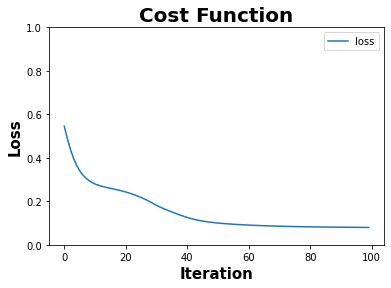

313/313 [==============================] - 0s 480us/step
TN, FP, FN, TP: 7468 1682 45 805
Accuracy = 0.8273
Precesion = 0.32368315239244067
Recall = 0.9470588235294117
F1 = 0.4824692837878334
F0.5 = 0.3727542137432857
F2 = 0.6837098692033293
Gmean = 0.8791846256131285
Balanced Accu. = 0.881616843458695
################################################## 2th CV ##################################################


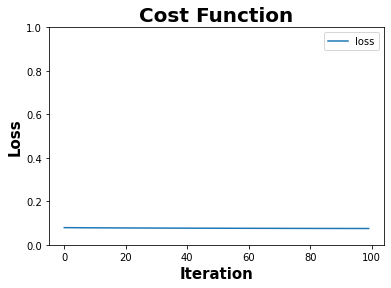

313/313 [==============================] - 0s 463us/step
TN, FP, FN, TP: 7549 1601 61 789
Accuracy = 0.8338
Precesion = 0.3301255230125523
Recall = 0.928235294117647
F1 = 0.48703703703703705
F0.5 = 0.37896253602305474
F2 = 0.6813471502590673
Gmean = 0.8751111239534763
Balanced Accu. = 0.8766313082610093
################################################## 3th CV ##################################################


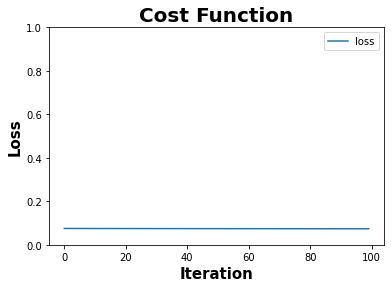

313/313 [==============================] - 0s 463us/step
TN, FP, FN, TP: 7649 1501 58 792
Accuracy = 0.8441
Precesion = 0.3453990405582207
Recall = 0.9317647058823529
F1 = 0.5039770919503659
F0.5 = 0.3951307124326482
F2 = 0.6955910767609343
Gmean = 0.8825613640049794
Balanced Accu. = 0.8838604950176792
################################################## 4th CV ##################################################


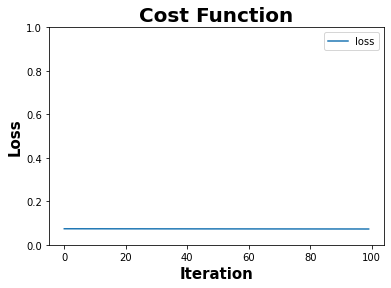

313/313 [==============================] - 0s 462us/step
TN, FP, FN, TP: 7600 1550 53 797
Accuracy = 0.8397
Precesion = 0.3395824456753302
Recall = 0.9376470588235294
F1 = 0.49859243040350326
F0.5 = 0.3892361789411995
F2 = 0.6934052549156081
Gmean = 0.8825025052710658
Balanced Accu. = 0.8841240758598521
################################################## 5th CV ##################################################


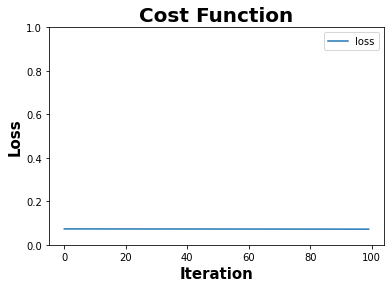

313/313 [==============================] - 0s 445us/step
TN, FP, FN, TP: 7706 1444 55 795
Accuracy = 0.8501
Precesion = 0.3550692273336311
Recall = 0.9352941176470588
F1 = 0.5147296859825187
F0.5 = 0.4053640628186824
F2 = 0.7049122184784536
Gmean = 0.8875198124834324
Balanced Accu. = 0.8887399549983928
################################################## 6th CV ##################################################


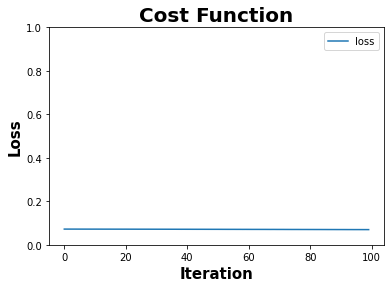

313/313 [==============================] - 0s 449us/step
TN, FP, FN, TP: 7906 1244 54 796
Accuracy = 0.8702
Precesion = 0.39019607843137255
Recall = 0.9364705882352942
F1 = 0.5508650519031142
F0.5 = 0.44173140954495005
F2 = 0.7316176470588235
Gmean = 0.899528502516871
Balanced Accu. = 0.9002571520411444
################################################## 7th CV ##################################################


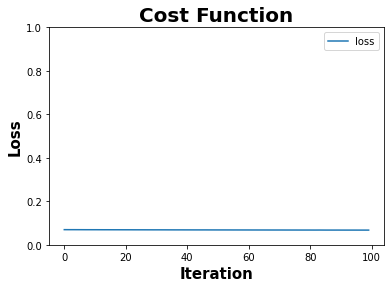

313/313 [==============================] - 0s 471us/step
TN, FP, FN, TP: 7993 1157 66 784
Accuracy = 0.8777
Precesion = 0.4039155074703761
Recall = 0.9223529411764706
F1 = 0.5618058043711931
F0.5 = 0.4550731367541212
F2 = 0.7339449541284403
Gmean = 0.8976208419080454
Balanced Accu. = 0.8979524268723883
################################################## 8th CV ##################################################


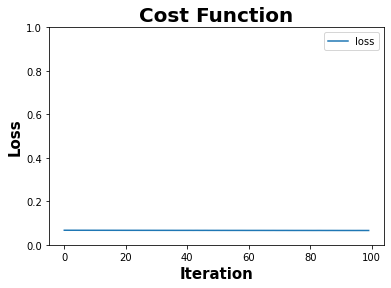

313/313 [==============================] - 0s 487us/step
TN, FP, FN, TP: 8161 989 101 749
Accuracy = 0.891
Precesion = 0.43095512082853854
Recall = 0.8811764705882353
F1 = 0.5788253477588872
F0.5 = 0.48000512689054087
F2 = 0.728882833787466
Gmean = 0.8865282674642581
Balanced Accu. = 0.8865445194471231
################################################## 9th CV ##################################################


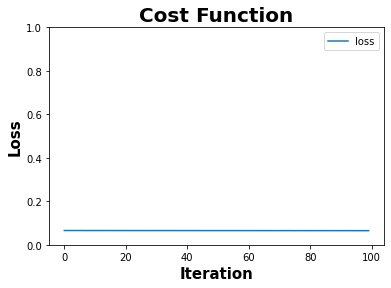

313/313 [==============================] - 0s 490us/step
TN, FP, FN, TP: 8219 931 100 750
Accuracy = 0.8969
Precesion = 0.446162998215348
Recall = 0.8823529411764706
F1 = 0.5926511260371394
F0.5 = 0.4951148666490625
F2 = 0.7380436921865774
Gmean = 0.8902666650009746
Balanced Accu. = 0.8903021536483446
################################################## 10th CV ##################################################


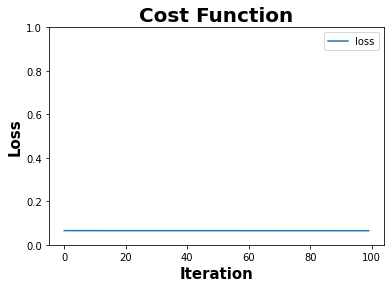

313/313 [==============================] - 0s 446us/step
TN, FP, FN, TP: 8230 920 101 749
Accuracy = 0.8979
Precesion = 0.4487717195925704
Recall = 0.8811764705882353
F1 = 0.5946804287415641
F0.5 = 0.4976082912569758
F2 = 0.7388044979285856
Gmean = 0.8902681092414627
Balanced Accu. = 0.8903150112504018


In [167]:
gmean_acc = []
gmean_f1 = []
gmean_f5 = []
gmean_f2 = []
gmean_gmean = []
gmean_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // Gmean) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.5)   # 
print('batch_size: ', batch_size)
learning_rate=0.01

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(diab_df, diab_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
        
    model.compile(loss=Ours_Gmean, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=batch_size)
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    gmean_acc.append((TP+TN)/(TP+TN+FP+FN))
    gmean_f1.append(TP / (TP + 0.5*(FP+FN)))
    gmean_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    gmean_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    gmean_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    gmean_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [168]:
res['GAim'] = [np.mean(gmean_acc), np.mean(gmean_f1), np.mean(gmean_f5), np.mean(gmean_f2), np.mean(gmean_gmean), np.mean(gmean_bacc)]
res

Delta       BCE    AccAim     F1Aim    F.5Aim     F2Aim      GAim  \
Acc    0.955990  0.960370  0.961340  0.960310  0.960760  0.938710  0.862870   
F1     0.654638  0.716911  0.724130  0.736366  0.703492  0.691992  0.536563   
F.5    0.763805  0.822820  0.830126  0.798253  0.848006  0.636793  0.431098   
F2     0.577897  0.635263  0.642199  0.683452  0.601133  0.757878  0.713026   
Gmean  0.714728  0.766348  0.770847  0.803085  0.739861  0.877184  0.887109   
B_Acc  0.765876  0.792601  0.796173  0.820582  0.773552  0.880067  0.888034   

           BAim  
Acc    0.085000  
F1     0.156682  
F.5    0.104039  
F2     0.317164  
Gmean  0.000000  
B_Acc  0.500000

batch_size:  45000
################################################## 1th CV ##################################################


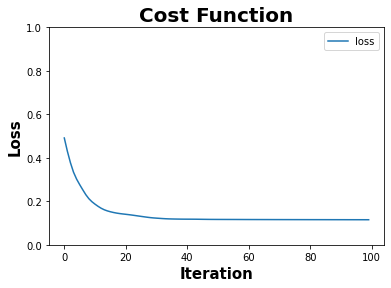

313/313 [==============================] - 0s 440us/step
TN, FP, FN, TP: 7882 1268 68 782
Accuracy = 0.8664
Precesion = 0.38146341463414635
Recall = 0.92
F1 = 0.5393103448275862
F0.5 = 0.4320441988950276
F2 = 0.7174311926605504
Gmean = 0.8902286806350022
Balanced Accu. = 0.8907103825136613
################################################## 2th CV ##################################################


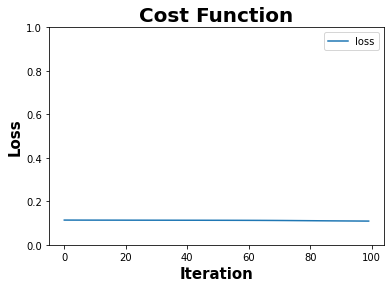

313/313 [==============================] - 0s 450us/step
TN, FP, FN, TP: 8181 969 111 739
Accuracy = 0.892
Precesion = 0.43266978922716626
Recall = 0.8694117647058823
F1 = 0.5777951524628616
F0.5 = 0.48099453267378284
F2 = 0.7233750978856696
Gmean = 0.8816686642715286
Balanced Accu. = 0.8817550626808099
################################################## 3th CV ##################################################


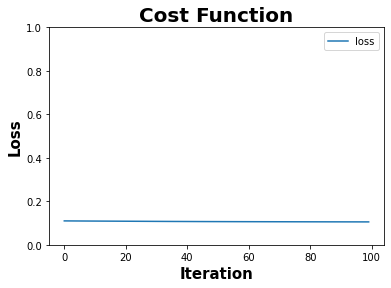

313/313 [==============================] - 0s 454us/step
TN, FP, FN, TP: 8485 665 129 721
Accuracy = 0.9206
Precesion = 0.5202020202020202
Recall = 0.8482352941176471
F1 = 0.644901610017889
F0.5 = 0.5638098217078511
F2 = 0.753238612620142
Gmean = 0.8868977350371433
Balanced Accu. = 0.8877788492446159
################################################## 4th CV ##################################################


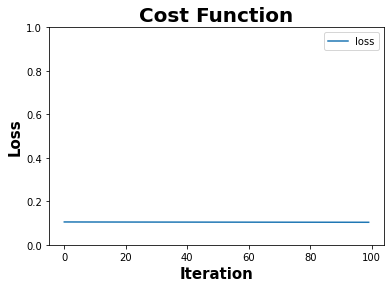

313/313 [==============================] - 0s 468us/step
TN, FP, FN, TP: 8639 511 154 696
Accuracy = 0.9335
Precesion = 0.5766362883181442
Recall = 0.8188235294117647
F1 = 0.6767136606708799
F0.5 = 0.6128918633321593
F2 = 0.7553722596049489
Gmean = 0.8792580373469163
Balanced Accu. = 0.8814882674381228
################################################## 5th CV ##################################################


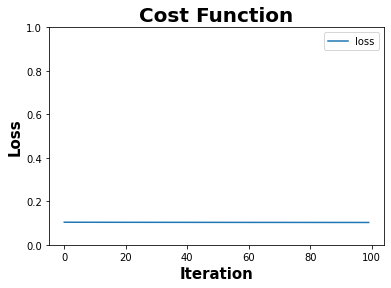

313/313 [==============================] - 0s 476us/step
TN, FP, FN, TP: 8723 427 170 680
Accuracy = 0.9403
Precesion = 0.6142728093947606
Recall = 0.8
F1 = 0.6949412365866121
F0.5 = 0.6441834028040925
F2 = 0.7543820723319281
Gmean = 0.8733078876700168
Balanced Accu. = 0.8766666666666667
################################################## 6th CV ##################################################


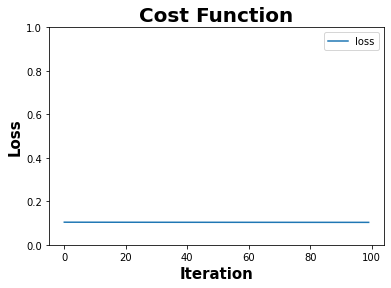

313/313 [==============================] - 1s 2ms/step
TN, FP, FN, TP: 8721 429 151 699
Accuracy = 0.942
Precesion = 0.6196808510638298
Recall = 0.8223529411764706
F1 = 0.7067745197168858
F0.5 = 0.6518090264826557
F2 = 0.7718639575971732
Gmean = 0.8853229474668978
Balanced Accu. = 0.8877338476374157
################################################## 7th CV ##################################################


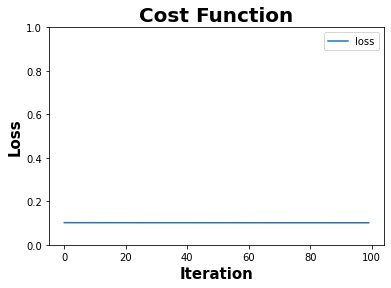

313/313 [==============================] - 0s 465us/step
TN, FP, FN, TP: 8737 413 171 679
Accuracy = 0.9416
Precesion = 0.6217948717948718
Recall = 0.7988235294117647
F1 = 0.6992790937178167
F0.5 = 0.6506324262169413
F2 = 0.7557880676758681
Gmean = 0.8733655258199596
Balanced Accu. = 0.8768434586949534
################################################## 8th CV ##################################################


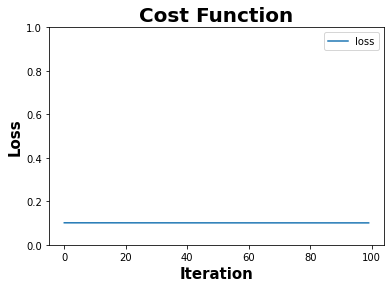

313/313 [==============================] - 0s 467us/step
TN, FP, FN, TP: 8770 380 198 652
Accuracy = 0.9422
Precesion = 0.6317829457364341
Recall = 0.7670588235294118
F1 = 0.6928799149840595
F0.5 = 0.6548814785054239
F2 = 0.7355595667870036
Gmean = 0.8574396938983246
Balanced Accu. = 0.8627643844423015
################################################## 9th CV ##################################################


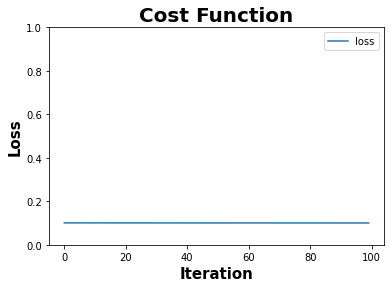

313/313 [==============================] - 0s 455us/step
TN, FP, FN, TP: 8784 366 194 656
Accuracy = 0.944
Precesion = 0.6418786692759295
Recall = 0.7717647058823529
F1 = 0.7008547008547008
F0.5 = 0.6642365330093156
F2 = 0.741745816372682
Gmean = 0.8607520651424885
Balanced Accu. = 0.8658823529411764
################################################## 10th CV ##################################################


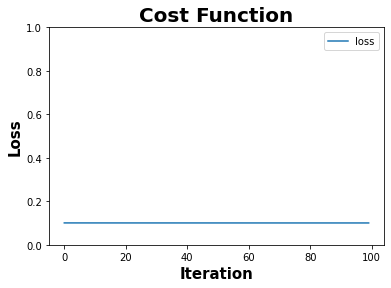

313/313 [==============================] - 0s 439us/step
TN, FP, FN, TP: 8772 378 198 652
Accuracy = 0.9424
Precesion = 0.6330097087378641
Recall = 0.7670588235294118
F1 = 0.6936170212765957
F0.5 = 0.6559356136820925
F2 = 0.7358916478555305
Gmean = 0.8575374579592886
Balanced Accu. = 0.8628736740597879


In [169]:
bacc_acc = []
bacc_f1 = []
bacc_f5 = []
bacc_f2 = []
bacc_gmean = []
bacc_bacc = []

n_iter=0

###################### MLP (sigmoid // sigmoid // Balanced Accuracy) ############################## 
batch_size = int(X.shape[0]*0.9 * 0.5)   # 
print('batch_size: ', batch_size)
learning_rate=0.07

model = Sequential()
model.add(Dense(hidden_node, input_dim=X.shape[1], kernel_initializer=kernel_initializer))
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dense(1, activation='sigmoid'))
opt = optimizers.Adam(learning_rate = learning_rate)   # SGD(learning_rate=learning_rate, momentum=momentum)

for train_index, test_index in skf.split(diab_df, diab_df.iloc[:, -1]):
    n_iter += 1
    X_train = X.iloc[train_index]
    y_train= y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test= y.iloc[test_index]
    print('#'*50,'{0}th CV'.format(n_iter),'#'*50)
#     print('Labels for train:\n', label_train.value_counts())
#     print('Labels for test:\n', label_test.value_counts())
#     print(len(X_train), len(y_train), len(X_test), len(y_test))
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    y_train = y_train.astype(float)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    y_test = y_test.astype(float)
     
    model.compile(loss=Ours_BAccu, optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=0, batch_size=X_train.shape[0])
    plt.plot(history.history['loss'], label='loss')
    plt.ylim([0, 1])
    plt.xlabel('Iteration',fontweight="bold",fontsize = 15)
    plt.ylabel('Loss',fontweight="bold",fontsize = 15)
    plt.title("Cost Function",fontweight="bold",fontsize = 20)
    plt.legend()
    plt.show()    
    predicted = []
    result = 1/(1+tf.math.exp(-L*(model.predict(X_test)-0.5)))
    for i in range(X_test.shape[0]):
        if result[i] <= threshold:
            predicted.append(0)
        else:
            predicted.append(1)
    TN = metrics.confusion_matrix(y_test, predicted)[0,0]
    FP = metrics.confusion_matrix(y_test, predicted)[0,1]
    FN = metrics.confusion_matrix(y_test, predicted)[1,0]
    TP = metrics.confusion_matrix(y_test, predicted)[1,1]
    print("TN, FP, FN, TP:", TN, FP, FN, TP)
    print('Accuracy =', (TP+TN)/(TP+TN+FP+FN))
    print('Precesion =', TP/(TP+FP))
    print('Recall =', TP/(TP+FN))
    print('F1 =', TP / (TP + 0.5*(FP+FN)))
    print('F0.5 =', TP / (TP + 0.8*FP + 0.2*FN))
    print('F2 =', TP / (TP + 0.2*FP + 0.8*FN))
    print('Gmean =', ((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    print('Balanced Accu. =', 0.5*(TP/(TP+FN) + TN/(TN+FP)))
    bacc_acc.append((TP+TN)/(TP+TN+FP+FN))
    bacc_f1.append(TP / (TP + 0.5*(FP+FN)))
    bacc_f5.append(TP / (TP + 0.8*FP + 0.2*FN))
    bacc_f2.append(TP / (TP + 0.2*FP + 0.8*FN))
    bacc_gmean.append(((TP/(TP+FN)) * (TN/(TN+FP)))**0.5)
    bacc_bacc.append(0.5*(TP/(TP+FN) + TN/(TN+FP)))

In [170]:
res['BAim'] = [np.mean(bacc_acc), np.mean(bacc_f1), np.mean(bacc_f5), np.mean(bacc_f2), np.mean(bacc_gmean), np.mean(bacc_bacc)]
res

Delta       BCE    AccAim     F1Aim    F.5Aim     F2Aim      GAim  \
Acc    0.955990  0.960370  0.961340  0.960310  0.960760  0.938710  0.862870   
F1     0.654638  0.716911  0.724130  0.736366  0.703492  0.691992  0.536563   
F.5    0.763805  0.822820  0.830126  0.798253  0.848006  0.636793  0.431098   
F2     0.577897  0.635263  0.642199  0.683452  0.601133  0.757878  0.713026   
Gmean  0.714728  0.766348  0.770847  0.803085  0.739861  0.877184  0.887109   
B_Acc  0.765876  0.792601  0.796173  0.820582  0.773552  0.880067  0.888034   

           BAim  
Acc    0.926500  
F1     0.662707  
F.5    0.601142  
F2     0.744465  
Gmean  0.874578  
B_Acc  0.877450